### Import and Preproc

***Importing Libraries***

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

%matplotlib inline

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

***Reading in the data***

In [3]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('samplesubmission.csv')

In [4]:
train['Date']=pd.to_datetime(train['Date'],format='%Y-%m-%d')
test['Date']=pd.to_datetime(test['Date'],format='%Y-%m-%d')


dataframe=DataFrame()

train['Year']=[train['Date'][i].year for i in range(len(train))]
train['month']=[train['Date'][i].month for i in range(len(train))]
train['day']=[train['Date'][i].day for i in range(len(train))]
train.head()


test['Year']=[test['Date'][i].year for i in range(len(test))]
test['month']=[test['Date'][i].month for i in range(len(test))]
test['day']=[test['Date'][i].day for i in range(len(test))]

In [5]:
train['min']=train['target_min']
train['max']=train['target_max']
train['variance']=train['target_variance']
train['count']=train['target_count']

test['min']=train['min']
test['max']=train['max']
test['variance']=train['variance']
test['count']=train['count']

train.drop(['target_min','target_variance','target_max','target_count'],inplace=True, axis=1)

train.head()

Place_ID X Date       Date Place_ID  target  \
0  010Q650 X 2020-01-02 2020-01-02  010Q650    38.0   
1  010Q650 X 2020-01-03 2020-01-03  010Q650    39.0   
2  010Q650 X 2020-01-04 2020-01-04  010Q650    24.0   
3  010Q650 X 2020-01-05 2020-01-05  010Q650    49.0   
4  010Q650 X 2020-01-06 2020-01-06  010Q650    21.0   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                             11.000000                          60.200001   
1                             14.600000                          48.799999   
2                             16.400000                          33.400002   
3                              6.911948                          21.300001   
4                             13.900001                          44.700001   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                            0.00804                    18.516840   
1                            0.00839                    22.546533   
2                            0.00750                    27.031030   
3                            0.00391                    23.971857   
4                            0.00535                    16.816309   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                              1.996377                             -1.227395   
1                              3.330430                             -1.188108   
2                              5.065727                              3.500559   
3                              3.004001                              1.099468   
4                              2.621787                              2.670559   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                          0.000074                                0.000156   
1                          0.000076                                0.000197   
2                          0.000067                                0.000170   
3                          0.000083                                0.000175   
4                          0.000070                                0.000142   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                       -1.231330               0.006507   
1                       -1.082553               0.018360   
2                       -1.001242               0.015904   
3                       -0.777019               0.055765   
4                        0.366323               0.028530   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0           840209.874619                    76.537512   
1           840772.941995                   -14.708036   
2           841410.713456                  -105.201338   
3           841103.242368                  -104.334056   
4           840763.055499                    58.850179   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                   38.634284                  -61.736719   
1                   59.624912                  -67.693509   
2                   49.839714                  -78.342701   
3                   29.180977                  -73.896572   
4                    0.797294                  -68.612480   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                  22.358167                                        0.000057   
1                  28.614804                                        0.000055   
2                  34.296977                                        0.000059   
3                  30.545393                                        0.000060   
4                  26.899694                                        0.000062   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                 6156.074219                                       0.000017   
1                 6156.074219                                       0.000021   
2                 7311.869141    

In [6]:
test.head()

Place_ID X Date       Date Place_ID  \
0  0OS9LVX X 2020-01-02 2020-01-02  0OS9LVX   
1  0OS9LVX X 2020-01-03 2020-01-03  0OS9LVX   
2  0OS9LVX X 2020-01-04 2020-01-04  0OS9LVX   
3  0OS9LVX X 2020-01-05 2020-01-05  0OS9LVX   
4  0OS9LVX X 2020-01-06 2020-01-06  0OS9LVX   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                             11.600000                          30.200001   
1                             18.300001                          42.900002   
2                             17.600000                          41.299999   
3                             15.011948                          53.100002   
4                              9.700000                          71.599998   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                            0.00409                    14.656824   
1                            0.00595                    15.026544   
2                            0.00590                    15.511041   
3                            0.00709                    14.441858   
4                            0.00808                    11.896295   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                              3.956377                              0.712605   
1                              4.230430                              0.661892   
2                              5.245728                              1.640559   
3                              5.454001                             -0.190532   
4                              3.511787                             -0.279441   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                          0.000053                                0.000108   
1                          0.000050                                0.000109   
2                          0.000050                                0.000134   
3                          0.000055                                0.000155   
4                          0.000055                                0.000131   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                        0.466171               0.010752   
1                       -0.213659               0.028307   
2                       -0.254250               0.010374   
3                       -0.268490               0.088795   
4                        0.460720               0.041197   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0           835670.492740                    68.099367   
1           835281.882757                    75.936844   
2           834839.050781                    75.552445   
3           836269.833912                  -102.285091   
4           836043.111009                  -102.133960   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                    1.445658                  -95.984984   
1                   34.638933                  -95.017976   
2                   55.872276                  -94.015418   
3                   59.174917                  -97.248047   
4                   40.925873                  -96.057236   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                  22.942019                                        0.000046   
1                  18.539524                                        0.000045   
2                  14.140820                                        0.000044   
3                  32.730747                                        0.000043   
4                  28.320528                                        0.000047   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                 6156.074219                                       0.000007   
1                 7311.869141                                       0.000005   
2                 6156.074219                                       0.000006   
3

In [7]:
train.drop(['Place_ID','Date','Place_ID X Date'],inplace=True,axis=1)
test.drop(['Place_ID','Date','Place_ID X Date'],inplace=True,axis=1)

In [8]:
train.shape, test.shape

((30557, 82), (16136, 81))

***Dropping missing columns***

After checking for the number of null values per columns using ***train.isnull().sum()*** I realized there are some columns with very high missing values e.g greater than 16000 out of 25000 records.
so i decided to drop such columns

In [9]:
train.isnull().sum()

target                                                     0
precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        2189
L3_NO2_NO2_slant_column_number_density                  2189
L3_NO2_absorbing_aerosol_index                          2189
L3_NO2_cloud_fraction                                   2189
L3_NO2_sensor_altitude                                  2189
L3_NO2_sensor_azimuth_angle                             2190
L3_NO2_sensor_zenith_angle                              2190
L3_NO2_solar_azimuth_angle                              2190
L3_NO2_solar_zenith_angle                               2190
L3_NO2_stratospheric_NO2

In [10]:
tr = pd.DataFrame(train.isnull().sum(), columns=['Na_sum'])
tr.reset_index(inplace=True)

tr_col = tr[tr['Na_sum']>15000]['index']

tr_col = tr_col.to_list()

train = train.drop(tr_col,axis=1)
test = test.drop(tr_col,axis=1)



In [11]:
len(tr_col)

7

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
to_cross = ['min', 'max', 'variance', 'count']
crossed_feats = poly.fit_transform(train[to_cross].values)
crossed_feats = poly.fit_transform(test[to_cross].values)

#Convert to Pandas DataFrame and merge to original dataset
crossed_feats = pd.DataFrame(crossed_feats)
train = pd.concat([train, crossed_feats], axis=1)
test = pd.concat([test, crossed_feats], axis=1)


***Treating Missing Values***

In [13]:
train=train.fillna(method = 'bfill', axis=1).fillna(0)
test = test.fillna(method = 'bfill', axis=1).fillna(0)

In [14]:
train.isnull().sum()

target                                                 0
precipitable_water_entire_atmosphere                   0
relative_humidity_2m_above_ground                      0
specific_humidity_2m_above_ground                      0
temperature_2m_above_ground                            0
u_component_of_wind_10m_above_ground                   0
v_component_of_wind_10m_above_ground                   0
L3_NO2_NO2_column_number_density                       0
L3_NO2_NO2_slant_column_number_density                 0
L3_NO2_absorbing_aerosol_index                         0
L3_NO2_cloud_fraction                                  0
L3_NO2_sensor_altitude                                 0
L3_NO2_sensor_azimuth_angle                            0
L3_NO2_sensor_zenith_angle                             0
L3_NO2_solar_azimuth_angle                             0
L3_NO2_solar_zenith_angle                              0
L3_NO2_stratospheric_NO2_column_number_density         0
L3_NO2_tropopause_pressure     

***One Hot Encoding***

In [15]:
#test['CTR_CATEGO_X'].value_counts()

I did one hot encoding and drop the encoded column for category N since it doesn't appear in the test data

In [16]:
#train = pd.get_dummies(train, columns=['CTR_CATEGO_X'])

#test = pd.get_dummies(test, columns=['CTR_CATEGO_X'])

#train = train.drop(columns=['CTR_CATEGO_X_N'])



***Frequency Encoding***

In [17]:
#train['id'] = train['id'].map(train['id'].value_counts())

#test['id'] = test['id'].map(test['id'].value_counts())

***preparing the dataset for training***

In [18]:
X = train.drop(columns='target')
y = train['target']

In [19]:
print(X.shape)
print(test.shape)

(30557, 89)
(16136, 89)


***More importation***

In [20]:
from sklearn.model_selection import KFold, train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [21]:
import xgboost,lightgbm,catboost

### Base Model

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.05, random_state = 42)

In [23]:
X_trainss,X_testss,y_trainss,y_testss = train_test_split(X,y, test_size = 0.4, random_state = 42)

In [24]:
xgb = XGBRegressor()
lgb = LGBMRegressor()
rf = RandomForestRegressor()
cat = CatBoostRegressor()

***Modelling***

In [25]:
#xgb.fit(X_train,y_train)
xgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),
                                                          (X_test,y_test)],
            early_stopping_rounds = 200)

[0]	validation_0-rmse:55.15295	validation_1-rmse:54.59553
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:40.45645	validation_1-rmse:39.97345
[2]	validation_0-rmse:30.44117	validation_1-rmse:29.84493
[3]	validation_0-rmse:23.84810	validation_1-rmse:23.21581
[4]	validation_0-rmse:19.60076	validation_1-rmse:19.12343
[5]	validation_0-rmse:16.89022	validation_1-rmse:16.57574
[6]	validation_0-rmse:15.18307	validation_1-rmse:15.44266
[7]	validation_0-rmse:14.13748	validation_1-rmse:14.59100
[8]	validation_0-rmse:13.50697	validation_1-rmse:14.15742
[9]	validation_0-rmse:13.00004	validation_1-rmse:14.12411
[10]	validation_0-rmse:12.64932	validation_1-rmse:13.97229
[11]	validation_0-rmse:12.37481	validation_1-rmse:14.04730
[12]	validation_0-rmse:12.12772	validation_1-rmse:14.01584
[13]	validation_0-rmse:12.00389	validation_1-rmse:14.13158
[14]	validation_0-rmse:1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [26]:
#lgb.fit(X_train,y_train)
lgb.fit(X_train,y_train,eval_metric = 'rmse',
            eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 500)

[1]	training's rmse: 42.9913	training's l2: 1848.26	valid_1's rmse: 42.0166	valid_1's l2: 1765.39
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 39.5128	training's l2: 1561.26	valid_1's rmse: 38.4962	valid_1's l2: 1481.96
[3]	training's rmse: 36.4371	training's l2: 1327.66	valid_1's rmse: 35.3952	valid_1's l2: 1252.82
[4]	training's rmse: 33.6792	training's l2: 1134.29	valid_1's rmse: 32.6255	valid_1's l2: 1064.42
[5]	training's rmse: 31.2499	training's l2: 976.558	valid_1's rmse: 30.1196	valid_1's l2: 907.193
[6]	training's rmse: 29.1169	training's l2: 847.793	valid_1's rmse: 27.9518	valid_1's l2: 781.305
[7]	training's rmse: 27.2125	training's l2: 740.521	valid_1's rmse: 26.0477	valid_1's l2: 678.482
[8]	training's rmse: 25.5509	training's l2: 652.851	valid_1's rmse: 24.3452	valid_1's l2: 592.69
[9]	training's rmse: 24.0752	training's l2: 579.618	valid_1's rmse: 22.9054	valid_1's l2: 524.659
[10]	training's rmse: 22.7878	training's l2: 519.283	vali

[91]	training's rmse: 11.6683	training's l2: 136.149	valid_1's rmse: 13.8987	valid_1's l2: 193.174
[92]	training's rmse: 11.6372	training's l2: 135.425	valid_1's rmse: 13.8855	valid_1's l2: 192.807
[93]	training's rmse: 11.615	training's l2: 134.907	valid_1's rmse: 13.8673	valid_1's l2: 192.303
[94]	training's rmse: 11.5878	training's l2: 134.278	valid_1's rmse: 13.8664	valid_1's l2: 192.278
[95]	training's rmse: 11.5668	training's l2: 133.792	valid_1's rmse: 13.8618	valid_1's l2: 192.148
[96]	training's rmse: 11.5457	training's l2: 133.302	valid_1's rmse: 13.8558	valid_1's l2: 191.983
[97]	training's rmse: 11.5234	training's l2: 132.789	valid_1's rmse: 13.8529	valid_1's l2: 191.902
[98]	training's rmse: 11.5036	training's l2: 132.332	valid_1's rmse: 13.8554	valid_1's l2: 191.973
[99]	training's rmse: 11.4771	training's l2: 131.723	valid_1's rmse: 13.8508	valid_1's l2: 191.844
[100]	training's rmse: 11.4585	training's l2: 131.296	valid_1's rmse: 13.8283	valid_1's l2: 191.223
Did not me

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [27]:
#cat.fit(X_train,y_train)
cat.fit(X_train,y_train, eval_set=[(X_train,y_train),
                                   (X_test,y_test)], 
         early_stopping_rounds= 500, use_best_model=True)

Learning rate set to 0.087089
0:	learn: 43.8662957	test: 43.8662957	test1: 42.7224780	best: 42.7224780 (0)	total: 763ms	remaining: 12m 42s
1:	learn: 41.0106765	test: 41.0106765	test1: 39.7958632	best: 39.7958632 (1)	total: 871ms	remaining: 7m 14s
2:	learn: 38.4521875	test: 38.4521875	test1: 37.1530183	best: 37.1530183 (2)	total: 917ms	remaining: 5m 4s
3:	learn: 36.2418848	test: 36.2418848	test1: 34.8966657	best: 34.8966657 (3)	total: 944ms	remaining: 3m 55s
4:	learn: 34.1936560	test: 34.1936560	test1: 32.7821528	best: 32.7821528 (4)	total: 971ms	remaining: 3m 13s
5:	learn: 32.3340364	test: 32.3340364	test1: 30.8128982	best: 30.8128982 (5)	total: 1s	remaining: 2m 46s
6:	learn: 30.6917416	test: 30.6917416	test1: 29.1327015	best: 29.1327015 (6)	total: 1.03s	remaining: 2m 26s
7:	learn: 29.1747717	test: 29.1747717	test1: 27.5302962	best: 27.5302962 (7)	total: 1.06s	remaining: 2m 11s
8:	learn: 27.8393006	test: 27.8393006	test1: 26.1703130	best: 26.1703130 (8)	total: 1.09s	remaining: 1m 59s
9

77:	learn: 14.5517854	test: 14.5517854	test1: 14.6331656	best: 14.5967607 (76)	total: 3.23s	remaining: 38.2s
78:	learn: 14.5254164	test: 14.5254164	test1: 14.6209970	best: 14.5967607 (76)	total: 3.26s	remaining: 38.1s
79:	learn: 14.5072391	test: 14.5072391	test1: 14.6196103	best: 14.5967607 (76)	total: 3.31s	remaining: 38.1s
80:	learn: 14.4511518	test: 14.4511518	test1: 14.5605073	best: 14.5605073 (80)	total: 3.36s	remaining: 38.1s
81:	learn: 14.4171761	test: 14.4171761	test1: 14.5542957	best: 14.5542957 (81)	total: 3.4s	remaining: 38.1s
82:	learn: 14.3765467	test: 14.3765467	test1: 14.5387007	best: 14.5387007 (82)	total: 3.44s	remaining: 38s
83:	learn: 14.3486268	test: 14.3486268	test1: 14.5118535	best: 14.5118535 (83)	total: 3.49s	remaining: 38s
84:	learn: 14.3182132	test: 14.3182132	test1: 14.5031028	best: 14.5031028 (84)	total: 3.53s	remaining: 38s
85:	learn: 14.2913094	test: 14.2913094	test1: 14.4861250	best: 14.4861250 (85)	total: 3.58s	remaining: 38s
86:	learn: 14.2369548	test: 

153:	learn: 13.1356940	test: 13.1356940	test1: 14.1627483	best: 14.0963512 (140)	total: 5.58s	remaining: 30.7s
154:	learn: 13.1182569	test: 13.1182569	test1: 14.1649210	best: 14.0963512 (140)	total: 5.62s	remaining: 30.6s
155:	learn: 13.1033692	test: 13.1033692	test1: 14.1677293	best: 14.0963512 (140)	total: 5.64s	remaining: 30.5s
156:	learn: 13.0894639	test: 13.0894639	test1: 14.1641412	best: 14.0963512 (140)	total: 5.67s	remaining: 30.4s
157:	learn: 13.0759687	test: 13.0759687	test1: 14.1584088	best: 14.0963512 (140)	total: 5.69s	remaining: 30.3s
158:	learn: 13.0622685	test: 13.0622685	test1: 14.1496648	best: 14.0963512 (140)	total: 5.71s	remaining: 30.2s
159:	learn: 13.0462826	test: 13.0462826	test1: 14.1552130	best: 14.0963512 (140)	total: 5.74s	remaining: 30.1s
160:	learn: 13.0278546	test: 13.0278546	test1: 14.1458027	best: 14.0963512 (140)	total: 5.76s	remaining: 30s
161:	learn: 13.0184147	test: 13.0184147	test1: 14.1392370	best: 14.0963512 (140)	total: 5.79s	remaining: 30s
162:	

233:	learn: 12.2081579	test: 12.2081579	test1: 13.9727295	best: 13.9727295 (233)	total: 7.77s	remaining: 25.4s
234:	learn: 12.1956939	test: 12.1956939	test1: 13.9720427	best: 13.9720427 (234)	total: 7.81s	remaining: 25.4s
235:	learn: 12.1824866	test: 12.1824866	test1: 13.9705446	best: 13.9705446 (235)	total: 7.84s	remaining: 25.4s
236:	learn: 12.1698536	test: 12.1698536	test1: 13.9643944	best: 13.9643944 (236)	total: 7.87s	remaining: 25.3s
237:	learn: 12.1525462	test: 12.1525462	test1: 13.9623136	best: 13.9623136 (237)	total: 7.89s	remaining: 25.3s
238:	learn: 12.1413385	test: 12.1413385	test1: 13.9509807	best: 13.9509807 (238)	total: 7.92s	remaining: 25.2s
239:	learn: 12.1300530	test: 12.1300530	test1: 13.9252045	best: 13.9252045 (239)	total: 7.95s	remaining: 25.2s
240:	learn: 12.1158679	test: 12.1158679	test1: 13.9173930	best: 13.9173930 (240)	total: 7.98s	remaining: 25.1s
241:	learn: 12.1042984	test: 12.1042984	test1: 13.9172331	best: 13.9172331 (241)	total: 8.01s	remaining: 25.1s
2

312:	learn: 11.4731990	test: 11.4731990	test1: 13.7554053	best: 13.7503787 (309)	total: 10.3s	remaining: 22.6s
313:	learn: 11.4609219	test: 11.4609219	test1: 13.7534386	best: 13.7503787 (309)	total: 10.3s	remaining: 22.6s
314:	learn: 11.4519666	test: 11.4519666	test1: 13.7640844	best: 13.7503787 (309)	total: 10.4s	remaining: 22.5s
315:	learn: 11.4431803	test: 11.4431803	test1: 13.7598515	best: 13.7503787 (309)	total: 10.4s	remaining: 22.5s
316:	learn: 11.4347892	test: 11.4347892	test1: 13.7535979	best: 13.7503787 (309)	total: 10.4s	remaining: 22.4s
317:	learn: 11.4238479	test: 11.4238479	test1: 13.7570404	best: 13.7503787 (309)	total: 10.4s	remaining: 22.4s
318:	learn: 11.4146528	test: 11.4146528	test1: 13.7539226	best: 13.7503787 (309)	total: 10.5s	remaining: 22.3s
319:	learn: 11.4078252	test: 11.4078252	test1: 13.7528347	best: 13.7503787 (309)	total: 10.5s	remaining: 22.3s
320:	learn: 11.4023603	test: 11.4023603	test1: 13.7540361	best: 13.7503787 (309)	total: 10.5s	remaining: 22.3s
3

387:	learn: 10.9460929	test: 10.9460929	test1: 13.6299523	best: 13.6250591 (383)	total: 12.4s	remaining: 19.6s
388:	learn: 10.9390038	test: 10.9390038	test1: 13.6279515	best: 13.6250591 (383)	total: 12.5s	remaining: 19.6s
389:	learn: 10.9352264	test: 10.9352264	test1: 13.6279437	best: 13.6250591 (383)	total: 12.5s	remaining: 19.6s
390:	learn: 10.9304853	test: 10.9304853	test1: 13.6315296	best: 13.6250591 (383)	total: 12.5s	remaining: 19.5s
391:	learn: 10.9236721	test: 10.9236721	test1: 13.6282037	best: 13.6250591 (383)	total: 12.6s	remaining: 19.5s
392:	learn: 10.9178842	test: 10.9178842	test1: 13.6283232	best: 13.6250591 (383)	total: 12.6s	remaining: 19.4s
393:	learn: 10.9130751	test: 10.9130751	test1: 13.6300463	best: 13.6250591 (383)	total: 12.6s	remaining: 19.4s
394:	learn: 10.9085236	test: 10.9085236	test1: 13.6233326	best: 13.6233326 (394)	total: 12.6s	remaining: 19.4s
395:	learn: 10.9032757	test: 10.9032757	test1: 13.6263596	best: 13.6233326 (394)	total: 12.7s	remaining: 19.3s
3

466:	learn: 10.4847471	test: 10.4847471	test1: 13.5673959	best: 13.5644221 (465)	total: 14.8s	remaining: 16.9s
467:	learn: 10.4776158	test: 10.4776158	test1: 13.5678626	best: 13.5644221 (465)	total: 14.9s	remaining: 16.9s
468:	learn: 10.4732768	test: 10.4732768	test1: 13.5700693	best: 13.5644221 (465)	total: 14.9s	remaining: 16.9s
469:	learn: 10.4681026	test: 10.4681026	test1: 13.5679431	best: 13.5644221 (465)	total: 14.9s	remaining: 16.8s
470:	learn: 10.4627223	test: 10.4627223	test1: 13.5643492	best: 13.5643492 (470)	total: 15s	remaining: 16.8s
471:	learn: 10.4566817	test: 10.4566817	test1: 13.5706598	best: 13.5643492 (470)	total: 15s	remaining: 16.8s
472:	learn: 10.4535573	test: 10.4535573	test1: 13.5678093	best: 13.5643492 (470)	total: 15s	remaining: 16.7s
473:	learn: 10.4473123	test: 10.4473123	test1: 13.5675284	best: 13.5643492 (470)	total: 15.1s	remaining: 16.7s
474:	learn: 10.4415255	test: 10.4415255	test1: 13.5648829	best: 13.5643492 (470)	total: 15.1s	remaining: 16.7s
475:	le

546:	learn: 10.0755216	test: 10.0755216	test1: 13.5364955	best: 13.5215358 (538)	total: 17.5s	remaining: 14.5s
547:	learn: 10.0721010	test: 10.0721010	test1: 13.5353375	best: 13.5215358 (538)	total: 17.6s	remaining: 14.5s
548:	learn: 10.0657463	test: 10.0657463	test1: 13.5384896	best: 13.5215358 (538)	total: 17.6s	remaining: 14.5s
549:	learn: 10.0608665	test: 10.0608665	test1: 13.5372222	best: 13.5215358 (538)	total: 17.6s	remaining: 14.4s
550:	learn: 10.0557166	test: 10.0557166	test1: 13.5420356	best: 13.5215358 (538)	total: 17.6s	remaining: 14.4s
551:	learn: 10.0498486	test: 10.0498486	test1: 13.5366812	best: 13.5215358 (538)	total: 17.7s	remaining: 14.3s
552:	learn: 10.0453679	test: 10.0453679	test1: 13.5353362	best: 13.5215358 (538)	total: 17.7s	remaining: 14.3s
553:	learn: 10.0402509	test: 10.0402509	test1: 13.5406397	best: 13.5215358 (538)	total: 17.7s	remaining: 14.3s
554:	learn: 10.0366531	test: 10.0366531	test1: 13.5400657	best: 13.5215358 (538)	total: 17.8s	remaining: 14.2s
5

623:	learn: 9.7623700	test: 9.7623700	test1: 13.5221898	best: 13.5034359 (591)	total: 19.7s	remaining: 11.9s
624:	learn: 9.7593906	test: 9.7593906	test1: 13.5243688	best: 13.5034359 (591)	total: 19.7s	remaining: 11.8s
625:	learn: 9.7562305	test: 9.7562305	test1: 13.5216113	best: 13.5034359 (591)	total: 19.8s	remaining: 11.8s
626:	learn: 9.7541729	test: 9.7541729	test1: 13.5203771	best: 13.5034359 (591)	total: 19.8s	remaining: 11.8s
627:	learn: 9.7516508	test: 9.7516508	test1: 13.5191411	best: 13.5034359 (591)	total: 19.8s	remaining: 11.7s
628:	learn: 9.7477569	test: 9.7477569	test1: 13.5190651	best: 13.5034359 (591)	total: 19.8s	remaining: 11.7s
629:	learn: 9.7443789	test: 9.7443789	test1: 13.5233776	best: 13.5034359 (591)	total: 19.9s	remaining: 11.7s
630:	learn: 9.7410836	test: 9.7410836	test1: 13.5151732	best: 13.5034359 (591)	total: 19.9s	remaining: 11.6s
631:	learn: 9.7369669	test: 9.7369669	test1: 13.5225972	best: 13.5034359 (591)	total: 19.9s	remaining: 11.6s
632:	learn: 9.73297

703:	learn: 9.4589283	test: 9.4589283	test1: 13.4807540	best: 13.4788831 (696)	total: 22.2s	remaining: 9.35s
704:	learn: 9.4555763	test: 9.4555763	test1: 13.4784128	best: 13.4784128 (704)	total: 22.3s	remaining: 9.31s
705:	learn: 9.4491443	test: 9.4491443	test1: 13.4787413	best: 13.4784128 (704)	total: 22.3s	remaining: 9.28s
706:	learn: 9.4447228	test: 9.4447228	test1: 13.4759333	best: 13.4759333 (706)	total: 22.3s	remaining: 9.25s
707:	learn: 9.4426527	test: 9.4426527	test1: 13.4780573	best: 13.4759333 (706)	total: 22.3s	remaining: 9.21s
708:	learn: 9.4405168	test: 9.4405168	test1: 13.4771891	best: 13.4759333 (706)	total: 22.4s	remaining: 9.18s
709:	learn: 9.4365828	test: 9.4365828	test1: 13.4766145	best: 13.4759333 (706)	total: 22.4s	remaining: 9.14s
710:	learn: 9.4337222	test: 9.4337222	test1: 13.4770300	best: 13.4759333 (706)	total: 22.4s	remaining: 9.12s
711:	learn: 9.4305652	test: 9.4305652	test1: 13.4811171	best: 13.4759333 (706)	total: 22.4s	remaining: 9.08s
712:	learn: 9.42622

780:	learn: 9.1834069	test: 9.1834069	test1: 13.4808733	best: 13.4704149 (749)	total: 24.3s	remaining: 6.82s
781:	learn: 9.1796016	test: 9.1796016	test1: 13.4815264	best: 13.4704149 (749)	total: 24.3s	remaining: 6.78s
782:	learn: 9.1767994	test: 9.1767994	test1: 13.4809317	best: 13.4704149 (749)	total: 24.4s	remaining: 6.75s
783:	learn: 9.1718537	test: 9.1718537	test1: 13.4766800	best: 13.4704149 (749)	total: 24.4s	remaining: 6.72s
784:	learn: 9.1678047	test: 9.1678047	test1: 13.4809566	best: 13.4704149 (749)	total: 24.4s	remaining: 6.69s
785:	learn: 9.1640421	test: 9.1640421	test1: 13.4772602	best: 13.4704149 (749)	total: 24.4s	remaining: 6.65s
786:	learn: 9.1603033	test: 9.1603033	test1: 13.4738041	best: 13.4704149 (749)	total: 24.5s	remaining: 6.62s
787:	learn: 9.1576936	test: 9.1576936	test1: 13.4739407	best: 13.4704149 (749)	total: 24.5s	remaining: 6.59s
788:	learn: 9.1530045	test: 9.1530045	test1: 13.4738173	best: 13.4704149 (749)	total: 24.5s	remaining: 6.56s
789:	learn: 9.14965

856:	learn: 8.9194696	test: 8.9194696	test1: 13.4419542	best: 13.4419542 (856)	total: 26.4s	remaining: 4.41s
857:	learn: 8.9163366	test: 8.9163366	test1: 13.4440450	best: 13.4419542 (856)	total: 26.5s	remaining: 4.38s
858:	learn: 8.9121002	test: 8.9121002	test1: 13.4467046	best: 13.4419542 (856)	total: 26.5s	remaining: 4.35s
859:	learn: 8.9079047	test: 8.9079047	test1: 13.4458780	best: 13.4419542 (856)	total: 26.5s	remaining: 4.32s
860:	learn: 8.9042946	test: 8.9042946	test1: 13.4433153	best: 13.4419542 (856)	total: 26.6s	remaining: 4.29s
861:	learn: 8.9005320	test: 8.9005320	test1: 13.4444780	best: 13.4419542 (856)	total: 26.6s	remaining: 4.26s
862:	learn: 8.8966440	test: 8.8966440	test1: 13.4461364	best: 13.4419542 (856)	total: 26.6s	remaining: 4.23s
863:	learn: 8.8940549	test: 8.8940549	test1: 13.4458672	best: 13.4419542 (856)	total: 26.7s	remaining: 4.2s
864:	learn: 8.8923070	test: 8.8923070	test1: 13.4452713	best: 13.4419542 (856)	total: 26.7s	remaining: 4.17s
865:	learn: 8.887527

934:	learn: 8.6743873	test: 8.6743873	test1: 13.4652730	best: 13.4387149 (868)	total: 29s	remaining: 2.02s
935:	learn: 8.6718210	test: 8.6718210	test1: 13.4641054	best: 13.4387149 (868)	total: 29.1s	remaining: 1.99s
936:	learn: 8.6692945	test: 8.6692945	test1: 13.4664456	best: 13.4387149 (868)	total: 29.1s	remaining: 1.96s
937:	learn: 8.6665877	test: 8.6665877	test1: 13.4676335	best: 13.4387149 (868)	total: 29.1s	remaining: 1.93s
938:	learn: 8.6635881	test: 8.6635881	test1: 13.4674709	best: 13.4387149 (868)	total: 29.2s	remaining: 1.89s
939:	learn: 8.6608069	test: 8.6608069	test1: 13.4669326	best: 13.4387149 (868)	total: 29.2s	remaining: 1.86s
940:	learn: 8.6587669	test: 8.6587669	test1: 13.4658628	best: 13.4387149 (868)	total: 29.2s	remaining: 1.83s
941:	learn: 8.6563762	test: 8.6563762	test1: 13.4692328	best: 13.4387149 (868)	total: 29.2s	remaining: 1.8s
942:	learn: 8.6496753	test: 8.6496753	test1: 13.4689536	best: 13.4387149 (868)	total: 29.3s	remaining: 1.77s
943:	learn: 8.6462753	

In [28]:
rf.fit(X_trainss,y_trainss)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

***Prediction***

In [29]:
xgbpred = xgb.predict(X_test)
lgbpred = lgb.predict(X_test)
rfpred = rf.predict(X_test)
catpred = cat.predict(X_test)

In [30]:
xgbpred_train = xgb.predict(X)
lgbpred_train = lgb.predict(X)
rfpred_train = rf.predict(X)
catpred_train = cat.predict(X)


***Evaluation***

In [31]:
from sklearn.metrics import mean_squared_error as mse
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

In [32]:
print('XGB >>>',rmse(y_test,xgbpred))
print('LGB >>>',rmse(y_test,lgbpred))
print('CAT >>>',rmse(y_test,catpred))
print('RF >>>',rmse(y_test,rfpred))

XGB >>> 13.678051960602993
LGB >>> 13.828325291087321
CAT >>> 13.438714918161637
RF >>> 14.266417141305599


In [33]:
print('XGB >>>',rmse(y,xgbpred_train))
print('LGB >>>',rmse(y,lgbpred_train))
print('CAT >>>',rmse(y,catpred_train))
print('RF >>>',rmse(y,rfpred_train))

XGB >>> 11.231965124738078
LGB >>> 11.588489724293751
CAT >>> 9.16111747341819
RF >>> 12.013922501189233


## Feature Importance

In [34]:
features = [c for c in train.columns if c not in ['target']]

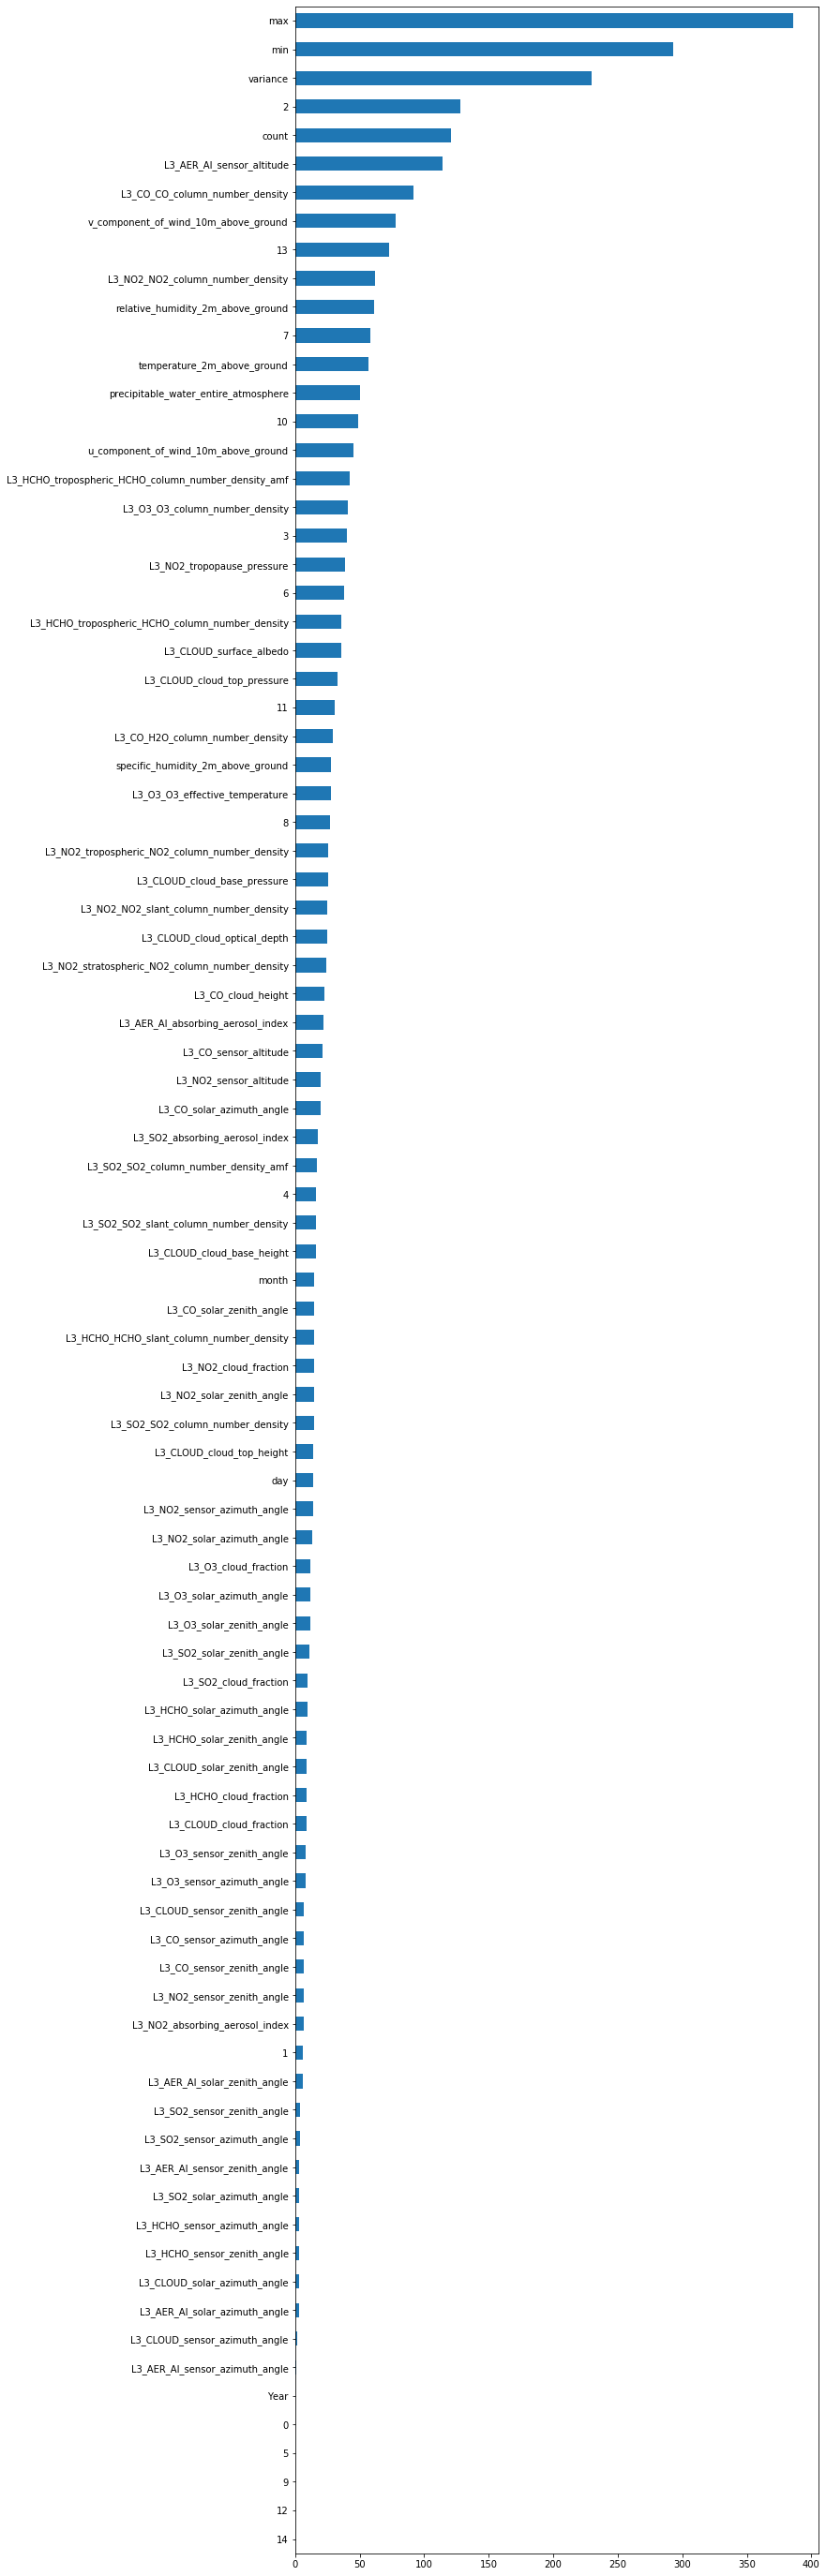

In [35]:
fi = pd.Series(index=features, data= lgb.feature_importances_)
_ = plt.figure(figsize=(10, 50))
_ = fi.sort_values().plot(kind='barh')

## Dropping Columns that doesn't affect the model

In [36]:
fi_df = pd.DataFrame(index=features, data=lgb.feature_importances_)

fi_df = fi_df.reset_index()
fi_df.columns = ['cols','imp']

In [37]:
fi_df.sort_values(by = ['imp'],ascending=False,inplace=True)

In [38]:
fi_df.tail(30)

cols  imp
37     L3_HCHO_solar_azimuth_angle   10
34          L3_HCHO_cloud_fraction    9
38      L3_HCHO_solar_zenith_angle    9
50     L3_CLOUD_solar_zenith_angle    9
43         L3_CLOUD_cloud_fraction    9
22       L3_O3_sensor_zenith_angle    8
21      L3_O3_sensor_azimuth_angle    8
8   L3_NO2_absorbing_aerosol_index    7
12      L3_NO2_sensor_zenith_angle    7
29      L3_CO_sensor_azimuth_angle    7
48    L3_CLOUD_sensor_zenith_angle    7
30       L3_CO_sensor_zenith_angle    7
57    L3_AER_AI_solar_zenith_angle    6
75                               1    6
64      L3_SO2_sensor_zenith_angle    4
63     L3_SO2_sensor_azimuth_angle    4
56   L3_AER_AI_solar_azimuth_angle    3
55   L3_AER_AI_sensor_zenith_angle    3
36     L3_HCHO_sensor_zenith_angle    3
35    L3_HCHO_sensor_azimuth_angle    3
65      L3_SO2_solar_azimuth_angle    3
49    L3_CLOUD_solar_azimuth_angle    3
47   L3_CLOUD_sensor_azimuth_angle    2
54  L3_AER_AI_sensor_azimuth_angle    1
74                               0    0
79                               5    0
67                            Year    0
83                               9    0
86                              12    0
88                              14    0

In [39]:
semi_useless = fi_df[fi_df['imp'] < 13]['cols'].to_list()

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 90 columns):
target                                                 30557 non-null float64
precipitable_water_entire_atmosphere                   30557 non-null float64
relative_humidity_2m_above_ground                      30557 non-null float64
specific_humidity_2m_above_ground                      30557 non-null float64
temperature_2m_above_ground                            30557 non-null float64
u_component_of_wind_10m_above_ground                   30557 non-null float64
v_component_of_wind_10m_above_ground                   30557 non-null float64
L3_NO2_NO2_column_number_density                       30557 non-null float64
L3_NO2_NO2_slant_column_number_density                 30557 non-null float64
L3_NO2_absorbing_aerosol_index                         30557 non-null float64
L3_NO2_cloud_fraction                                  30557 non-null float64
L3_NO2_sensor_altitude           

In [41]:
len(semi_useless)

35

In [42]:
train = train.drop(semi_useless,axis=1)
test = test.drop(semi_useless,axis=1)

In [43]:
X = train.drop(columns='target')
y = train['target']

In [44]:
print(X.shape, test.shape)

train.head()

(30557, 54) (16136, 54)


target  precipitable_water_entire_atmosphere  \
0    38.0                             11.000000   
1    39.0                             14.600000   
2    24.0                             16.400000   
3    49.0                              6.911948   
4    21.0                             13.900001   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                          60.200001                            0.00804   
1                          48.799999                            0.00839   
2                          33.400002                            0.00750   
3                          21.300001                            0.00391   
4                          44.700001                            0.00535   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                    18.516840                              1.996377   
1                    22.546533                              3.330430   
2                    27.031030                              5.065727   
3                    23.971857                              3.004001   
4                    16.816309                              2.621787   

   v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                             -1.227395                          0.000074   
1                             -1.188108                          0.000076   
2                              3.500559                          0.000067   
3                              1.099468                          0.000083   
4                              2.670559                          0.000070   

   L3_NO2_NO2_slant_column_number_density  L3_NO2_cloud_fraction  \
0                                0.000156               0.006507   
1                                0.000197               0.018360   
2                                0.000170               0.015904   
3                                0.000175               0.055765   
4                                0.000142               0.028530   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0           840209.874619                    76.537512   
1           840772.941995                   -14.708036   
2           841410.713456                  -105.201338   
3           841103.242368                  -104.334056   
4           840763.055499                    58.850179   

   L3_NO2_solar_azimuth_angle  L3_NO2_solar_zenith_angle  \
0                  -61.736719                  22.358167   
1                  -67.693509                  28.614804   
2                  -78.342701                  34.296977   
3                  -73.896572                  30.545393   
4                  -68.612480                  26.899694   

   L3_NO2_stratospheric_NO2_column_number_density  L3_NO2_tropopause_pressure  \
0                                        0.000057                 6156.074219   
1                                        0.000055                 6156.074219   
2                                        0.000059                 7311.869141   
3                                        0.000060                11205.388333   
4                                        0.000062                11205.372845   

   L3_NO2_tropospheric_NO2_column_number_density  \
0                                       0.000017   
1                                       0.000021   
2                                       0.000007   
3                                       0.000023   
4                                       0.000009   

   L3_O3_O3_column_number_density  L3_O3_O3_effective_temperature  \
0                        0.119095                      234.151102   
1                        0.115179                      233.313706   
2                        0.115876                      232.233484   
3                        0.141557                      230.936229   
4                        0.126369                      232.499132   

   L3_CO_CO_col

In [45]:
#Use standard scaler
#from sklearn.preprocessing import StandardScaler


#sc = StandardScaler()
#train = sc.fit_transform(train)
#test = sc.fit_transform(test)

## Cross Validation

In [46]:



from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)
                                            
    
    
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)

predictions = lm.predict(X_test)


accuracy1=lm.score(X_train, y_train)


accuracy=lm.score(X_test, y_test)

print(accuracy1,accuracy)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


0.8022124943543961 0.8154437078750618
MAE: 12.947232149942597
MSE: 376.4264625159663
RMSE: 19.40171287582533


In [47]:
lgb = LGBMRegressor(num_leaves=200, min_data_in_leaf=3,
                    objective='regression',
                    max_depth=-1,learning_rate=0.05, 
                    boosting_type='gbdt', 
                    feature_fraction=0.60,
                    lambda_l1=1,lambda_l2=1, 
                    metric='rmse', 
                    num_iterations=4000)

xgb = XGBRegressor(n_estimators = 5000, max_depth = 30, 
                     reg_lambda = 80,random_state = 30,
                     learning_rate=0.3, gamma = 1.5)

***Lightgbm CrossVal***

In [48]:
max_iter = 23
kf = KFold(n_splits=max_iter,shuffle=False,random_state=101)

In [49]:
lgb_scores = []
lgb_test_pred = np.zeros(len(test))
lgb_train_pred = np.zeros(len(train))

for fold,(tr_in,te_in) in enumerate(kf.split(X)):
    
    print(f"==================================Fold{fold}=============================================")
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    
    lgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 500)
    
    lgb_scores.append(rmse(y_test,lgb.predict(X_test)))
    
    lgb_train_pred += lgb.predict(X)
    lgb_test_pred += lgb.predict(test)

==================================Fold0=============================================
[1]	training's rmse: 44.972	valid_1's rmse: 39.7464
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 43.4877	valid_1's rmse: 37.9836
[3]	training's rmse: 41.7591	valid_1's rmse: 36.5804
[4]	training's rmse: 39.9245	valid_1's rmse: 34.979
[5]	training's rmse: 38.2231	valid_1's rmse: 33.5058
[6]	training's rmse: 36.5775	valid_1's rmse: 32.0608
[7]	training's rmse: 35.1903	valid_1's rmse: 30.9893
[8]	training's rmse: 33.82	valid_1's rmse: 29.7708
[9]	training's rmse: 32.7603	valid_1's rmse: 28.6289
[10]	training's rmse: 31.4078	valid_1's rmse: 27.5484
[11]	training's rmse: 30.1267	valid_1's rmse: 26.5261
[12]	training's rmse: 28.9188	valid_1's rmse: 25.5544
[13]	training's rmse: 27.7683	valid_1's rmse: 24.6998
[14]	training's rmse: 26.9236	valid_1's rmse: 23.9296
[15]	training's rmse: 25.8829	valid_1's rmse: 23.2409
[16]	training's rmse: 24.9708	valid_1's rmse: 22.6301
[1

[150]	training's rmse: 6.25984	valid_1's rmse: 18.9666
[151]	training's rmse: 6.24101	valid_1's rmse: 18.9652
[152]	training's rmse: 6.21897	valid_1's rmse: 18.9561
[153]	training's rmse: 6.20104	valid_1's rmse: 18.9438
[154]	training's rmse: 6.1839	valid_1's rmse: 18.9532
[155]	training's rmse: 6.16614	valid_1's rmse: 18.9516
[156]	training's rmse: 6.14837	valid_1's rmse: 18.9536
[157]	training's rmse: 6.13164	valid_1's rmse: 18.9536
[158]	training's rmse: 6.11574	valid_1's rmse: 18.9447
[159]	training's rmse: 6.0962	valid_1's rmse: 18.9474
[160]	training's rmse: 6.08017	valid_1's rmse: 18.9466
[161]	training's rmse: 6.05855	valid_1's rmse: 18.9507
[162]	training's rmse: 6.04005	valid_1's rmse: 18.9554
[163]	training's rmse: 6.02431	valid_1's rmse: 18.9584
[164]	training's rmse: 6.00672	valid_1's rmse: 18.9593
[165]	training's rmse: 5.9869	valid_1's rmse: 18.9508
[166]	training's rmse: 5.96399	valid_1's rmse: 18.947
[167]	training's rmse: 5.94833	valid_1's rmse: 18.9467
[168]	training

[300]	training's rmse: 4.27857	valid_1's rmse: 19.063
[301]	training's rmse: 4.26932	valid_1's rmse: 19.0624
[302]	training's rmse: 4.25895	valid_1's rmse: 19.0629
[303]	training's rmse: 4.25026	valid_1's rmse: 19.0644
[304]	training's rmse: 4.24284	valid_1's rmse: 19.0722
[305]	training's rmse: 4.23472	valid_1's rmse: 19.0695
[306]	training's rmse: 4.22661	valid_1's rmse: 19.0676
[307]	training's rmse: 4.21912	valid_1's rmse: 19.0699
[308]	training's rmse: 4.20912	valid_1's rmse: 19.0665
[309]	training's rmse: 4.19705	valid_1's rmse: 19.0677
[310]	training's rmse: 4.18951	valid_1's rmse: 19.068
[311]	training's rmse: 4.17878	valid_1's rmse: 19.0685
[312]	training's rmse: 4.16767	valid_1's rmse: 19.0778
[313]	training's rmse: 4.15888	valid_1's rmse: 19.0749
[314]	training's rmse: 4.14918	valid_1's rmse: 19.0746
[315]	training's rmse: 4.14207	valid_1's rmse: 19.0744
[316]	training's rmse: 4.13217	valid_1's rmse: 19.0749
[317]	training's rmse: 4.12058	valid_1's rmse: 19.0759
[318]	traini

[451]	training's rmse: 3.08261	valid_1's rmse: 19.0757
[452]	training's rmse: 3.07417	valid_1's rmse: 19.0752
[453]	training's rmse: 3.06877	valid_1's rmse: 19.0759
[454]	training's rmse: 3.06018	valid_1's rmse: 19.0769
[455]	training's rmse: 3.05175	valid_1's rmse: 19.075
[456]	training's rmse: 3.04737	valid_1's rmse: 19.0755
[457]	training's rmse: 3.04001	valid_1's rmse: 19.0743
[458]	training's rmse: 3.03152	valid_1's rmse: 19.0743
[459]	training's rmse: 3.02417	valid_1's rmse: 19.0744
[460]	training's rmse: 3.01694	valid_1's rmse: 19.0748
[461]	training's rmse: 3.01082	valid_1's rmse: 19.0796
[462]	training's rmse: 3.00533	valid_1's rmse: 19.0793
[463]	training's rmse: 2.99816	valid_1's rmse: 19.0831
[464]	training's rmse: 2.9919	valid_1's rmse: 19.0825
[465]	training's rmse: 2.98437	valid_1's rmse: 19.0827
[466]	training's rmse: 2.97982	valid_1's rmse: 19.0832
[467]	training's rmse: 2.97151	valid_1's rmse: 19.0822
[468]	training's rmse: 2.96723	valid_1's rmse: 19.0821
[469]	traini

[56]	training's rmse: 10.2345	valid_1's rmse: 12.1026
[57]	training's rmse: 10.1364	valid_1's rmse: 12.0892
[58]	training's rmse: 10.0342	valid_1's rmse: 12.0794
[59]	training's rmse: 9.92733	valid_1's rmse: 12.0809
[60]	training's rmse: 9.82774	valid_1's rmse: 12.0762
[61]	training's rmse: 9.73869	valid_1's rmse: 12.0629
[62]	training's rmse: 9.64768	valid_1's rmse: 12.0648
[63]	training's rmse: 9.5634	valid_1's rmse: 12.0717
[64]	training's rmse: 9.47856	valid_1's rmse: 12.0639
[65]	training's rmse: 9.39609	valid_1's rmse: 12.0526
[66]	training's rmse: 9.31599	valid_1's rmse: 12.0342
[67]	training's rmse: 9.24482	valid_1's rmse: 12.0176
[68]	training's rmse: 9.17169	valid_1's rmse: 12.0296
[69]	training's rmse: 9.09979	valid_1's rmse: 12.0071
[70]	training's rmse: 9.03851	valid_1's rmse: 11.9972
[71]	training's rmse: 8.98163	valid_1's rmse: 11.9922
[72]	training's rmse: 8.91612	valid_1's rmse: 11.9757
[73]	training's rmse: 8.85727	valid_1's rmse: 11.9993
[74]	training's rmse: 8.79946

[209]	training's rmse: 5.35116	valid_1's rmse: 12.2754
[210]	training's rmse: 5.33687	valid_1's rmse: 12.2755
[211]	training's rmse: 5.31876	valid_1's rmse: 12.2727
[212]	training's rmse: 5.30644	valid_1's rmse: 12.2711
[213]	training's rmse: 5.29119	valid_1's rmse: 12.2731
[214]	training's rmse: 5.27554	valid_1's rmse: 12.2713
[215]	training's rmse: 5.26399	valid_1's rmse: 12.271
[216]	training's rmse: 5.25364	valid_1's rmse: 12.27
[217]	training's rmse: 5.24127	valid_1's rmse: 12.2714
[218]	training's rmse: 5.22798	valid_1's rmse: 12.267
[219]	training's rmse: 5.21704	valid_1's rmse: 12.2636
[220]	training's rmse: 5.20207	valid_1's rmse: 12.2586
[221]	training's rmse: 5.19117	valid_1's rmse: 12.2572
[222]	training's rmse: 5.17664	valid_1's rmse: 12.2567
[223]	training's rmse: 5.16509	valid_1's rmse: 12.2578
[224]	training's rmse: 5.15053	valid_1's rmse: 12.2576
[225]	training's rmse: 5.14106	valid_1's rmse: 12.257
[226]	training's rmse: 5.12542	valid_1's rmse: 12.2567
[227]	training'

[359]	training's rmse: 3.73949	valid_1's rmse: 12.2654
[360]	training's rmse: 3.73302	valid_1's rmse: 12.2644
[361]	training's rmse: 3.72137	valid_1's rmse: 12.265
[362]	training's rmse: 3.71467	valid_1's rmse: 12.2669
[363]	training's rmse: 3.70709	valid_1's rmse: 12.266
[364]	training's rmse: 3.70121	valid_1's rmse: 12.2646
[365]	training's rmse: 3.69358	valid_1's rmse: 12.2643
[366]	training's rmse: 3.68762	valid_1's rmse: 12.2636
[367]	training's rmse: 3.68007	valid_1's rmse: 12.2647
[368]	training's rmse: 3.67296	valid_1's rmse: 12.2643
[369]	training's rmse: 3.66706	valid_1's rmse: 12.2621
[370]	training's rmse: 3.65859	valid_1's rmse: 12.2624
[371]	training's rmse: 3.64783	valid_1's rmse: 12.263
[372]	training's rmse: 3.63767	valid_1's rmse: 12.2633
[373]	training's rmse: 3.63117	valid_1's rmse: 12.2629
[374]	training's rmse: 3.62363	valid_1's rmse: 12.2621
[375]	training's rmse: 3.61647	valid_1's rmse: 12.2597
[376]	training's rmse: 3.60644	valid_1's rmse: 12.2589
[377]	trainin

[510]	training's rmse: 2.72215	valid_1's rmse: 12.2649
[511]	training's rmse: 2.71755	valid_1's rmse: 12.2653
[512]	training's rmse: 2.71141	valid_1's rmse: 12.265
[513]	training's rmse: 2.70756	valid_1's rmse: 12.2661
[514]	training's rmse: 2.70322	valid_1's rmse: 12.2669
[515]	training's rmse: 2.6985	valid_1's rmse: 12.265
[516]	training's rmse: 2.69476	valid_1's rmse: 12.2653
[517]	training's rmse: 2.6872	valid_1's rmse: 12.2634
[518]	training's rmse: 2.67972	valid_1's rmse: 12.2628
[519]	training's rmse: 2.67611	valid_1's rmse: 12.2625
[520]	training's rmse: 2.67268	valid_1's rmse: 12.2633
[521]	training's rmse: 2.66798	valid_1's rmse: 12.2636
[522]	training's rmse: 2.66323	valid_1's rmse: 12.2654
[523]	training's rmse: 2.65914	valid_1's rmse: 12.265
[524]	training's rmse: 2.65428	valid_1's rmse: 12.2652
[525]	training's rmse: 2.6474	valid_1's rmse: 12.2655
[526]	training's rmse: 2.64309	valid_1's rmse: 12.2648
[527]	training's rmse: 2.63752	valid_1's rmse: 12.2641
[528]	training's

[87]	training's rmse: 7.99845	valid_1's rmse: 16.9963
[88]	training's rmse: 7.95967	valid_1's rmse: 16.9844
[89]	training's rmse: 7.91916	valid_1's rmse: 16.9798
[90]	training's rmse: 7.87629	valid_1's rmse: 16.9611
[91]	training's rmse: 7.83392	valid_1's rmse: 16.9558
[92]	training's rmse: 7.79348	valid_1's rmse: 16.9453
[93]	training's rmse: 7.75336	valid_1's rmse: 16.93
[94]	training's rmse: 7.71631	valid_1's rmse: 16.9162
[95]	training's rmse: 7.67722	valid_1's rmse: 16.9204
[96]	training's rmse: 7.64028	valid_1's rmse: 16.9195
[97]	training's rmse: 7.60317	valid_1's rmse: 16.9092
[98]	training's rmse: 7.56805	valid_1's rmse: 16.8998
[99]	training's rmse: 7.53663	valid_1's rmse: 16.9038
[100]	training's rmse: 7.50162	valid_1's rmse: 16.8899
[101]	training's rmse: 7.46655	valid_1's rmse: 16.8784
[102]	training's rmse: 7.42985	valid_1's rmse: 16.8718
[103]	training's rmse: 7.3964	valid_1's rmse: 16.8627
[104]	training's rmse: 7.3639	valid_1's rmse: 16.862
[105]	training's rmse: 7.331

[238]	training's rmse: 4.91513	valid_1's rmse: 16.6525
[239]	training's rmse: 4.90534	valid_1's rmse: 16.6545
[240]	training's rmse: 4.89198	valid_1's rmse: 16.6509
[241]	training's rmse: 4.87755	valid_1's rmse: 16.6518
[242]	training's rmse: 4.8659	valid_1's rmse: 16.6511
[243]	training's rmse: 4.85276	valid_1's rmse: 16.6537
[244]	training's rmse: 4.84254	valid_1's rmse: 16.6507
[245]	training's rmse: 4.83356	valid_1's rmse: 16.6509
[246]	training's rmse: 4.81895	valid_1's rmse: 16.6523
[247]	training's rmse: 4.80547	valid_1's rmse: 16.651
[248]	training's rmse: 4.7939	valid_1's rmse: 16.6541
[249]	training's rmse: 4.78155	valid_1's rmse: 16.6533
[250]	training's rmse: 4.77084	valid_1's rmse: 16.6555
[251]	training's rmse: 4.75571	valid_1's rmse: 16.6551
[252]	training's rmse: 4.74542	valid_1's rmse: 16.6537
[253]	training's rmse: 4.7335	valid_1's rmse: 16.6532
[254]	training's rmse: 4.72093	valid_1's rmse: 16.6507
[255]	training's rmse: 4.70614	valid_1's rmse: 16.6499
[256]	training

[388]	training's rmse: 3.44185	valid_1's rmse: 16.6492
[389]	training's rmse: 3.43538	valid_1's rmse: 16.6498
[390]	training's rmse: 3.42588	valid_1's rmse: 16.6498
[391]	training's rmse: 3.41612	valid_1's rmse: 16.6497
[392]	training's rmse: 3.40591	valid_1's rmse: 16.647
[393]	training's rmse: 3.3996	valid_1's rmse: 16.6486
[394]	training's rmse: 3.39236	valid_1's rmse: 16.6469
[395]	training's rmse: 3.38587	valid_1's rmse: 16.647
[396]	training's rmse: 3.38091	valid_1's rmse: 16.6466
[397]	training's rmse: 3.37354	valid_1's rmse: 16.6465
[398]	training's rmse: 3.36482	valid_1's rmse: 16.6462
[399]	training's rmse: 3.35641	valid_1's rmse: 16.6447
[400]	training's rmse: 3.35093	valid_1's rmse: 16.6447
[401]	training's rmse: 3.34361	valid_1's rmse: 16.643
[402]	training's rmse: 3.33538	valid_1's rmse: 16.6439
[403]	training's rmse: 3.32691	valid_1's rmse: 16.6433
[404]	training's rmse: 3.31839	valid_1's rmse: 16.6433
[405]	training's rmse: 3.31237	valid_1's rmse: 16.6426
[406]	training

[539]	training's rmse: 2.49387	valid_1's rmse: 16.6365
[540]	training's rmse: 2.48933	valid_1's rmse: 16.6367
[541]	training's rmse: 2.48326	valid_1's rmse: 16.6371
[542]	training's rmse: 2.47949	valid_1's rmse: 16.6374
[543]	training's rmse: 2.47513	valid_1's rmse: 16.6369
[544]	training's rmse: 2.47076	valid_1's rmse: 16.6367
[545]	training's rmse: 2.46705	valid_1's rmse: 16.6363
[546]	training's rmse: 2.46047	valid_1's rmse: 16.6379
[547]	training's rmse: 2.45679	valid_1's rmse: 16.6391
[548]	training's rmse: 2.45137	valid_1's rmse: 16.6394
[549]	training's rmse: 2.44516	valid_1's rmse: 16.6395
[550]	training's rmse: 2.44061	valid_1's rmse: 16.6404
[551]	training's rmse: 2.43496	valid_1's rmse: 16.6401
[552]	training's rmse: 2.43123	valid_1's rmse: 16.6391
[553]	training's rmse: 2.42541	valid_1's rmse: 16.6386
[554]	training's rmse: 2.41988	valid_1's rmse: 16.6378
[555]	training's rmse: 2.41507	valid_1's rmse: 16.6364
[556]	training's rmse: 2.40911	valid_1's rmse: 16.6361
[557]	trai

[689]	training's rmse: 1.83393	valid_1's rmse: 16.6455
[690]	training's rmse: 1.83115	valid_1's rmse: 16.6462
[691]	training's rmse: 1.82782	valid_1's rmse: 16.6459
[692]	training's rmse: 1.82492	valid_1's rmse: 16.6461
[693]	training's rmse: 1.82131	valid_1's rmse: 16.646
[694]	training's rmse: 1.81718	valid_1's rmse: 16.6445
[695]	training's rmse: 1.81307	valid_1's rmse: 16.6443
[696]	training's rmse: 1.81032	valid_1's rmse: 16.6449
[697]	training's rmse: 1.80615	valid_1's rmse: 16.6451
[698]	training's rmse: 1.8028	valid_1's rmse: 16.6452
[699]	training's rmse: 1.80048	valid_1's rmse: 16.6458
[700]	training's rmse: 1.79583	valid_1's rmse: 16.6459
[701]	training's rmse: 1.79226	valid_1's rmse: 16.6469
[702]	training's rmse: 1.7889	valid_1's rmse: 16.6469
[703]	training's rmse: 1.78531	valid_1's rmse: 16.6464
[704]	training's rmse: 1.78188	valid_1's rmse: 16.6455
[705]	training's rmse: 1.77796	valid_1's rmse: 16.6441
[706]	training's rmse: 1.77441	valid_1's rmse: 16.6444
[707]	trainin

[840]	training's rmse: 1.37485	valid_1's rmse: 16.6461
[841]	training's rmse: 1.37216	valid_1's rmse: 16.6461
[842]	training's rmse: 1.36981	valid_1's rmse: 16.6458
[843]	training's rmse: 1.36696	valid_1's rmse: 16.6456
[844]	training's rmse: 1.36388	valid_1's rmse: 16.646
[845]	training's rmse: 1.36111	valid_1's rmse: 16.6458
[846]	training's rmse: 1.35881	valid_1's rmse: 16.646
[847]	training's rmse: 1.35663	valid_1's rmse: 16.6463
[848]	training's rmse: 1.35327	valid_1's rmse: 16.6463
[849]	training's rmse: 1.34967	valid_1's rmse: 16.6468
[850]	training's rmse: 1.34695	valid_1's rmse: 16.6464
[851]	training's rmse: 1.34299	valid_1's rmse: 16.646
[852]	training's rmse: 1.34076	valid_1's rmse: 16.646
[853]	training's rmse: 1.33918	valid_1's rmse: 16.6459
[854]	training's rmse: 1.33658	valid_1's rmse: 16.646
[855]	training's rmse: 1.33392	valid_1's rmse: 16.6461
[856]	training's rmse: 1.33161	valid_1's rmse: 16.6452
[857]	training's rmse: 1.32905	valid_1's rmse: 16.6452
[858]	training'

[991]	training's rmse: 1.03663	valid_1's rmse: 16.6389
[992]	training's rmse: 1.03434	valid_1's rmse: 16.639
[993]	training's rmse: 1.03334	valid_1's rmse: 16.6392
[994]	training's rmse: 1.03139	valid_1's rmse: 16.6391
[995]	training's rmse: 1.02975	valid_1's rmse: 16.6391
[996]	training's rmse: 1.02779	valid_1's rmse: 16.6389
[997]	training's rmse: 1.02566	valid_1's rmse: 16.639
[998]	training's rmse: 1.02332	valid_1's rmse: 16.639
[999]	training's rmse: 1.02162	valid_1's rmse: 16.6391
[1000]	training's rmse: 1.01921	valid_1's rmse: 16.6392
[1001]	training's rmse: 1.01714	valid_1's rmse: 16.6393
[1002]	training's rmse: 1.01618	valid_1's rmse: 16.6392
[1003]	training's rmse: 1.01362	valid_1's rmse: 16.6393
[1004]	training's rmse: 1.01224	valid_1's rmse: 16.6394
[1005]	training's rmse: 1.01083	valid_1's rmse: 16.6394
[1006]	training's rmse: 1.0086	valid_1's rmse: 16.6391
[1007]	training's rmse: 1.00745	valid_1's rmse: 16.6393
[1008]	training's rmse: 1.00533	valid_1's rmse: 16.6393
[1009

[262]	training's rmse: 4.63059	valid_1's rmse: 40.8632
[263]	training's rmse: 4.62079	valid_1's rmse: 40.8661
[264]	training's rmse: 4.60652	valid_1's rmse: 40.8657
[265]	training's rmse: 4.59859	valid_1's rmse: 40.8679
[266]	training's rmse: 4.58836	valid_1's rmse: 40.8678
[267]	training's rmse: 4.57555	valid_1's rmse: 40.8665
[268]	training's rmse: 4.56319	valid_1's rmse: 40.8662
[269]	training's rmse: 4.55512	valid_1's rmse: 40.8669
[270]	training's rmse: 4.54454	valid_1's rmse: 40.8695
[271]	training's rmse: 4.53329	valid_1's rmse: 40.8685
[272]	training's rmse: 4.51893	valid_1's rmse: 40.8677
[273]	training's rmse: 4.5087	valid_1's rmse: 40.868
[274]	training's rmse: 4.50007	valid_1's rmse: 40.8674
[275]	training's rmse: 4.49282	valid_1's rmse: 40.8678
[276]	training's rmse: 4.48351	valid_1's rmse: 40.8682
[277]	training's rmse: 4.46969	valid_1's rmse: 40.8679
[278]	training's rmse: 4.4578	valid_1's rmse: 40.8675
[279]	training's rmse: 4.44904	valid_1's rmse: 40.8676
[280]	trainin

[412]	training's rmse: 3.31527	valid_1's rmse: 40.8648
[413]	training's rmse: 3.31031	valid_1's rmse: 40.8646
[414]	training's rmse: 3.302	valid_1's rmse: 40.8658
[415]	training's rmse: 3.29663	valid_1's rmse: 40.8658
[416]	training's rmse: 3.2919	valid_1's rmse: 40.8671
[417]	training's rmse: 3.28385	valid_1's rmse: 40.8681
[418]	training's rmse: 3.27824	valid_1's rmse: 40.8666
[419]	training's rmse: 3.26962	valid_1's rmse: 40.8663
[420]	training's rmse: 3.26047	valid_1's rmse: 40.8666
[421]	training's rmse: 3.25113	valid_1's rmse: 40.867
[422]	training's rmse: 3.24586	valid_1's rmse: 40.8671
[423]	training's rmse: 3.23746	valid_1's rmse: 40.8685
[424]	training's rmse: 3.23157	valid_1's rmse: 40.8686
[425]	training's rmse: 3.22709	valid_1's rmse: 40.8698
[426]	training's rmse: 3.22211	valid_1's rmse: 40.8696
[427]	training's rmse: 3.2172	valid_1's rmse: 40.8696
[428]	training's rmse: 3.20988	valid_1's rmse: 40.8697
[429]	training's rmse: 3.20266	valid_1's rmse: 40.8699
[430]	training'

[564]	training's rmse: 2.44099	valid_1's rmse: 40.8759
[565]	training's rmse: 2.43323	valid_1's rmse: 40.8758
[566]	training's rmse: 2.42574	valid_1's rmse: 40.8758
[567]	training's rmse: 2.42164	valid_1's rmse: 40.8753
[568]	training's rmse: 2.41544	valid_1's rmse: 40.8757
[569]	training's rmse: 2.41125	valid_1's rmse: 40.8753
[570]	training's rmse: 2.40562	valid_1's rmse: 40.8754
[571]	training's rmse: 2.40131	valid_1's rmse: 40.8764
[572]	training's rmse: 2.39748	valid_1's rmse: 40.8765
[573]	training's rmse: 2.39287	valid_1's rmse: 40.8765
[574]	training's rmse: 2.38924	valid_1's rmse: 40.8763
[575]	training's rmse: 2.38569	valid_1's rmse: 40.8765
[576]	training's rmse: 2.37947	valid_1's rmse: 40.8767
[577]	training's rmse: 2.37372	valid_1's rmse: 40.877
[578]	training's rmse: 2.36793	valid_1's rmse: 40.8769
[579]	training's rmse: 2.36265	valid_1's rmse: 40.877
[580]	training's rmse: 2.35716	valid_1's rmse: 40.877
[581]	training's rmse: 2.35325	valid_1's rmse: 40.8773
[582]	trainin

[115]	training's rmse: 7.11116	valid_1's rmse: 13.9924
[116]	training's rmse: 7.08653	valid_1's rmse: 13.9934
[117]	training's rmse: 7.05654	valid_1's rmse: 13.9919
[118]	training's rmse: 7.02818	valid_1's rmse: 13.9927
[119]	training's rmse: 6.99928	valid_1's rmse: 13.9906
[120]	training's rmse: 6.97194	valid_1's rmse: 13.9943
[121]	training's rmse: 6.94645	valid_1's rmse: 13.9936
[122]	training's rmse: 6.91955	valid_1's rmse: 13.9921
[123]	training's rmse: 6.89352	valid_1's rmse: 13.9914
[124]	training's rmse: 6.87236	valid_1's rmse: 13.9942
[125]	training's rmse: 6.84543	valid_1's rmse: 13.994
[126]	training's rmse: 6.82231	valid_1's rmse: 13.9919
[127]	training's rmse: 6.79693	valid_1's rmse: 13.9893
[128]	training's rmse: 6.77326	valid_1's rmse: 13.9925
[129]	training's rmse: 6.75246	valid_1's rmse: 14.0007
[130]	training's rmse: 6.72923	valid_1's rmse: 14.0042
[131]	training's rmse: 6.7038	valid_1's rmse: 14.0088
[132]	training's rmse: 6.67956	valid_1's rmse: 14.002
[133]	trainin

[268]	training's rmse: 4.62602	valid_1's rmse: 14.0327
[269]	training's rmse: 4.61194	valid_1's rmse: 14.0336
[270]	training's rmse: 4.59775	valid_1's rmse: 14.0334
[271]	training's rmse: 4.58239	valid_1's rmse: 14.0337
[272]	training's rmse: 4.57014	valid_1's rmse: 14.0388
[273]	training's rmse: 4.56064	valid_1's rmse: 14.0369
[274]	training's rmse: 4.55166	valid_1's rmse: 14.0366
[275]	training's rmse: 4.53965	valid_1's rmse: 14.0349
[276]	training's rmse: 4.52947	valid_1's rmse: 14.0352
[277]	training's rmse: 4.52155	valid_1's rmse: 14.0321
[278]	training's rmse: 4.51236	valid_1's rmse: 14.0312
[279]	training's rmse: 4.49854	valid_1's rmse: 14.0326
[280]	training's rmse: 4.48926	valid_1's rmse: 14.0306
[281]	training's rmse: 4.48028	valid_1's rmse: 14.0313
[282]	training's rmse: 4.4727	valid_1's rmse: 14.0299
[283]	training's rmse: 4.45999	valid_1's rmse: 14.0289
[284]	training's rmse: 4.4475	valid_1's rmse: 14.0318
[285]	training's rmse: 4.43556	valid_1's rmse: 14.0346
[286]	traini

[421]	training's rmse: 3.26446	valid_1's rmse: 14.055
[422]	training's rmse: 3.25928	valid_1's rmse: 14.0553
[423]	training's rmse: 3.2522	valid_1's rmse: 14.0559
[424]	training's rmse: 3.24276	valid_1's rmse: 14.0527
[425]	training's rmse: 3.23726	valid_1's rmse: 14.0528
[426]	training's rmse: 3.23164	valid_1's rmse: 14.0522
[427]	training's rmse: 3.22444	valid_1's rmse: 14.051
[428]	training's rmse: 3.21777	valid_1's rmse: 14.0514
[429]	training's rmse: 3.21083	valid_1's rmse: 14.0495
[430]	training's rmse: 3.20359	valid_1's rmse: 14.0499
[431]	training's rmse: 3.19797	valid_1's rmse: 14.0491
[432]	training's rmse: 3.19057	valid_1's rmse: 14.0483
[433]	training's rmse: 3.18576	valid_1's rmse: 14.0514
[434]	training's rmse: 3.17933	valid_1's rmse: 14.0529
[435]	training's rmse: 3.17238	valid_1's rmse: 14.0541
[436]	training's rmse: 3.16552	valid_1's rmse: 14.0533
[437]	training's rmse: 3.15699	valid_1's rmse: 14.0525
[438]	training's rmse: 3.1479	valid_1's rmse: 14.0522
[439]	training

[574]	training's rmse: 2.36328	valid_1's rmse: 14.054
[575]	training's rmse: 2.35948	valid_1's rmse: 14.0546
[576]	training's rmse: 2.35508	valid_1's rmse: 14.054
Early stopping, best iteration is:
[76]	training's rmse: 8.61762	valid_1's rmse: 13.8419
==================================Fold5=============================================
[1]	training's rmse: 44.9656	valid_1's rmse: 40.2221
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 43.4783	valid_1's rmse: 38.5272
[3]	training's rmse: 41.717	valid_1's rmse: 37.2611
[4]	training's rmse: 39.8879	valid_1's rmse: 35.7543
[5]	training's rmse: 38.1941	valid_1's rmse: 34.3036
[6]	training's rmse: 36.5522	valid_1's rmse: 32.96
[7]	training's rmse: 35.1711	valid_1's rmse: 32.0921
[8]	training's rmse: 33.8007	valid_1's rmse: 31.0018
[9]	training's rmse: 32.7591	valid_1's rmse: 29.9193
[10]	training's rmse: 31.4153	valid_1's rmse: 28.8016
[11]	training's rmse: 30.1317	valid_1's rmse: 27.7771
[12]	training's rms

[147]	training's rmse: 6.34237	valid_1's rmse: 14.3593
[148]	training's rmse: 6.32138	valid_1's rmse: 14.3581
[149]	training's rmse: 6.30626	valid_1's rmse: 14.355
[150]	training's rmse: 6.28578	valid_1's rmse: 14.3516
[151]	training's rmse: 6.26546	valid_1's rmse: 14.3565
[152]	training's rmse: 6.24717	valid_1's rmse: 14.3587
[153]	training's rmse: 6.22956	valid_1's rmse: 14.3572
[154]	training's rmse: 6.21018	valid_1's rmse: 14.3529
[155]	training's rmse: 6.19213	valid_1's rmse: 14.3561
[156]	training's rmse: 6.17685	valid_1's rmse: 14.3654
[157]	training's rmse: 6.15777	valid_1's rmse: 14.3648
[158]	training's rmse: 6.13968	valid_1's rmse: 14.3616
[159]	training's rmse: 6.1226	valid_1's rmse: 14.3647
[160]	training's rmse: 6.10265	valid_1's rmse: 14.3594
[161]	training's rmse: 6.08828	valid_1's rmse: 14.3598
[162]	training's rmse: 6.06843	valid_1's rmse: 14.3604
[163]	training's rmse: 6.05058	valid_1's rmse: 14.3605
[164]	training's rmse: 6.03369	valid_1's rmse: 14.3583
[165]	traini

[297]	training's rmse: 4.32426	valid_1's rmse: 14.3272
[298]	training's rmse: 4.31077	valid_1's rmse: 14.3303
[299]	training's rmse: 4.30383	valid_1's rmse: 14.3301
[300]	training's rmse: 4.29145	valid_1's rmse: 14.3282
[301]	training's rmse: 4.28276	valid_1's rmse: 14.3304
[302]	training's rmse: 4.27459	valid_1's rmse: 14.331
[303]	training's rmse: 4.26316	valid_1's rmse: 14.3308
[304]	training's rmse: 4.25363	valid_1's rmse: 14.3321
[305]	training's rmse: 4.24674	valid_1's rmse: 14.3307
[306]	training's rmse: 4.23548	valid_1's rmse: 14.3309
[307]	training's rmse: 4.22655	valid_1's rmse: 14.3319
[308]	training's rmse: 4.21657	valid_1's rmse: 14.3322
[309]	training's rmse: 4.20961	valid_1's rmse: 14.3321
[310]	training's rmse: 4.19966	valid_1's rmse: 14.3338
[311]	training's rmse: 4.18753	valid_1's rmse: 14.3331
[312]	training's rmse: 4.17929	valid_1's rmse: 14.3336
[313]	training's rmse: 4.16871	valid_1's rmse: 14.3304
[314]	training's rmse: 4.15982	valid_1's rmse: 14.3284
[315]	train

[448]	training's rmse: 3.10682	valid_1's rmse: 14.3215
[449]	training's rmse: 3.10194	valid_1's rmse: 14.3225
[450]	training's rmse: 3.09574	valid_1's rmse: 14.3256
[451]	training's rmse: 3.08996	valid_1's rmse: 14.3256
[452]	training's rmse: 3.08284	valid_1's rmse: 14.3259
[453]	training's rmse: 3.07596	valid_1's rmse: 14.326
[454]	training's rmse: 3.06877	valid_1's rmse: 14.3272
[455]	training's rmse: 3.06134	valid_1's rmse: 14.3266
[456]	training's rmse: 3.05465	valid_1's rmse: 14.3277
[457]	training's rmse: 3.0485	valid_1's rmse: 14.3294
[458]	training's rmse: 3.04234	valid_1's rmse: 14.3284
[459]	training's rmse: 3.03384	valid_1's rmse: 14.3281
[460]	training's rmse: 3.02782	valid_1's rmse: 14.3286
[461]	training's rmse: 3.02076	valid_1's rmse: 14.3287
[462]	training's rmse: 3.01586	valid_1's rmse: 14.3277
[463]	training's rmse: 3.00733	valid_1's rmse: 14.3295
[464]	training's rmse: 2.99916	valid_1's rmse: 14.3288
[465]	training's rmse: 2.99254	valid_1's rmse: 14.3299
[466]	traini

[598]	training's rmse: 2.29661	valid_1's rmse: 14.312
[599]	training's rmse: 2.29256	valid_1's rmse: 14.3126
[600]	training's rmse: 2.28765	valid_1's rmse: 14.3124
[601]	training's rmse: 2.28492	valid_1's rmse: 14.311
[602]	training's rmse: 2.28028	valid_1's rmse: 14.3112
[603]	training's rmse: 2.27409	valid_1's rmse: 14.3113
[604]	training's rmse: 2.26997	valid_1's rmse: 14.3114
[605]	training's rmse: 2.26561	valid_1's rmse: 14.3102
[606]	training's rmse: 2.26052	valid_1's rmse: 14.3095
[607]	training's rmse: 2.25774	valid_1's rmse: 14.3102
[608]	training's rmse: 2.2535	valid_1's rmse: 14.3106
[609]	training's rmse: 2.24929	valid_1's rmse: 14.3089
[610]	training's rmse: 2.24609	valid_1's rmse: 14.309
[611]	training's rmse: 2.24219	valid_1's rmse: 14.3087
[612]	training's rmse: 2.23753	valid_1's rmse: 14.3084
[613]	training's rmse: 2.23298	valid_1's rmse: 14.3084
[614]	training's rmse: 2.2276	valid_1's rmse: 14.3052
[615]	training's rmse: 2.22305	valid_1's rmse: 14.3047
[616]	training'

[750]	training's rmse: 1.69079	valid_1's rmse: 14.2947
[751]	training's rmse: 1.68604	valid_1's rmse: 14.2949
[752]	training's rmse: 1.68369	valid_1's rmse: 14.2947
[753]	training's rmse: 1.68005	valid_1's rmse: 14.2945
[754]	training's rmse: 1.67621	valid_1's rmse: 14.2937
[755]	training's rmse: 1.67291	valid_1's rmse: 14.2939
[756]	training's rmse: 1.66861	valid_1's rmse: 14.2941
[757]	training's rmse: 1.66453	valid_1's rmse: 14.2938
[758]	training's rmse: 1.66162	valid_1's rmse: 14.2942
[759]	training's rmse: 1.65961	valid_1's rmse: 14.2944
[760]	training's rmse: 1.65759	valid_1's rmse: 14.2939
[761]	training's rmse: 1.65341	valid_1's rmse: 14.2938
[762]	training's rmse: 1.6507	valid_1's rmse: 14.2942
[763]	training's rmse: 1.64837	valid_1's rmse: 14.2946
[764]	training's rmse: 1.64645	valid_1's rmse: 14.295
[765]	training's rmse: 1.64293	valid_1's rmse: 14.2944
[766]	training's rmse: 1.63951	valid_1's rmse: 14.2936
[767]	training's rmse: 1.63651	valid_1's rmse: 14.2935
[768]	traini

[1048]	training's rmse: 0.963212	valid_1's rmse: 14.2993
[1049]	training's rmse: 0.961138	valid_1's rmse: 14.2996
[1050]	training's rmse: 0.960176	valid_1's rmse: 14.2994
[1051]	training's rmse: 0.958208	valid_1's rmse: 14.2993
[1052]	training's rmse: 0.956141	valid_1's rmse: 14.2995
[1053]	training's rmse: 0.954345	valid_1's rmse: 14.2997
[1054]	training's rmse: 0.952508	valid_1's rmse: 14.3
[1055]	training's rmse: 0.950562	valid_1's rmse: 14.2997
[1056]	training's rmse: 0.949081	valid_1's rmse: 14.3
[1057]	training's rmse: 0.948128	valid_1's rmse: 14.3001
[1058]	training's rmse: 0.946291	valid_1's rmse: 14.2993
[1059]	training's rmse: 0.94522	valid_1's rmse: 14.2992
[1060]	training's rmse: 0.944374	valid_1's rmse: 14.2995
[1061]	training's rmse: 0.942628	valid_1's rmse: 14.2996
[1062]	training's rmse: 0.94127	valid_1's rmse: 14.2996
[1063]	training's rmse: 0.939365	valid_1's rmse: 14.2996
[1064]	training's rmse: 0.938177	valid_1's rmse: 14.2999
[1065]	training's rmse: 0.936975	valid_

[1194]	training's rmse: 0.736094	valid_1's rmse: 14.2972
[1195]	training's rmse: 0.735036	valid_1's rmse: 14.2974
[1196]	training's rmse: 0.734011	valid_1's rmse: 14.2976
[1197]	training's rmse: 0.732641	valid_1's rmse: 14.2976
[1198]	training's rmse: 0.731386	valid_1's rmse: 14.2976
[1199]	training's rmse: 0.730005	valid_1's rmse: 14.2976
[1200]	training's rmse: 0.728729	valid_1's rmse: 14.2975
[1201]	training's rmse: 0.727478	valid_1's rmse: 14.2976
[1202]	training's rmse: 0.726462	valid_1's rmse: 14.2976
[1203]	training's rmse: 0.724912	valid_1's rmse: 14.2973
[1204]	training's rmse: 0.723551	valid_1's rmse: 14.2972
[1205]	training's rmse: 0.722721	valid_1's rmse: 14.2971
[1206]	training's rmse: 0.721239	valid_1's rmse: 14.2969
[1207]	training's rmse: 0.719834	valid_1's rmse: 14.2968
[1208]	training's rmse: 0.718671	valid_1's rmse: 14.2969
[1209]	training's rmse: 0.717492	valid_1's rmse: 14.2969
[1210]	training's rmse: 0.716149	valid_1's rmse: 14.297
[1211]	training's rmse: 0.715341

[63]	training's rmse: 9.54952	valid_1's rmse: 17.7526
[64]	training's rmse: 9.46463	valid_1's rmse: 17.6586
[65]	training's rmse: 9.38556	valid_1's rmse: 17.6079
[66]	training's rmse: 9.30791	valid_1's rmse: 17.5678
[67]	training's rmse: 9.24097	valid_1's rmse: 17.5223
[68]	training's rmse: 9.16866	valid_1's rmse: 17.4743
[69]	training's rmse: 9.0991	valid_1's rmse: 17.4469
[70]	training's rmse: 9.03474	valid_1's rmse: 17.4443
[71]	training's rmse: 8.97825	valid_1's rmse: 17.4178
[72]	training's rmse: 8.91416	valid_1's rmse: 17.4143
[73]	training's rmse: 8.85313	valid_1's rmse: 17.3824
[74]	training's rmse: 8.79693	valid_1's rmse: 17.3722
[75]	training's rmse: 8.73963	valid_1's rmse: 17.3628
[76]	training's rmse: 8.68598	valid_1's rmse: 17.3557
[77]	training's rmse: 8.63085	valid_1's rmse: 17.3464
[78]	training's rmse: 8.57646	valid_1's rmse: 17.354
[79]	training's rmse: 8.52559	valid_1's rmse: 17.315
[80]	training's rmse: 8.47634	valid_1's rmse: 17.2999
[81]	training's rmse: 8.42521	v

[214]	training's rmse: 5.27405	valid_1's rmse: 16.9009
[215]	training's rmse: 5.26009	valid_1's rmse: 16.9002
[216]	training's rmse: 5.24356	valid_1's rmse: 16.8917
[217]	training's rmse: 5.23157	valid_1's rmse: 16.8937
[218]	training's rmse: 5.21552	valid_1's rmse: 16.8926
[219]	training's rmse: 5.20393	valid_1's rmse: 16.8909
[220]	training's rmse: 5.18815	valid_1's rmse: 16.894
[221]	training's rmse: 5.17776	valid_1's rmse: 16.8878
[222]	training's rmse: 5.16341	valid_1's rmse: 16.8884
[223]	training's rmse: 5.14916	valid_1's rmse: 16.886
[224]	training's rmse: 5.13555	valid_1's rmse: 16.887
[225]	training's rmse: 5.1262	valid_1's rmse: 16.8859
[226]	training's rmse: 5.11542	valid_1's rmse: 16.8863
[227]	training's rmse: 5.10495	valid_1's rmse: 16.8851
[228]	training's rmse: 5.09568	valid_1's rmse: 16.8869
[229]	training's rmse: 5.08285	valid_1's rmse: 16.8839
[230]	training's rmse: 5.0666	valid_1's rmse: 16.886
[231]	training's rmse: 5.05568	valid_1's rmse: 16.8838
[232]	training's

[364]	training's rmse: 3.67093	valid_1's rmse: 16.8426
[365]	training's rmse: 3.66409	valid_1's rmse: 16.8437
[366]	training's rmse: 3.65425	valid_1's rmse: 16.8396
[367]	training's rmse: 3.64773	valid_1's rmse: 16.8379
[368]	training's rmse: 3.63768	valid_1's rmse: 16.8367
[369]	training's rmse: 3.62757	valid_1's rmse: 16.8362
[370]	training's rmse: 3.61762	valid_1's rmse: 16.8359
[371]	training's rmse: 3.61185	valid_1's rmse: 16.836
[372]	training's rmse: 3.60208	valid_1's rmse: 16.8348
[373]	training's rmse: 3.59278	valid_1's rmse: 16.8358
[374]	training's rmse: 3.58306	valid_1's rmse: 16.8353
[375]	training's rmse: 3.57349	valid_1's rmse: 16.8333
[376]	training's rmse: 3.5668	valid_1's rmse: 16.8324
[377]	training's rmse: 3.56083	valid_1's rmse: 16.8323
[378]	training's rmse: 3.55084	valid_1's rmse: 16.8318
[379]	training's rmse: 3.54197	valid_1's rmse: 16.8308
[380]	training's rmse: 3.53362	valid_1's rmse: 16.8308
[381]	training's rmse: 3.52321	valid_1's rmse: 16.8298
[382]	traini

[515]	training's rmse: 2.65956	valid_1's rmse: 16.7878
[516]	training's rmse: 2.65405	valid_1's rmse: 16.7879
[517]	training's rmse: 2.65017	valid_1's rmse: 16.7879
[518]	training's rmse: 2.64684	valid_1's rmse: 16.7892
[519]	training's rmse: 2.64297	valid_1's rmse: 16.7905
[520]	training's rmse: 2.63948	valid_1's rmse: 16.7905
[521]	training's rmse: 2.63413	valid_1's rmse: 16.7904
[522]	training's rmse: 2.63053	valid_1's rmse: 16.7905
[523]	training's rmse: 2.6253	valid_1's rmse: 16.7909
[524]	training's rmse: 2.62116	valid_1's rmse: 16.7897
[525]	training's rmse: 2.61593	valid_1's rmse: 16.7902
[526]	training's rmse: 2.60917	valid_1's rmse: 16.7895
[527]	training's rmse: 2.60294	valid_1's rmse: 16.7891
[528]	training's rmse: 2.59825	valid_1's rmse: 16.7887
[529]	training's rmse: 2.5916	valid_1's rmse: 16.788
[530]	training's rmse: 2.58789	valid_1's rmse: 16.7881
[531]	training's rmse: 2.58183	valid_1's rmse: 16.7889
[532]	training's rmse: 2.57577	valid_1's rmse: 16.7875
[533]	trainin

[666]	training's rmse: 1.96867	valid_1's rmse: 16.7797
[667]	training's rmse: 1.96583	valid_1's rmse: 16.7797
[668]	training's rmse: 1.96185	valid_1's rmse: 16.7797
[669]	training's rmse: 1.95794	valid_1's rmse: 16.7795
[670]	training's rmse: 1.95372	valid_1's rmse: 16.7798
[671]	training's rmse: 1.94965	valid_1's rmse: 16.7797
[672]	training's rmse: 1.94452	valid_1's rmse: 16.7797
[673]	training's rmse: 1.94233	valid_1's rmse: 16.7794
[674]	training's rmse: 1.93953	valid_1's rmse: 16.7795
[675]	training's rmse: 1.93702	valid_1's rmse: 16.7796
[676]	training's rmse: 1.93258	valid_1's rmse: 16.7791
[677]	training's rmse: 1.92904	valid_1's rmse: 16.7795
[678]	training's rmse: 1.9249	valid_1's rmse: 16.7796
[679]	training's rmse: 1.92201	valid_1's rmse: 16.7792
[680]	training's rmse: 1.91792	valid_1's rmse: 16.7796
[681]	training's rmse: 1.91519	valid_1's rmse: 16.7792
[682]	training's rmse: 1.91283	valid_1's rmse: 16.7792
[683]	training's rmse: 1.90845	valid_1's rmse: 16.7794
[684]	train

[819]	training's rmse: 1.47828	valid_1's rmse: 16.782
[820]	training's rmse: 1.47554	valid_1's rmse: 16.7821
[821]	training's rmse: 1.47278	valid_1's rmse: 16.7816
[822]	training's rmse: 1.46889	valid_1's rmse: 16.7819
[823]	training's rmse: 1.46596	valid_1's rmse: 16.7817
[824]	training's rmse: 1.46395	valid_1's rmse: 16.7819
[825]	training's rmse: 1.46199	valid_1's rmse: 16.7817
[826]	training's rmse: 1.45891	valid_1's rmse: 16.7813
[827]	training's rmse: 1.45618	valid_1's rmse: 16.7818
[828]	training's rmse: 1.4534	valid_1's rmse: 16.7818
[829]	training's rmse: 1.44986	valid_1's rmse: 16.7812
[830]	training's rmse: 1.44636	valid_1's rmse: 16.7814
[831]	training's rmse: 1.44497	valid_1's rmse: 16.7813
[832]	training's rmse: 1.4425	valid_1's rmse: 16.7815
[833]	training's rmse: 1.43931	valid_1's rmse: 16.7805
[834]	training's rmse: 1.4354	valid_1's rmse: 16.7802
[835]	training's rmse: 1.43289	valid_1's rmse: 16.7797
[836]	training's rmse: 1.43089	valid_1's rmse: 16.7797
[837]	training

[970]	training's rmse: 1.10549	valid_1's rmse: 16.7642
[971]	training's rmse: 1.10393	valid_1's rmse: 16.7641
[972]	training's rmse: 1.10243	valid_1's rmse: 16.7635
[973]	training's rmse: 1.10047	valid_1's rmse: 16.7635
[974]	training's rmse: 1.09831	valid_1's rmse: 16.7635
[975]	training's rmse: 1.0956	valid_1's rmse: 16.7633
[976]	training's rmse: 1.09351	valid_1's rmse: 16.7632
[977]	training's rmse: 1.09189	valid_1's rmse: 16.7627
[978]	training's rmse: 1.09044	valid_1's rmse: 16.7626
[979]	training's rmse: 1.08828	valid_1's rmse: 16.763
[980]	training's rmse: 1.0858	valid_1's rmse: 16.7628
[981]	training's rmse: 1.08349	valid_1's rmse: 16.7629
[982]	training's rmse: 1.08149	valid_1's rmse: 16.7628
[983]	training's rmse: 1.07952	valid_1's rmse: 16.763
[984]	training's rmse: 1.07793	valid_1's rmse: 16.7633
[985]	training's rmse: 1.07532	valid_1's rmse: 16.7634
[986]	training's rmse: 1.0732	valid_1's rmse: 16.7625
[987]	training's rmse: 1.07081	valid_1's rmse: 16.7626
[988]	training'

[1117]	training's rmse: 0.841207	valid_1's rmse: 16.7619
[1118]	training's rmse: 0.83997	valid_1's rmse: 16.7618
[1119]	training's rmse: 0.838596	valid_1's rmse: 16.7609
[1120]	training's rmse: 0.836652	valid_1's rmse: 16.7611
[1121]	training's rmse: 0.83566	valid_1's rmse: 16.7611
[1122]	training's rmse: 0.834702	valid_1's rmse: 16.7609
[1123]	training's rmse: 0.833288	valid_1's rmse: 16.761
[1124]	training's rmse: 0.83159	valid_1's rmse: 16.7612
[1125]	training's rmse: 0.829958	valid_1's rmse: 16.7613
[1126]	training's rmse: 0.828563	valid_1's rmse: 16.7615
[1127]	training's rmse: 0.826668	valid_1's rmse: 16.7616
[1128]	training's rmse: 0.824807	valid_1's rmse: 16.7616
[1129]	training's rmse: 0.823304	valid_1's rmse: 16.7617
[1130]	training's rmse: 0.821647	valid_1's rmse: 16.7619
[1131]	training's rmse: 0.82067	valid_1's rmse: 16.7616
[1132]	training's rmse: 0.818787	valid_1's rmse: 16.7624
[1133]	training's rmse: 0.817609	valid_1's rmse: 16.7623
[1134]	training's rmse: 0.816212	val

[1264]	training's rmse: 0.645798	valid_1's rmse: 16.7617
[1265]	training's rmse: 0.644567	valid_1's rmse: 16.7617
[1266]	training's rmse: 0.643246	valid_1's rmse: 16.7614
[1267]	training's rmse: 0.642034	valid_1's rmse: 16.7613
[1268]	training's rmse: 0.641479	valid_1's rmse: 16.7613
[1269]	training's rmse: 0.640142	valid_1's rmse: 16.7614
[1270]	training's rmse: 0.638886	valid_1's rmse: 16.7612
[1271]	training's rmse: 0.637643	valid_1's rmse: 16.7607
[1272]	training's rmse: 0.636704	valid_1's rmse: 16.7609
[1273]	training's rmse: 0.635236	valid_1's rmse: 16.761
[1274]	training's rmse: 0.634398	valid_1's rmse: 16.761
[1275]	training's rmse: 0.633194	valid_1's rmse: 16.7611
[1276]	training's rmse: 0.632072	valid_1's rmse: 16.7612
[1277]	training's rmse: 0.630829	valid_1's rmse: 16.7613
[1278]	training's rmse: 0.629649	valid_1's rmse: 16.761
[1279]	training's rmse: 0.62848	valid_1's rmse: 16.7607
[1280]	training's rmse: 0.627604	valid_1's rmse: 16.7605
[1281]	training's rmse: 0.626245	va

[1411]	training's rmse: 0.497805	valid_1's rmse: 16.7582
[1412]	training's rmse: 0.496894	valid_1's rmse: 16.7583
[1413]	training's rmse: 0.496399	valid_1's rmse: 16.7585
[1414]	training's rmse: 0.495576	valid_1's rmse: 16.7585
[1415]	training's rmse: 0.494749	valid_1's rmse: 16.7584
[1416]	training's rmse: 0.494183	valid_1's rmse: 16.7583
[1417]	training's rmse: 0.493315	valid_1's rmse: 16.7583
[1418]	training's rmse: 0.492503	valid_1's rmse: 16.7583
[1419]	training's rmse: 0.491534	valid_1's rmse: 16.7582
[1420]	training's rmse: 0.490517	valid_1's rmse: 16.7582
[1421]	training's rmse: 0.489339	valid_1's rmse: 16.7583
[1422]	training's rmse: 0.488368	valid_1's rmse: 16.7582
[1423]	training's rmse: 0.487855	valid_1's rmse: 16.7583
[1424]	training's rmse: 0.487092	valid_1's rmse: 16.7583
[1425]	training's rmse: 0.486356	valid_1's rmse: 16.7584
[1426]	training's rmse: 0.485589	valid_1's rmse: 16.7583
[1427]	training's rmse: 0.484531	valid_1's rmse: 16.7582
[1428]	training's rmse: 0.48373

[1557]	training's rmse: 0.383738	valid_1's rmse: 16.7601
[1558]	training's rmse: 0.383089	valid_1's rmse: 16.7602
[1559]	training's rmse: 0.382488	valid_1's rmse: 16.7603
[1560]	training's rmse: 0.38171	valid_1's rmse: 16.7602
[1561]	training's rmse: 0.381279	valid_1's rmse: 16.7602
[1562]	training's rmse: 0.38085	valid_1's rmse: 16.7601
[1563]	training's rmse: 0.380091	valid_1's rmse: 16.7601
[1564]	training's rmse: 0.379334	valid_1's rmse: 16.7601
[1565]	training's rmse: 0.378862	valid_1's rmse: 16.7601
[1566]	training's rmse: 0.37808	valid_1's rmse: 16.7601
[1567]	training's rmse: 0.377226	valid_1's rmse: 16.7602
[1568]	training's rmse: 0.376501	valid_1's rmse: 16.7606
[1569]	training's rmse: 0.375799	valid_1's rmse: 16.7605
[1570]	training's rmse: 0.375038	valid_1's rmse: 16.7605
[1571]	training's rmse: 0.374364	valid_1's rmse: 16.7606
[1572]	training's rmse: 0.373719	valid_1's rmse: 16.7606
[1573]	training's rmse: 0.372979	valid_1's rmse: 16.7606
[1574]	training's rmse: 0.372092	v

[1704]	training's rmse: 0.296788	valid_1's rmse: 16.76
[1705]	training's rmse: 0.296253	valid_1's rmse: 16.7601
[1706]	training's rmse: 0.295607	valid_1's rmse: 16.7601
[1707]	training's rmse: 0.29504	valid_1's rmse: 16.7601
[1708]	training's rmse: 0.294378	valid_1's rmse: 16.7601
[1709]	training's rmse: 0.293897	valid_1's rmse: 16.76
[1710]	training's rmse: 0.293271	valid_1's rmse: 16.7601
[1711]	training's rmse: 0.292669	valid_1's rmse: 16.76
[1712]	training's rmse: 0.292131	valid_1's rmse: 16.7599
[1713]	training's rmse: 0.291567	valid_1's rmse: 16.76
[1714]	training's rmse: 0.291164	valid_1's rmse: 16.7599
[1715]	training's rmse: 0.290499	valid_1's rmse: 16.7601
[1716]	training's rmse: 0.289953	valid_1's rmse: 16.7601
[1717]	training's rmse: 0.289579	valid_1's rmse: 16.7602
[1718]	training's rmse: 0.289043	valid_1's rmse: 16.7602
[1719]	training's rmse: 0.288454	valid_1's rmse: 16.7602
[1720]	training's rmse: 0.287989	valid_1's rmse: 16.7602
[1721]	training's rmse: 0.28744	valid_1'

[1849]	training's rmse: 0.233076	valid_1's rmse: 16.7602
[1850]	training's rmse: 0.232677	valid_1's rmse: 16.7602
[1851]	training's rmse: 0.232413	valid_1's rmse: 16.7602
[1852]	training's rmse: 0.232069	valid_1's rmse: 16.7602
[1853]	training's rmse: 0.231819	valid_1's rmse: 16.7603
[1854]	training's rmse: 0.23152	valid_1's rmse: 16.7603
[1855]	training's rmse: 0.231304	valid_1's rmse: 16.7602
[1856]	training's rmse: 0.231017	valid_1's rmse: 16.7602
[1857]	training's rmse: 0.230807	valid_1's rmse: 16.7602
[1858]	training's rmse: 0.230502	valid_1's rmse: 16.7602
[1859]	training's rmse: 0.230171	valid_1's rmse: 16.7602
[1860]	training's rmse: 0.229755	valid_1's rmse: 16.7602
[1861]	training's rmse: 0.22945	valid_1's rmse: 16.7601
[1862]	training's rmse: 0.229145	valid_1's rmse: 16.7601
[1863]	training's rmse: 0.228843	valid_1's rmse: 16.7601
[1864]	training's rmse: 0.228527	valid_1's rmse: 16.7601
[1865]	training's rmse: 0.228158	valid_1's rmse: 16.7601
[1866]	training's rmse: 0.227932	

[125]	training's rmse: 6.85924	valid_1's rmse: 13.1917
[126]	training's rmse: 6.83495	valid_1's rmse: 13.1907
[127]	training's rmse: 6.81065	valid_1's rmse: 13.1904
[128]	training's rmse: 6.7896	valid_1's rmse: 13.1856
[129]	training's rmse: 6.76476	valid_1's rmse: 13.1806
[130]	training's rmse: 6.74187	valid_1's rmse: 13.1846
[131]	training's rmse: 6.71874	valid_1's rmse: 13.1815
[132]	training's rmse: 6.69811	valid_1's rmse: 13.1778
[133]	training's rmse: 6.67518	valid_1's rmse: 13.1752
[134]	training's rmse: 6.65095	valid_1's rmse: 13.1687
[135]	training's rmse: 6.62656	valid_1's rmse: 13.1659
[136]	training's rmse: 6.60547	valid_1's rmse: 13.1691
[137]	training's rmse: 6.5837	valid_1's rmse: 13.1646
[138]	training's rmse: 6.56312	valid_1's rmse: 13.1655
[139]	training's rmse: 6.54659	valid_1's rmse: 13.1667
[140]	training's rmse: 6.52351	valid_1's rmse: 13.1689
[141]	training's rmse: 6.50259	valid_1's rmse: 13.168
[142]	training's rmse: 6.47873	valid_1's rmse: 13.1665
[143]	trainin

[278]	training's rmse: 4.52897	valid_1's rmse: 13.1315
[279]	training's rmse: 4.51936	valid_1's rmse: 13.1367
[280]	training's rmse: 4.51086	valid_1's rmse: 13.1354
[281]	training's rmse: 4.49953	valid_1's rmse: 13.1345
[282]	training's rmse: 4.48579	valid_1's rmse: 13.1333
[283]	training's rmse: 4.47183	valid_1's rmse: 13.1402
[284]	training's rmse: 4.45729	valid_1's rmse: 13.1402
[285]	training's rmse: 4.44587	valid_1's rmse: 13.1432
[286]	training's rmse: 4.43501	valid_1's rmse: 13.1417
[287]	training's rmse: 4.42457	valid_1's rmse: 13.1427
[288]	training's rmse: 4.41291	valid_1's rmse: 13.1451
[289]	training's rmse: 4.40519	valid_1's rmse: 13.1463
[290]	training's rmse: 4.39236	valid_1's rmse: 13.1476
[291]	training's rmse: 4.38172	valid_1's rmse: 13.1466
[292]	training's rmse: 4.37064	valid_1's rmse: 13.147
[293]	training's rmse: 4.35765	valid_1's rmse: 13.15
[294]	training's rmse: 4.34963	valid_1's rmse: 13.1513
[295]	training's rmse: 4.33626	valid_1's rmse: 13.1558
[296]	trainin

[432]	training's rmse: 3.16887	valid_1's rmse: 13.1602
[433]	training's rmse: 3.16117	valid_1's rmse: 13.161
[434]	training's rmse: 3.1537	valid_1's rmse: 13.1601
[435]	training's rmse: 3.14841	valid_1's rmse: 13.1596
[436]	training's rmse: 3.13946	valid_1's rmse: 13.1598
[437]	training's rmse: 3.13486	valid_1's rmse: 13.1586
[438]	training's rmse: 3.1262	valid_1's rmse: 13.1584
[439]	training's rmse: 3.11838	valid_1's rmse: 13.1591
[440]	training's rmse: 3.11042	valid_1's rmse: 13.1576
[441]	training's rmse: 3.10323	valid_1's rmse: 13.1558
[442]	training's rmse: 3.09544	valid_1's rmse: 13.1561
[443]	training's rmse: 3.08879	valid_1's rmse: 13.1563
[444]	training's rmse: 3.08136	valid_1's rmse: 13.1562
[445]	training's rmse: 3.07492	valid_1's rmse: 13.1559
[446]	training's rmse: 3.06625	valid_1's rmse: 13.1568
[447]	training's rmse: 3.05814	valid_1's rmse: 13.1574
[448]	training's rmse: 3.05034	valid_1's rmse: 13.1574
[449]	training's rmse: 3.04533	valid_1's rmse: 13.1587
[450]	trainin

[584]	training's rmse: 2.32112	valid_1's rmse: 13.1667
[585]	training's rmse: 2.31625	valid_1's rmse: 13.1669
[586]	training's rmse: 2.31062	valid_1's rmse: 13.1664
[587]	training's rmse: 2.30548	valid_1's rmse: 13.169
[588]	training's rmse: 2.29998	valid_1's rmse: 13.1692
[589]	training's rmse: 2.29365	valid_1's rmse: 13.1693
[590]	training's rmse: 2.28844	valid_1's rmse: 13.17
[591]	training's rmse: 2.28177	valid_1's rmse: 13.1696
[592]	training's rmse: 2.27761	valid_1's rmse: 13.1692
[593]	training's rmse: 2.27288	valid_1's rmse: 13.1692
[594]	training's rmse: 2.26962	valid_1's rmse: 13.1689
[595]	training's rmse: 2.26541	valid_1's rmse: 13.1689
[596]	training's rmse: 2.26167	valid_1's rmse: 13.1685
[597]	training's rmse: 2.25685	valid_1's rmse: 13.1687
[598]	training's rmse: 2.25374	valid_1's rmse: 13.1689
[599]	training's rmse: 2.24936	valid_1's rmse: 13.169
[600]	training's rmse: 2.24459	valid_1's rmse: 13.1695
[601]	training's rmse: 2.23887	valid_1's rmse: 13.1699
[602]	training

[15]	training's rmse: 25.9102	valid_1's rmse: 23.012
[16]	training's rmse: 25.0082	valid_1's rmse: 22.3419
[17]	training's rmse: 24.1564	valid_1's rmse: 21.7271
[18]	training's rmse: 23.2648	valid_1's rmse: 21.0984
[19]	training's rmse: 22.4182	valid_1's rmse: 20.5354
[20]	training's rmse: 21.6755	valid_1's rmse: 20.0698
[21]	training's rmse: 20.9272	valid_1's rmse: 19.5932
[22]	training's rmse: 20.3513	valid_1's rmse: 19.1835
[23]	training's rmse: 19.813	valid_1's rmse: 18.8201
[24]	training's rmse: 19.3084	valid_1's rmse: 18.4899
[25]	training's rmse: 18.6764	valid_1's rmse: 18.1117
[26]	training's rmse: 18.1385	valid_1's rmse: 17.7895
[27]	training's rmse: 17.6224	valid_1's rmse: 17.5048
[28]	training's rmse: 17.1284	valid_1's rmse: 17.2288
[29]	training's rmse: 16.6339	valid_1's rmse: 16.9948
[30]	training's rmse: 16.1627	valid_1's rmse: 16.7618
[31]	training's rmse: 15.7535	valid_1's rmse: 16.5577
[32]	training's rmse: 15.3329	valid_1's rmse: 16.3726
[33]	training's rmse: 14.9301	

[167]	training's rmse: 5.93819	valid_1's rmse: 14.2815
[168]	training's rmse: 5.91822	valid_1's rmse: 14.2826
[169]	training's rmse: 5.90026	valid_1's rmse: 14.2804
[170]	training's rmse: 5.88446	valid_1's rmse: 14.2773
[171]	training's rmse: 5.87105	valid_1's rmse: 14.2835
[172]	training's rmse: 5.85386	valid_1's rmse: 14.2801
[173]	training's rmse: 5.83646	valid_1's rmse: 14.2853
[174]	training's rmse: 5.8221	valid_1's rmse: 14.2877
[175]	training's rmse: 5.80742	valid_1's rmse: 14.287
[176]	training's rmse: 5.79373	valid_1's rmse: 14.2849
[177]	training's rmse: 5.77704	valid_1's rmse: 14.2925
[178]	training's rmse: 5.76337	valid_1's rmse: 14.2935
[179]	training's rmse: 5.74535	valid_1's rmse: 14.2955
[180]	training's rmse: 5.72805	valid_1's rmse: 14.298
[181]	training's rmse: 5.71289	valid_1's rmse: 14.2942
[182]	training's rmse: 5.69691	valid_1's rmse: 14.287
[183]	training's rmse: 5.67805	valid_1's rmse: 14.2887
[184]	training's rmse: 5.66041	valid_1's rmse: 14.2901
[185]	training

[317]	training's rmse: 4.08151	valid_1's rmse: 14.2096
[318]	training's rmse: 4.07336	valid_1's rmse: 14.2097
[319]	training's rmse: 4.06274	valid_1's rmse: 14.2083
[320]	training's rmse: 4.05336	valid_1's rmse: 14.2103
[321]	training's rmse: 4.04168	valid_1's rmse: 14.2094
[322]	training's rmse: 4.0322	valid_1's rmse: 14.2113
[323]	training's rmse: 4.02411	valid_1's rmse: 14.2104
[324]	training's rmse: 4.01379	valid_1's rmse: 14.2123
[325]	training's rmse: 4.00541	valid_1's rmse: 14.213
[326]	training's rmse: 3.99854	valid_1's rmse: 14.2115
[327]	training's rmse: 3.98921	valid_1's rmse: 14.2114
[328]	training's rmse: 3.98111	valid_1's rmse: 14.2103
[329]	training's rmse: 3.97541	valid_1's rmse: 14.2092
[330]	training's rmse: 3.96268	valid_1's rmse: 14.2098
[331]	training's rmse: 3.95553	valid_1's rmse: 14.2102
[332]	training's rmse: 3.94593	valid_1's rmse: 14.2094
[333]	training's rmse: 3.93735	valid_1's rmse: 14.2103
[334]	training's rmse: 3.92982	valid_1's rmse: 14.2097
[335]	traini

[468]	training's rmse: 2.95878	valid_1's rmse: 14.191
[469]	training's rmse: 2.95388	valid_1's rmse: 14.1912
[470]	training's rmse: 2.94693	valid_1's rmse: 14.1912
[471]	training's rmse: 2.93888	valid_1's rmse: 14.1894
[472]	training's rmse: 2.9325	valid_1's rmse: 14.1896
[473]	training's rmse: 2.92799	valid_1's rmse: 14.189
[474]	training's rmse: 2.9204	valid_1's rmse: 14.187
[475]	training's rmse: 2.91192	valid_1's rmse: 14.1877
[476]	training's rmse: 2.90521	valid_1's rmse: 14.1876
[477]	training's rmse: 2.90007	valid_1's rmse: 14.1876
[478]	training's rmse: 2.89081	valid_1's rmse: 14.1893
[479]	training's rmse: 2.88612	valid_1's rmse: 14.188
[480]	training's rmse: 2.8809	valid_1's rmse: 14.1893
[481]	training's rmse: 2.87461	valid_1's rmse: 14.1893
[482]	training's rmse: 2.86778	valid_1's rmse: 14.1894
[483]	training's rmse: 2.86034	valid_1's rmse: 14.189
[484]	training's rmse: 2.85591	valid_1's rmse: 14.1882
[485]	training's rmse: 2.85201	valid_1's rmse: 14.1899
[486]	training's r

[622]	training's rmse: 2.16901	valid_1's rmse: 14.1893
[623]	training's rmse: 2.16484	valid_1's rmse: 14.1898
[624]	training's rmse: 2.15977	valid_1's rmse: 14.1895
[625]	training's rmse: 2.1552	valid_1's rmse: 14.1895
[626]	training's rmse: 2.15254	valid_1's rmse: 14.1889
[627]	training's rmse: 2.1488	valid_1's rmse: 14.1893
[628]	training's rmse: 2.14462	valid_1's rmse: 14.1888
[629]	training's rmse: 2.14169	valid_1's rmse: 14.1885
[630]	training's rmse: 2.13876	valid_1's rmse: 14.1889
[631]	training's rmse: 2.13415	valid_1's rmse: 14.1893
[632]	training's rmse: 2.12797	valid_1's rmse: 14.1887
[633]	training's rmse: 2.12415	valid_1's rmse: 14.1878
[634]	training's rmse: 2.11902	valid_1's rmse: 14.1877
[635]	training's rmse: 2.1153	valid_1's rmse: 14.1879
[636]	training's rmse: 2.11203	valid_1's rmse: 14.188
[637]	training's rmse: 2.10725	valid_1's rmse: 14.1887
[638]	training's rmse: 2.10393	valid_1's rmse: 14.1884
[639]	training's rmse: 2.10188	valid_1's rmse: 14.1884
[640]	training

[776]	training's rmse: 1.61802	valid_1's rmse: 14.1886
[777]	training's rmse: 1.61531	valid_1's rmse: 14.1881
[778]	training's rmse: 1.61224	valid_1's rmse: 14.1877
[779]	training's rmse: 1.60916	valid_1's rmse: 14.188
[780]	training's rmse: 1.60447	valid_1's rmse: 14.1879
[781]	training's rmse: 1.60159	valid_1's rmse: 14.1881
[782]	training's rmse: 1.59828	valid_1's rmse: 14.1881
[783]	training's rmse: 1.59415	valid_1's rmse: 14.1868
[784]	training's rmse: 1.59147	valid_1's rmse: 14.187
[785]	training's rmse: 1.58751	valid_1's rmse: 14.1866
[786]	training's rmse: 1.58455	valid_1's rmse: 14.1867
[787]	training's rmse: 1.58125	valid_1's rmse: 14.1867
[788]	training's rmse: 1.57886	valid_1's rmse: 14.187
[789]	training's rmse: 1.57496	valid_1's rmse: 14.1863
[790]	training's rmse: 1.57209	valid_1's rmse: 14.1863
[791]	training's rmse: 1.56902	valid_1's rmse: 14.1863
[792]	training's rmse: 1.56722	valid_1's rmse: 14.1866
[793]	training's rmse: 1.5648	valid_1's rmse: 14.1868
[794]	training

[927]	training's rmse: 1.19828	valid_1's rmse: 14.1762
[928]	training's rmse: 1.19549	valid_1's rmse: 14.1761
[929]	training's rmse: 1.19334	valid_1's rmse: 14.1758
[930]	training's rmse: 1.1907	valid_1's rmse: 14.1755
[931]	training's rmse: 1.18861	valid_1's rmse: 14.176
[932]	training's rmse: 1.18704	valid_1's rmse: 14.1756
[933]	training's rmse: 1.18412	valid_1's rmse: 14.1752
[934]	training's rmse: 1.18205	valid_1's rmse: 14.175
[935]	training's rmse: 1.18034	valid_1's rmse: 14.175
[936]	training's rmse: 1.1777	valid_1's rmse: 14.1746
[937]	training's rmse: 1.17543	valid_1's rmse: 14.1745
[938]	training's rmse: 1.17333	valid_1's rmse: 14.1745
[939]	training's rmse: 1.17054	valid_1's rmse: 14.1744
[940]	training's rmse: 1.16807	valid_1's rmse: 14.1744
[941]	training's rmse: 1.16638	valid_1's rmse: 14.1746
[942]	training's rmse: 1.16378	valid_1's rmse: 14.1746
[943]	training's rmse: 1.16223	valid_1's rmse: 14.1746
[944]	training's rmse: 1.16045	valid_1's rmse: 14.1744
[945]	training'

[1078]	training's rmse: 0.898263	valid_1's rmse: 14.1771
[1079]	training's rmse: 0.896402	valid_1's rmse: 14.1768
[1080]	training's rmse: 0.895258	valid_1's rmse: 14.1771
[1081]	training's rmse: 0.894094	valid_1's rmse: 14.177
[1082]	training's rmse: 0.892058	valid_1's rmse: 14.1767
[1083]	training's rmse: 0.890512	valid_1's rmse: 14.1767
[1084]	training's rmse: 0.888887	valid_1's rmse: 14.1765
[1085]	training's rmse: 0.88685	valid_1's rmse: 14.1758
[1086]	training's rmse: 0.884981	valid_1's rmse: 14.1758
[1087]	training's rmse: 0.883598	valid_1's rmse: 14.1757
[1088]	training's rmse: 0.88149	valid_1's rmse: 14.1751
[1089]	training's rmse: 0.879591	valid_1's rmse: 14.1747
[1090]	training's rmse: 0.878247	valid_1's rmse: 14.1747
[1091]	training's rmse: 0.876489	valid_1's rmse: 14.175
[1092]	training's rmse: 0.875205	valid_1's rmse: 14.1749
[1093]	training's rmse: 0.874004	valid_1's rmse: 14.1751
[1094]	training's rmse: 0.872451	valid_1's rmse: 14.1749
[1095]	training's rmse: 0.870698	va

[1223]	training's rmse: 0.690641	valid_1's rmse: 14.1744
[1224]	training's rmse: 0.68978	valid_1's rmse: 14.1743
[1225]	training's rmse: 0.688851	valid_1's rmse: 14.1747
[1226]	training's rmse: 0.687696	valid_1's rmse: 14.1744
[1227]	training's rmse: 0.686821	valid_1's rmse: 14.1745
[1228]	training's rmse: 0.685984	valid_1's rmse: 14.1748
[1229]	training's rmse: 0.684665	valid_1's rmse: 14.1747
[1230]	training's rmse: 0.683252	valid_1's rmse: 14.1745
[1231]	training's rmse: 0.682081	valid_1's rmse: 14.1742
[1232]	training's rmse: 0.680189	valid_1's rmse: 14.174
[1233]	training's rmse: 0.678711	valid_1's rmse: 14.1738
[1234]	training's rmse: 0.67699	valid_1's rmse: 14.1734
[1235]	training's rmse: 0.676112	valid_1's rmse: 14.1734
[1236]	training's rmse: 0.674182	valid_1's rmse: 14.1734
[1237]	training's rmse: 0.672814	valid_1's rmse: 14.1735
[1238]	training's rmse: 0.671899	valid_1's rmse: 14.1735
[1239]	training's rmse: 0.670699	valid_1's rmse: 14.1736
[1240]	training's rmse: 0.670001	v

[1369]	training's rmse: 0.531847	valid_1's rmse: 14.1705
[1370]	training's rmse: 0.530549	valid_1's rmse: 14.1706
[1371]	training's rmse: 0.529588	valid_1's rmse: 14.1706
[1372]	training's rmse: 0.528959	valid_1's rmse: 14.1705
[1373]	training's rmse: 0.527975	valid_1's rmse: 14.1706
[1374]	training's rmse: 0.527101	valid_1's rmse: 14.1705
[1375]	training's rmse: 0.525791	valid_1's rmse: 14.1702
[1376]	training's rmse: 0.525183	valid_1's rmse: 14.1703
[1377]	training's rmse: 0.524688	valid_1's rmse: 14.1704
[1378]	training's rmse: 0.5239	valid_1's rmse: 14.1703
[1379]	training's rmse: 0.523219	valid_1's rmse: 14.1704
[1380]	training's rmse: 0.52233	valid_1's rmse: 14.1703
[1381]	training's rmse: 0.521407	valid_1's rmse: 14.1704
[1382]	training's rmse: 0.520516	valid_1's rmse: 14.1704
[1383]	training's rmse: 0.519672	valid_1's rmse: 14.1704
[1384]	training's rmse: 0.518593	valid_1's rmse: 14.1703
[1385]	training's rmse: 0.517496	valid_1's rmse: 14.1702
[1386]	training's rmse: 0.516697	v

[1514]	training's rmse: 0.409265	valid_1's rmse: 14.1698
[1515]	training's rmse: 0.408512	valid_1's rmse: 14.1697
[1516]	training's rmse: 0.407933	valid_1's rmse: 14.1696
[1517]	training's rmse: 0.407361	valid_1's rmse: 14.1694
[1518]	training's rmse: 0.4066	valid_1's rmse: 14.1695
[1519]	training's rmse: 0.405832	valid_1's rmse: 14.1694
[1520]	training's rmse: 0.405244	valid_1's rmse: 14.1696
[1521]	training's rmse: 0.404787	valid_1's rmse: 14.1696
[1522]	training's rmse: 0.404391	valid_1's rmse: 14.1696
[1523]	training's rmse: 0.403851	valid_1's rmse: 14.1694
[1524]	training's rmse: 0.403316	valid_1's rmse: 14.1696
[1525]	training's rmse: 0.402386	valid_1's rmse: 14.1696
[1526]	training's rmse: 0.401521	valid_1's rmse: 14.1695
[1527]	training's rmse: 0.400541	valid_1's rmse: 14.1694
[1528]	training's rmse: 0.399679	valid_1's rmse: 14.1695
[1529]	training's rmse: 0.399035	valid_1's rmse: 14.1695
[1530]	training's rmse: 0.398262	valid_1's rmse: 14.1696
[1531]	training's rmse: 0.397314	

[1662]	training's rmse: 0.321928	valid_1's rmse: 14.1672
[1663]	training's rmse: 0.321187	valid_1's rmse: 14.1672
[1664]	training's rmse: 0.320575	valid_1's rmse: 14.1673
[1665]	training's rmse: 0.320205	valid_1's rmse: 14.1672
[1666]	training's rmse: 0.319783	valid_1's rmse: 14.1673
[1667]	training's rmse: 0.319173	valid_1's rmse: 14.1672
[1668]	training's rmse: 0.31858	valid_1's rmse: 14.1672
[1669]	training's rmse: 0.317996	valid_1's rmse: 14.1672
[1670]	training's rmse: 0.317616	valid_1's rmse: 14.1672
[1671]	training's rmse: 0.316854	valid_1's rmse: 14.1672
[1672]	training's rmse: 0.316519	valid_1's rmse: 14.1673
[1673]	training's rmse: 0.315776	valid_1's rmse: 14.1674
[1674]	training's rmse: 0.315235	valid_1's rmse: 14.1672
[1675]	training's rmse: 0.314589	valid_1's rmse: 14.1673
[1676]	training's rmse: 0.314062	valid_1's rmse: 14.1672
[1677]	training's rmse: 0.313684	valid_1's rmse: 14.1672
[1678]	training's rmse: 0.313244	valid_1's rmse: 14.1671
[1679]	training's rmse: 0.312767

[1809]	training's rmse: 0.250399	valid_1's rmse: 14.1665
[1810]	training's rmse: 0.249995	valid_1's rmse: 14.1665
[1811]	training's rmse: 0.249575	valid_1's rmse: 14.1665
[1812]	training's rmse: 0.249279	valid_1's rmse: 14.1666
[1813]	training's rmse: 0.248882	valid_1's rmse: 14.1666
[1814]	training's rmse: 0.248534	valid_1's rmse: 14.1666
[1815]	training's rmse: 0.248044	valid_1's rmse: 14.1666
[1816]	training's rmse: 0.247545	valid_1's rmse: 14.1666
[1817]	training's rmse: 0.247055	valid_1's rmse: 14.1665
[1818]	training's rmse: 0.246692	valid_1's rmse: 14.1665
[1819]	training's rmse: 0.246417	valid_1's rmse: 14.1665
[1820]	training's rmse: 0.246026	valid_1's rmse: 14.1665
[1821]	training's rmse: 0.245637	valid_1's rmse: 14.1664
[1822]	training's rmse: 0.245347	valid_1's rmse: 14.1664
[1823]	training's rmse: 0.244899	valid_1's rmse: 14.1664
[1824]	training's rmse: 0.244471	valid_1's rmse: 14.1664
[1825]	training's rmse: 0.244017	valid_1's rmse: 14.1663
[1826]	training's rmse: 0.24371

[1953]	training's rmse: 0.198715	valid_1's rmse: 14.1664
[1954]	training's rmse: 0.198425	valid_1's rmse: 14.1664
[1955]	training's rmse: 0.198202	valid_1's rmse: 14.1664
[1956]	training's rmse: 0.197866	valid_1's rmse: 14.1664
[1957]	training's rmse: 0.197589	valid_1's rmse: 14.1664
[1958]	training's rmse: 0.197408	valid_1's rmse: 14.1665
[1959]	training's rmse: 0.197116	valid_1's rmse: 14.1665
[1960]	training's rmse: 0.196835	valid_1's rmse: 14.1665
[1961]	training's rmse: 0.196499	valid_1's rmse: 14.1666
[1962]	training's rmse: 0.196312	valid_1's rmse: 14.1666
[1963]	training's rmse: 0.195974	valid_1's rmse: 14.1667
[1964]	training's rmse: 0.195807	valid_1's rmse: 14.1667
[1965]	training's rmse: 0.195575	valid_1's rmse: 14.1667
[1966]	training's rmse: 0.195377	valid_1's rmse: 14.1667
[1967]	training's rmse: 0.195088	valid_1's rmse: 14.1667
[1968]	training's rmse: 0.194805	valid_1's rmse: 14.1667
[1969]	training's rmse: 0.194484	valid_1's rmse: 14.1667
[1970]	training's rmse: 0.19417

[2099]	training's rmse: 0.160348	valid_1's rmse: 14.1661
[2100]	training's rmse: 0.160106	valid_1's rmse: 14.1661
[2101]	training's rmse: 0.159781	valid_1's rmse: 14.1661
[2102]	training's rmse: 0.159536	valid_1's rmse: 14.1661
[2103]	training's rmse: 0.15935	valid_1's rmse: 14.1661
[2104]	training's rmse: 0.159195	valid_1's rmse: 14.1661
[2105]	training's rmse: 0.159015	valid_1's rmse: 14.1661
[2106]	training's rmse: 0.158764	valid_1's rmse: 14.1661
[2107]	training's rmse: 0.158484	valid_1's rmse: 14.1661
[2108]	training's rmse: 0.158252	valid_1's rmse: 14.1661
[2109]	training's rmse: 0.158013	valid_1's rmse: 14.1661
[2110]	training's rmse: 0.15778	valid_1's rmse: 14.1661
[2111]	training's rmse: 0.157551	valid_1's rmse: 14.1661
[2112]	training's rmse: 0.157276	valid_1's rmse: 14.1661
[2113]	training's rmse: 0.157041	valid_1's rmse: 14.1661
[2114]	training's rmse: 0.15677	valid_1's rmse: 14.1662
[2115]	training's rmse: 0.156543	valid_1's rmse: 14.1662
[2116]	training's rmse: 0.156248	v

[2246]	training's rmse: 0.130036	valid_1's rmse: 14.1661
[2247]	training's rmse: 0.129894	valid_1's rmse: 14.166
[2248]	training's rmse: 0.129668	valid_1's rmse: 14.166
[2249]	training's rmse: 0.129518	valid_1's rmse: 14.166
[2250]	training's rmse: 0.129311	valid_1's rmse: 14.1661
[2251]	training's rmse: 0.129138	valid_1's rmse: 14.1661
[2252]	training's rmse: 0.129016	valid_1's rmse: 14.1661
[2253]	training's rmse: 0.128877	valid_1's rmse: 14.1661
[2254]	training's rmse: 0.128721	valid_1's rmse: 14.1661
[2255]	training's rmse: 0.128538	valid_1's rmse: 14.1661
[2256]	training's rmse: 0.128393	valid_1's rmse: 14.1661
[2257]	training's rmse: 0.128228	valid_1's rmse: 14.166
[2258]	training's rmse: 0.1281	valid_1's rmse: 14.1661
[2259]	training's rmse: 0.127958	valid_1's rmse: 14.166
[2260]	training's rmse: 0.127794	valid_1's rmse: 14.166
[2261]	training's rmse: 0.127674	valid_1's rmse: 14.166
[2262]	training's rmse: 0.127491	valid_1's rmse: 14.166
[2263]	training's rmse: 0.127325	valid_1'

[2392]	training's rmse: 0.107101	valid_1's rmse: 14.1657
[2393]	training's rmse: 0.106956	valid_1's rmse: 14.1657
[2394]	training's rmse: 0.106817	valid_1's rmse: 14.1657
[2395]	training's rmse: 0.106681	valid_1's rmse: 14.1657
[2396]	training's rmse: 0.106533	valid_1's rmse: 14.1657
[2397]	training's rmse: 0.10641	valid_1's rmse: 14.1657
[2398]	training's rmse: 0.106283	valid_1's rmse: 14.1657
[2399]	training's rmse: 0.106123	valid_1's rmse: 14.1657
[2400]	training's rmse: 0.105985	valid_1's rmse: 14.1657
[2401]	training's rmse: 0.10583	valid_1's rmse: 14.1657
[2402]	training's rmse: 0.105688	valid_1's rmse: 14.1657
[2403]	training's rmse: 0.105567	valid_1's rmse: 14.1657
[2404]	training's rmse: 0.105461	valid_1's rmse: 14.1657
[2405]	training's rmse: 0.105353	valid_1's rmse: 14.1657
[2406]	training's rmse: 0.105217	valid_1's rmse: 14.1657
[2407]	training's rmse: 0.105069	valid_1's rmse: 14.1657
[2408]	training's rmse: 0.104904	valid_1's rmse: 14.1657
[2409]	training's rmse: 0.104787	

[2538]	training's rmse: 0.0891011	valid_1's rmse: 14.1654
[2539]	training's rmse: 0.0890056	valid_1's rmse: 14.1654
[2540]	training's rmse: 0.0889135	valid_1's rmse: 14.1655
[2541]	training's rmse: 0.0888046	valid_1's rmse: 14.1655
[2542]	training's rmse: 0.0886861	valid_1's rmse: 14.1654
[2543]	training's rmse: 0.0885786	valid_1's rmse: 14.1654
[2544]	training's rmse: 0.0884631	valid_1's rmse: 14.1654
[2545]	training's rmse: 0.0883659	valid_1's rmse: 14.1654
[2546]	training's rmse: 0.0882715	valid_1's rmse: 14.1654
[2547]	training's rmse: 0.0881575	valid_1's rmse: 14.1654
[2548]	training's rmse: 0.0880708	valid_1's rmse: 14.1654
[2549]	training's rmse: 0.0879555	valid_1's rmse: 14.1655
[2550]	training's rmse: 0.0878482	valid_1's rmse: 14.1655
[2551]	training's rmse: 0.0877421	valid_1's rmse: 14.1655
[2552]	training's rmse: 0.0876603	valid_1's rmse: 14.1655
[2553]	training's rmse: 0.0875706	valid_1's rmse: 14.1655
[2554]	training's rmse: 0.0874872	valid_1's rmse: 14.1655
[2555]	trainin

[2682]	training's rmse: 0.0755653	valid_1's rmse: 14.1653
[2683]	training's rmse: 0.0754995	valid_1's rmse: 14.1652
[2684]	training's rmse: 0.0754006	valid_1's rmse: 14.1652
[2685]	training's rmse: 0.0753204	valid_1's rmse: 14.1652
[2686]	training's rmse: 0.0752355	valid_1's rmse: 14.1652
[2687]	training's rmse: 0.0751546	valid_1's rmse: 14.1653
[2688]	training's rmse: 0.075069	valid_1's rmse: 14.1652
[2689]	training's rmse: 0.0749578	valid_1's rmse: 14.1652
[2690]	training's rmse: 0.0748746	valid_1's rmse: 14.1653
[2691]	training's rmse: 0.0747691	valid_1's rmse: 14.1653
[2692]	training's rmse: 0.0746807	valid_1's rmse: 14.1653
[2693]	training's rmse: 0.0745999	valid_1's rmse: 14.1653
[2694]	training's rmse: 0.074531	valid_1's rmse: 14.1653
[2695]	training's rmse: 0.0744623	valid_1's rmse: 14.1653
[2696]	training's rmse: 0.0743773	valid_1's rmse: 14.1653
[2697]	training's rmse: 0.0742957	valid_1's rmse: 14.1653
[2698]	training's rmse: 0.0742079	valid_1's rmse: 14.1653
[2699]	training'

[2826]	training's rmse: 0.065026	valid_1's rmse: 14.1652
[2827]	training's rmse: 0.0649718	valid_1's rmse: 14.1652
[2828]	training's rmse: 0.0649053	valid_1's rmse: 14.1652
[2829]	training's rmse: 0.064835	valid_1's rmse: 14.1652
[2830]	training's rmse: 0.0647706	valid_1's rmse: 14.1652
[2831]	training's rmse: 0.064704	valid_1's rmse: 14.1653
[2832]	training's rmse: 0.0646364	valid_1's rmse: 14.1653
[2833]	training's rmse: 0.0645705	valid_1's rmse: 14.1653
[2834]	training's rmse: 0.0645076	valid_1's rmse: 14.1653
[2835]	training's rmse: 0.0644335	valid_1's rmse: 14.1653
[2836]	training's rmse: 0.0643686	valid_1's rmse: 14.1652
[2837]	training's rmse: 0.0642928	valid_1's rmse: 14.1652
[2838]	training's rmse: 0.0642342	valid_1's rmse: 14.1652
[2839]	training's rmse: 0.0641809	valid_1's rmse: 14.1652
[2840]	training's rmse: 0.0641147	valid_1's rmse: 14.1652
[2841]	training's rmse: 0.064045	valid_1's rmse: 14.1652
[2842]	training's rmse: 0.0639658	valid_1's rmse: 14.1652
[2843]	training's 

[2973]	training's rmse: 0.0565612	valid_1's rmse: 14.165
[2974]	training's rmse: 0.0565058	valid_1's rmse: 14.165
[2975]	training's rmse: 0.0564582	valid_1's rmse: 14.165
[2976]	training's rmse: 0.0564095	valid_1's rmse: 14.165
[2977]	training's rmse: 0.0563525	valid_1's rmse: 14.165
[2978]	training's rmse: 0.0562974	valid_1's rmse: 14.165
[2979]	training's rmse: 0.0562448	valid_1's rmse: 14.165
[2980]	training's rmse: 0.0561988	valid_1's rmse: 14.165
[2981]	training's rmse: 0.056148	valid_1's rmse: 14.165
[2982]	training's rmse: 0.0560921	valid_1's rmse: 14.165
[2983]	training's rmse: 0.056045	valid_1's rmse: 14.165
[2984]	training's rmse: 0.0559979	valid_1's rmse: 14.165
[2985]	training's rmse: 0.0559502	valid_1's rmse: 14.165
[2986]	training's rmse: 0.0558932	valid_1's rmse: 14.165
[2987]	training's rmse: 0.0558353	valid_1's rmse: 14.165
[2988]	training's rmse: 0.0557796	valid_1's rmse: 14.165
[2989]	training's rmse: 0.0557338	valid_1's rmse: 14.165
[2990]	training's rmse: 0.0556919

[3117]	training's rmse: 0.0497904	valid_1's rmse: 14.1649
[3118]	training's rmse: 0.0497548	valid_1's rmse: 14.1649
[3119]	training's rmse: 0.0497157	valid_1's rmse: 14.1649
[3120]	training's rmse: 0.049671	valid_1's rmse: 14.1649
[3121]	training's rmse: 0.0496218	valid_1's rmse: 14.1649
[3122]	training's rmse: 0.0495755	valid_1's rmse: 14.1649
[3123]	training's rmse: 0.0495284	valid_1's rmse: 14.1649
[3124]	training's rmse: 0.0494824	valid_1's rmse: 14.1649
[3125]	training's rmse: 0.0494362	valid_1's rmse: 14.1649
[3126]	training's rmse: 0.0494004	valid_1's rmse: 14.1649
[3127]	training's rmse: 0.0493562	valid_1's rmse: 14.1649
[3128]	training's rmse: 0.0493019	valid_1's rmse: 14.1649
[3129]	training's rmse: 0.0492625	valid_1's rmse: 14.1649
[3130]	training's rmse: 0.0492245	valid_1's rmse: 14.1649
[3131]	training's rmse: 0.0491862	valid_1's rmse: 14.1649
[3132]	training's rmse: 0.0491441	valid_1's rmse: 14.1649
[3133]	training's rmse: 0.0491018	valid_1's rmse: 14.1649
[3134]	training

[3260]	training's rmse: 0.0443579	valid_1's rmse: 14.1649
[3261]	training's rmse: 0.0443273	valid_1's rmse: 14.1649
[3262]	training's rmse: 0.0442913	valid_1's rmse: 14.1649
[3263]	training's rmse: 0.044249	valid_1's rmse: 14.1649
[3264]	training's rmse: 0.0442159	valid_1's rmse: 14.1649
[3265]	training's rmse: 0.0441836	valid_1's rmse: 14.1649
[3266]	training's rmse: 0.0441508	valid_1's rmse: 14.1649
[3267]	training's rmse: 0.0441248	valid_1's rmse: 14.1649
[3268]	training's rmse: 0.0440855	valid_1's rmse: 14.1649
[3269]	training's rmse: 0.0440515	valid_1's rmse: 14.1649
[3270]	training's rmse: 0.0440248	valid_1's rmse: 14.1649
[3271]	training's rmse: 0.0439931	valid_1's rmse: 14.1649
[3272]	training's rmse: 0.0439567	valid_1's rmse: 14.1649
[3273]	training's rmse: 0.0439284	valid_1's rmse: 14.1649
[3274]	training's rmse: 0.0438947	valid_1's rmse: 14.1649
[3275]	training's rmse: 0.0438645	valid_1's rmse: 14.1649
[3276]	training's rmse: 0.0438283	valid_1's rmse: 14.1649
[3277]	training

[3405]	training's rmse: 0.0398258	valid_1's rmse: 14.1648
[3406]	training's rmse: 0.0397959	valid_1's rmse: 14.1648
[3407]	training's rmse: 0.0397687	valid_1's rmse: 14.1648
[3408]	training's rmse: 0.0397421	valid_1's rmse: 14.1648
[3409]	training's rmse: 0.0397129	valid_1's rmse: 14.1648
[3410]	training's rmse: 0.0396869	valid_1's rmse: 14.1648
[3411]	training's rmse: 0.0396591	valid_1's rmse: 14.1648
[3412]	training's rmse: 0.0396292	valid_1's rmse: 14.1648
[3413]	training's rmse: 0.0396006	valid_1's rmse: 14.1648
[3414]	training's rmse: 0.0395687	valid_1's rmse: 14.1648
[3415]	training's rmse: 0.0395372	valid_1's rmse: 14.1648
[3416]	training's rmse: 0.0395041	valid_1's rmse: 14.1648
[3417]	training's rmse: 0.0394772	valid_1's rmse: 14.1648
[3418]	training's rmse: 0.0394478	valid_1's rmse: 14.1648
[3419]	training's rmse: 0.0394178	valid_1's rmse: 14.1648
[3420]	training's rmse: 0.0393907	valid_1's rmse: 14.1648
[3421]	training's rmse: 0.0393616	valid_1's rmse: 14.1648
[3422]	trainin

[3550]	training's rmse: 0.0361311	valid_1's rmse: 14.1648
[3551]	training's rmse: 0.0361061	valid_1's rmse: 14.1648
[3552]	training's rmse: 0.0360826	valid_1's rmse: 14.1648
[3553]	training's rmse: 0.0360603	valid_1's rmse: 14.1648
[3554]	training's rmse: 0.0360405	valid_1's rmse: 14.1648
[3555]	training's rmse: 0.0360199	valid_1's rmse: 14.1648
[3556]	training's rmse: 0.0359967	valid_1's rmse: 14.1648
[3557]	training's rmse: 0.0359697	valid_1's rmse: 14.1648
[3558]	training's rmse: 0.0359463	valid_1's rmse: 14.1648
[3559]	training's rmse: 0.0359246	valid_1's rmse: 14.1648
[3560]	training's rmse: 0.0359008	valid_1's rmse: 14.1648
[3561]	training's rmse: 0.0358772	valid_1's rmse: 14.1648
[3562]	training's rmse: 0.0358556	valid_1's rmse: 14.1648
[3563]	training's rmse: 0.035832	valid_1's rmse: 14.1648
[3564]	training's rmse: 0.0358072	valid_1's rmse: 14.1648
[3565]	training's rmse: 0.035785	valid_1's rmse: 14.1648
[3566]	training's rmse: 0.0357629	valid_1's rmse: 14.1648
[3567]	training'

[3692]	training's rmse: 0.0331812	valid_1's rmse: 14.1648
[3693]	training's rmse: 0.0331665	valid_1's rmse: 14.1648
[3694]	training's rmse: 0.0331523	valid_1's rmse: 14.1648
[3695]	training's rmse: 0.0331385	valid_1's rmse: 14.1648
[3696]	training's rmse: 0.0331232	valid_1's rmse: 14.1648
[3697]	training's rmse: 0.0331064	valid_1's rmse: 14.1648
[3698]	training's rmse: 0.0330899	valid_1's rmse: 14.1648
[3699]	training's rmse: 0.0330734	valid_1's rmse: 14.1648
[3700]	training's rmse: 0.033059	valid_1's rmse: 14.1648
[3701]	training's rmse: 0.0330538	valid_1's rmse: 14.1648
[3702]	training's rmse: 0.0330418	valid_1's rmse: 14.1648
[3703]	training's rmse: 0.0330339	valid_1's rmse: 14.1648
[3704]	training's rmse: 0.0330228	valid_1's rmse: 14.1648
[3705]	training's rmse: 0.0330123	valid_1's rmse: 14.1648
[3706]	training's rmse: 0.0330016	valid_1's rmse: 14.1648
[3707]	training's rmse: 0.0329888	valid_1's rmse: 14.1648
[3708]	training's rmse: 0.0329791	valid_1's rmse: 14.1648
[3709]	training

[3907]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3908]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3909]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3910]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3911]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3912]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3913]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3914]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3915]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3916]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3917]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3918]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3919]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3920]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3921]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3922]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3923]	training's rmse: 0.0309685	valid_1's rmse: 14.1648
[3924]	trainin

[121]	training's rmse: 6.9969	valid_1's rmse: 10.4622
[122]	training's rmse: 6.97197	valid_1's rmse: 10.4637
[123]	training's rmse: 6.94543	valid_1's rmse: 10.4625
[124]	training's rmse: 6.92192	valid_1's rmse: 10.4639
[125]	training's rmse: 6.89362	valid_1's rmse: 10.4541
[126]	training's rmse: 6.8677	valid_1's rmse: 10.4588
[127]	training's rmse: 6.84322	valid_1's rmse: 10.4582
[128]	training's rmse: 6.82057	valid_1's rmse: 10.4597
[129]	training's rmse: 6.80124	valid_1's rmse: 10.46
[130]	training's rmse: 6.77867	valid_1's rmse: 10.4577
[131]	training's rmse: 6.75243	valid_1's rmse: 10.4524
[132]	training's rmse: 6.73063	valid_1's rmse: 10.4535
[133]	training's rmse: 6.7059	valid_1's rmse: 10.4561
[134]	training's rmse: 6.6824	valid_1's rmse: 10.451
[135]	training's rmse: 6.6588	valid_1's rmse: 10.4535
[136]	training's rmse: 6.63716	valid_1's rmse: 10.4524
[137]	training's rmse: 6.61838	valid_1's rmse: 10.4516
[138]	training's rmse: 6.59301	valid_1's rmse: 10.4477
[139]	training's r

[271]	training's rmse: 4.60595	valid_1's rmse: 10.3756
[272]	training's rmse: 4.59681	valid_1's rmse: 10.3753
[273]	training's rmse: 4.58278	valid_1's rmse: 10.3758
[274]	training's rmse: 4.57532	valid_1's rmse: 10.3748
[275]	training's rmse: 4.56422	valid_1's rmse: 10.3732
[276]	training's rmse: 4.55627	valid_1's rmse: 10.3728
[277]	training's rmse: 4.54752	valid_1's rmse: 10.3725
[278]	training's rmse: 4.53815	valid_1's rmse: 10.3724
[279]	training's rmse: 4.52739	valid_1's rmse: 10.3753
[280]	training's rmse: 4.51747	valid_1's rmse: 10.3754
[281]	training's rmse: 4.50984	valid_1's rmse: 10.3746
[282]	training's rmse: 4.49724	valid_1's rmse: 10.373
[283]	training's rmse: 4.48819	valid_1's rmse: 10.3717
[284]	training's rmse: 4.47505	valid_1's rmse: 10.3697
[285]	training's rmse: 4.467	valid_1's rmse: 10.3707
[286]	training's rmse: 4.45561	valid_1's rmse: 10.3703
[287]	training's rmse: 4.4468	valid_1's rmse: 10.3694
[288]	training's rmse: 4.4343	valid_1's rmse: 10.3689
[289]	training'

[421]	training's rmse: 3.29454	valid_1's rmse: 10.3614
[422]	training's rmse: 3.288	valid_1's rmse: 10.3612
[423]	training's rmse: 3.27947	valid_1's rmse: 10.3611
[424]	training's rmse: 3.27402	valid_1's rmse: 10.3606
[425]	training's rmse: 3.26744	valid_1's rmse: 10.3609
[426]	training's rmse: 3.26212	valid_1's rmse: 10.3615
[427]	training's rmse: 3.25783	valid_1's rmse: 10.361
[428]	training's rmse: 3.24898	valid_1's rmse: 10.3568
[429]	training's rmse: 3.24347	valid_1's rmse: 10.3567
[430]	training's rmse: 3.23754	valid_1's rmse: 10.3568
[431]	training's rmse: 3.23237	valid_1's rmse: 10.3562
[432]	training's rmse: 3.22664	valid_1's rmse: 10.3553
[433]	training's rmse: 3.21818	valid_1's rmse: 10.3547
[434]	training's rmse: 3.21253	valid_1's rmse: 10.3553
[435]	training's rmse: 3.20735	valid_1's rmse: 10.355
[436]	training's rmse: 3.20164	valid_1's rmse: 10.3547
[437]	training's rmse: 3.19257	valid_1's rmse: 10.3572
[438]	training's rmse: 3.18424	valid_1's rmse: 10.3553
[439]	training

[571]	training's rmse: 2.42179	valid_1's rmse: 10.3314
[572]	training's rmse: 2.41744	valid_1's rmse: 10.3307
[573]	training's rmse: 2.41082	valid_1's rmse: 10.33
[574]	training's rmse: 2.40447	valid_1's rmse: 10.3297
[575]	training's rmse: 2.40123	valid_1's rmse: 10.3297
[576]	training's rmse: 2.39824	valid_1's rmse: 10.3297
[577]	training's rmse: 2.39435	valid_1's rmse: 10.3302
[578]	training's rmse: 2.39058	valid_1's rmse: 10.3308
[579]	training's rmse: 2.3845	valid_1's rmse: 10.3311
[580]	training's rmse: 2.38099	valid_1's rmse: 10.3309
[581]	training's rmse: 2.37668	valid_1's rmse: 10.3303
[582]	training's rmse: 2.37269	valid_1's rmse: 10.3301
[583]	training's rmse: 2.36781	valid_1's rmse: 10.3307
[584]	training's rmse: 2.36307	valid_1's rmse: 10.3291
[585]	training's rmse: 2.35834	valid_1's rmse: 10.3303
[586]	training's rmse: 2.35244	valid_1's rmse: 10.3305
[587]	training's rmse: 2.34831	valid_1's rmse: 10.3297
[588]	training's rmse: 2.34204	valid_1's rmse: 10.3301
[589]	trainin

[724]	training's rmse: 1.79703	valid_1's rmse: 10.3178
[725]	training's rmse: 1.79264	valid_1's rmse: 10.3177
[726]	training's rmse: 1.78875	valid_1's rmse: 10.3179
[727]	training's rmse: 1.78536	valid_1's rmse: 10.3173
[728]	training's rmse: 1.78309	valid_1's rmse: 10.3175
[729]	training's rmse: 1.77981	valid_1's rmse: 10.3183
[730]	training's rmse: 1.77697	valid_1's rmse: 10.3183
[731]	training's rmse: 1.77383	valid_1's rmse: 10.318
[732]	training's rmse: 1.77001	valid_1's rmse: 10.3181
[733]	training's rmse: 1.76592	valid_1's rmse: 10.3187
[734]	training's rmse: 1.76303	valid_1's rmse: 10.3186
[735]	training's rmse: 1.76024	valid_1's rmse: 10.3185
[736]	training's rmse: 1.75717	valid_1's rmse: 10.3171
[737]	training's rmse: 1.75351	valid_1's rmse: 10.3169
[738]	training's rmse: 1.7502	valid_1's rmse: 10.3146
[739]	training's rmse: 1.74748	valid_1's rmse: 10.3152
[740]	training's rmse: 1.74472	valid_1's rmse: 10.3148
[741]	training's rmse: 1.74167	valid_1's rmse: 10.3143
[742]	traini

[877]	training's rmse: 1.35354	valid_1's rmse: 10.3166
[878]	training's rmse: 1.35199	valid_1's rmse: 10.3167
[879]	training's rmse: 1.34938	valid_1's rmse: 10.3167
[880]	training's rmse: 1.34794	valid_1's rmse: 10.3166
[881]	training's rmse: 1.34532	valid_1's rmse: 10.3168
[882]	training's rmse: 1.34326	valid_1's rmse: 10.3163
[883]	training's rmse: 1.3404	valid_1's rmse: 10.3161
[884]	training's rmse: 1.33831	valid_1's rmse: 10.3168
[885]	training's rmse: 1.33648	valid_1's rmse: 10.3166
[886]	training's rmse: 1.33292	valid_1's rmse: 10.3161
[887]	training's rmse: 1.33034	valid_1's rmse: 10.3161
[888]	training's rmse: 1.32734	valid_1's rmse: 10.3158
[889]	training's rmse: 1.32419	valid_1's rmse: 10.3162
[890]	training's rmse: 1.3231	valid_1's rmse: 10.3162
[891]	training's rmse: 1.32041	valid_1's rmse: 10.3169
[892]	training's rmse: 1.31837	valid_1's rmse: 10.3164
[893]	training's rmse: 1.31562	valid_1's rmse: 10.3171
[894]	training's rmse: 1.31282	valid_1's rmse: 10.3172
[895]	traini

[1173]	training's rmse: 0.801052	valid_1's rmse: 10.3199
[1174]	training's rmse: 0.799756	valid_1's rmse: 10.3196
[1175]	training's rmse: 0.799009	valid_1's rmse: 10.3202
[1176]	training's rmse: 0.796907	valid_1's rmse: 10.3206
[1177]	training's rmse: 0.795625	valid_1's rmse: 10.3205
[1178]	training's rmse: 0.793922	valid_1's rmse: 10.3205
[1179]	training's rmse: 0.792735	valid_1's rmse: 10.3202
[1180]	training's rmse: 0.791487	valid_1's rmse: 10.3202
[1181]	training's rmse: 0.789543	valid_1's rmse: 10.3202
[1182]	training's rmse: 0.788496	valid_1's rmse: 10.32
[1183]	training's rmse: 0.786684	valid_1's rmse: 10.3196
[1184]	training's rmse: 0.784938	valid_1's rmse: 10.3197
[1185]	training's rmse: 0.78311	valid_1's rmse: 10.3197
[1186]	training's rmse: 0.781411	valid_1's rmse: 10.3197
[1187]	training's rmse: 0.78055	valid_1's rmse: 10.3199
[1188]	training's rmse: 0.779162	valid_1's rmse: 10.3202
[1189]	training's rmse: 0.777398	valid_1's rmse: 10.3204
[1190]	training's rmse: 0.775618	va

[61]	training's rmse: 9.56222	valid_1's rmse: 21.8766
[62]	training's rmse: 9.47153	valid_1's rmse: 21.9345
[63]	training's rmse: 9.3851	valid_1's rmse: 21.9943
[64]	training's rmse: 9.30126	valid_1's rmse: 22.0028
[65]	training's rmse: 9.21853	valid_1's rmse: 21.9994
[66]	training's rmse: 9.14274	valid_1's rmse: 22.0134
[67]	training's rmse: 9.07574	valid_1's rmse: 22.0468
[68]	training's rmse: 9.00168	valid_1's rmse: 22.0871
[69]	training's rmse: 8.93279	valid_1's rmse: 22.08
[70]	training's rmse: 8.87145	valid_1's rmse: 22.0816
[71]	training's rmse: 8.81469	valid_1's rmse: 22.0931
[72]	training's rmse: 8.75112	valid_1's rmse: 22.0997
[73]	training's rmse: 8.69023	valid_1's rmse: 22.086
[74]	training's rmse: 8.63584	valid_1's rmse: 22.0718
[75]	training's rmse: 8.58002	valid_1's rmse: 22.0937
[76]	training's rmse: 8.53163	valid_1's rmse: 22.15
[77]	training's rmse: 8.47519	valid_1's rmse: 22.1583
[78]	training's rmse: 8.42397	valid_1's rmse: 22.1438
[79]	training's rmse: 8.37392	vali

[214]	training's rmse: 5.19575	valid_1's rmse: 22.7504
[215]	training's rmse: 5.18414	valid_1's rmse: 22.749
[216]	training's rmse: 5.17168	valid_1's rmse: 22.7485
[217]	training's rmse: 5.15709	valid_1's rmse: 22.7448
[218]	training's rmse: 5.14439	valid_1's rmse: 22.7499
[219]	training's rmse: 5.13209	valid_1's rmse: 22.7494
[220]	training's rmse: 5.11745	valid_1's rmse: 22.767
[221]	training's rmse: 5.10641	valid_1's rmse: 22.7679
[222]	training's rmse: 5.0952	valid_1's rmse: 22.7683
[223]	training's rmse: 5.08706	valid_1's rmse: 22.7699
[224]	training's rmse: 5.07014	valid_1's rmse: 22.7673
[225]	training's rmse: 5.05846	valid_1's rmse: 22.7664
[226]	training's rmse: 5.04851	valid_1's rmse: 22.7729
[227]	training's rmse: 5.03529	valid_1's rmse: 22.7772
[228]	training's rmse: 5.02551	valid_1's rmse: 22.7782
[229]	training's rmse: 5.0139	valid_1's rmse: 22.7821
[230]	training's rmse: 5.00347	valid_1's rmse: 22.7836
[231]	training's rmse: 4.98922	valid_1's rmse: 22.7724
[232]	training

[365]	training's rmse: 3.67526	valid_1's rmse: 22.7772
[366]	training's rmse: 3.66728	valid_1's rmse: 22.7777
[367]	training's rmse: 3.65958	valid_1's rmse: 22.7813
[368]	training's rmse: 3.65307	valid_1's rmse: 22.7808
[369]	training's rmse: 3.64336	valid_1's rmse: 22.7801
[370]	training's rmse: 3.63625	valid_1's rmse: 22.7804
[371]	training's rmse: 3.6283	valid_1's rmse: 22.7835
[372]	training's rmse: 3.61941	valid_1's rmse: 22.7851
[373]	training's rmse: 3.60598	valid_1's rmse: 22.7852
[374]	training's rmse: 3.59489	valid_1's rmse: 22.7837
[375]	training's rmse: 3.58491	valid_1's rmse: 22.7844
[376]	training's rmse: 3.57545	valid_1's rmse: 22.7845
[377]	training's rmse: 3.56744	valid_1's rmse: 22.7841
[378]	training's rmse: 3.56173	valid_1's rmse: 22.7853
[379]	training's rmse: 3.55085	valid_1's rmse: 22.7859
[380]	training's rmse: 3.54224	valid_1's rmse: 22.7872
[381]	training's rmse: 3.53129	valid_1's rmse: 22.791
[382]	training's rmse: 3.52486	valid_1's rmse: 22.7913
[383]	traini

[515]	training's rmse: 2.66661	valid_1's rmse: 22.8294
[516]	training's rmse: 2.66183	valid_1's rmse: 22.8289
[517]	training's rmse: 2.65705	valid_1's rmse: 22.8295
[518]	training's rmse: 2.64974	valid_1's rmse: 22.833
[519]	training's rmse: 2.64441	valid_1's rmse: 22.8328
[520]	training's rmse: 2.64111	valid_1's rmse: 22.8338
[521]	training's rmse: 2.6345	valid_1's rmse: 22.8331
[522]	training's rmse: 2.63035	valid_1's rmse: 22.8332
[523]	training's rmse: 2.62431	valid_1's rmse: 22.835
[524]	training's rmse: 2.62082	valid_1's rmse: 22.835
[525]	training's rmse: 2.61408	valid_1's rmse: 22.8336
[526]	training's rmse: 2.60842	valid_1's rmse: 22.8329
[527]	training's rmse: 2.60291	valid_1's rmse: 22.8305
[528]	training's rmse: 2.59572	valid_1's rmse: 22.8314
[529]	training's rmse: 2.59118	valid_1's rmse: 22.8314
[530]	training's rmse: 2.58518	valid_1's rmse: 22.8305
[531]	training's rmse: 2.57982	valid_1's rmse: 22.831
[532]	training's rmse: 2.5749	valid_1's rmse: 22.8304
[533]	training's

[108]	training's rmse: 7.37366	valid_1's rmse: 14.1717
[109]	training's rmse: 7.34455	valid_1's rmse: 14.1664
[110]	training's rmse: 7.31226	valid_1's rmse: 14.1671
[111]	training's rmse: 7.28335	valid_1's rmse: 14.1674
[112]	training's rmse: 7.25559	valid_1's rmse: 14.1602
[113]	training's rmse: 7.22524	valid_1's rmse: 14.1624
[114]	training's rmse: 7.1989	valid_1's rmse: 14.1449
[115]	training's rmse: 7.16936	valid_1's rmse: 14.1419
[116]	training's rmse: 7.14314	valid_1's rmse: 14.1437
[117]	training's rmse: 7.11311	valid_1's rmse: 14.1442
[118]	training's rmse: 7.0877	valid_1's rmse: 14.1442
[119]	training's rmse: 7.06031	valid_1's rmse: 14.1452
[120]	training's rmse: 7.03397	valid_1's rmse: 14.1402
[121]	training's rmse: 7.008	valid_1's rmse: 14.1421
[122]	training's rmse: 6.98059	valid_1's rmse: 14.1583
[123]	training's rmse: 6.9563	valid_1's rmse: 14.1572
[124]	training's rmse: 6.93103	valid_1's rmse: 14.1535
[125]	training's rmse: 6.90888	valid_1's rmse: 14.1527
[126]	training'

[260]	training's rmse: 4.71131	valid_1's rmse: 14.1472
[261]	training's rmse: 4.69775	valid_1's rmse: 14.1447
[262]	training's rmse: 4.68838	valid_1's rmse: 14.1444
[263]	training's rmse: 4.67515	valid_1's rmse: 14.1465
[264]	training's rmse: 4.66038	valid_1's rmse: 14.1444
[265]	training's rmse: 4.64642	valid_1's rmse: 14.1448
[266]	training's rmse: 4.63583	valid_1's rmse: 14.1409
[267]	training's rmse: 4.62251	valid_1's rmse: 14.1354
[268]	training's rmse: 4.61087	valid_1's rmse: 14.1356
[269]	training's rmse: 4.60167	valid_1's rmse: 14.1322
[270]	training's rmse: 4.59331	valid_1's rmse: 14.1315
[271]	training's rmse: 4.58079	valid_1's rmse: 14.1304
[272]	training's rmse: 4.56822	valid_1's rmse: 14.1278
[273]	training's rmse: 4.55929	valid_1's rmse: 14.1269
[274]	training's rmse: 4.55011	valid_1's rmse: 14.1255
[275]	training's rmse: 4.53776	valid_1's rmse: 14.1213
[276]	training's rmse: 4.52917	valid_1's rmse: 14.1203
[277]	training's rmse: 4.52014	valid_1's rmse: 14.1194
[278]	trai

[411]	training's rmse: 3.3471	valid_1's rmse: 14.0719
[412]	training's rmse: 3.33741	valid_1's rmse: 14.0718
[413]	training's rmse: 3.32935	valid_1's rmse: 14.0744
[414]	training's rmse: 3.32082	valid_1's rmse: 14.0748
[415]	training's rmse: 3.31272	valid_1's rmse: 14.0758
[416]	training's rmse: 3.30701	valid_1's rmse: 14.0805
[417]	training's rmse: 3.29903	valid_1's rmse: 14.08
[418]	training's rmse: 3.28915	valid_1's rmse: 14.0785
[419]	training's rmse: 3.27975	valid_1's rmse: 14.0772
[420]	training's rmse: 3.27087	valid_1's rmse: 14.0754
[421]	training's rmse: 3.26405	valid_1's rmse: 14.0749
[422]	training's rmse: 3.25262	valid_1's rmse: 14.0737
[423]	training's rmse: 3.24524	valid_1's rmse: 14.0748
[424]	training's rmse: 3.23978	valid_1's rmse: 14.074
[425]	training's rmse: 3.23409	valid_1's rmse: 14.0741
[426]	training's rmse: 3.22816	valid_1's rmse: 14.074
[427]	training's rmse: 3.22224	valid_1's rmse: 14.0743
[428]	training's rmse: 3.21544	valid_1's rmse: 14.0754
[429]	training'

[13]	training's rmse: 27.8391	valid_1's rmse: 27.0341
[14]	training's rmse: 26.9829	valid_1's rmse: 26.4854
[15]	training's rmse: 25.9548	valid_1's rmse: 25.6632
[16]	training's rmse: 25.043	valid_1's rmse: 25.1254
[17]	training's rmse: 24.1891	valid_1's rmse: 24.6847
[18]	training's rmse: 23.3029	valid_1's rmse: 23.9092
[19]	training's rmse: 22.4606	valid_1's rmse: 23.1572
[20]	training's rmse: 21.7184	valid_1's rmse: 22.8211
[21]	training's rmse: 20.9666	valid_1's rmse: 22.2705
[22]	training's rmse: 20.4036	valid_1's rmse: 21.8287
[23]	training's rmse: 19.8644	valid_1's rmse: 21.4075
[24]	training's rmse: 19.3594	valid_1's rmse: 21.2626
[25]	training's rmse: 18.7349	valid_1's rmse: 20.7868
[26]	training's rmse: 18.1906	valid_1's rmse: 20.4601
[27]	training's rmse: 17.6637	valid_1's rmse: 19.9423
[28]	training's rmse: 17.1718	valid_1's rmse: 19.5788
[29]	training's rmse: 16.6762	valid_1's rmse: 19.2085
[30]	training's rmse: 16.2057	valid_1's rmse: 18.7496
[31]	training's rmse: 15.8056

[167]	training's rmse: 6.04523	valid_1's rmse: 13.3555
[168]	training's rmse: 6.0277	valid_1's rmse: 13.3639
[169]	training's rmse: 6.00898	valid_1's rmse: 13.3622
[170]	training's rmse: 5.99142	valid_1's rmse: 13.3634
[171]	training's rmse: 5.97359	valid_1's rmse: 13.368
[172]	training's rmse: 5.95202	valid_1's rmse: 13.3724
[173]	training's rmse: 5.937	valid_1's rmse: 13.3667
[174]	training's rmse: 5.91941	valid_1's rmse: 13.3647
[175]	training's rmse: 5.90183	valid_1's rmse: 13.362
[176]	training's rmse: 5.88494	valid_1's rmse: 13.3582
[177]	training's rmse: 5.87204	valid_1's rmse: 13.3488
[178]	training's rmse: 5.85711	valid_1's rmse: 13.346
[179]	training's rmse: 5.84065	valid_1's rmse: 13.3443
[180]	training's rmse: 5.82312	valid_1's rmse: 13.3427
[181]	training's rmse: 5.80714	valid_1's rmse: 13.3405
[182]	training's rmse: 5.79115	valid_1's rmse: 13.3418
[183]	training's rmse: 5.77472	valid_1's rmse: 13.3408
[184]	training's rmse: 5.75739	valid_1's rmse: 13.3406
[185]	training's

[317]	training's rmse: 4.15674	valid_1's rmse: 13.251
[318]	training's rmse: 4.14484	valid_1's rmse: 13.2484
[319]	training's rmse: 4.13822	valid_1's rmse: 13.2443
[320]	training's rmse: 4.12965	valid_1's rmse: 13.2442
[321]	training's rmse: 4.11955	valid_1's rmse: 13.2464
[322]	training's rmse: 4.10904	valid_1's rmse: 13.2452
[323]	training's rmse: 4.09696	valid_1's rmse: 13.2462
[324]	training's rmse: 4.08684	valid_1's rmse: 13.2453
[325]	training's rmse: 4.07807	valid_1's rmse: 13.2476
[326]	training's rmse: 4.06564	valid_1's rmse: 13.2428
[327]	training's rmse: 4.05616	valid_1's rmse: 13.244
[328]	training's rmse: 4.0457	valid_1's rmse: 13.2429
[329]	training's rmse: 4.03789	valid_1's rmse: 13.2421
[330]	training's rmse: 4.02899	valid_1's rmse: 13.2433
[331]	training's rmse: 4.01929	valid_1's rmse: 13.244
[332]	training's rmse: 4.01108	valid_1's rmse: 13.2459
[333]	training's rmse: 4.00532	valid_1's rmse: 13.2458
[334]	training's rmse: 3.99437	valid_1's rmse: 13.2434
[335]	training

[467]	training's rmse: 2.96898	valid_1's rmse: 13.2285
[468]	training's rmse: 2.96318	valid_1's rmse: 13.2295
[469]	training's rmse: 2.95826	valid_1's rmse: 13.2307
[470]	training's rmse: 2.95183	valid_1's rmse: 13.2295
[471]	training's rmse: 2.9474	valid_1's rmse: 13.235
[472]	training's rmse: 2.9425	valid_1's rmse: 13.235
[473]	training's rmse: 2.93541	valid_1's rmse: 13.2356
[474]	training's rmse: 2.93133	valid_1's rmse: 13.2325
[475]	training's rmse: 2.92681	valid_1's rmse: 13.2329
[476]	training's rmse: 2.92041	valid_1's rmse: 13.2328
[477]	training's rmse: 2.91565	valid_1's rmse: 13.2344
[478]	training's rmse: 2.90939	valid_1's rmse: 13.2352
[479]	training's rmse: 2.90255	valid_1's rmse: 13.2358
[480]	training's rmse: 2.89613	valid_1's rmse: 13.2342
[481]	training's rmse: 2.88769	valid_1's rmse: 13.2371
[482]	training's rmse: 2.88112	valid_1's rmse: 13.2377
[483]	training's rmse: 2.87563	valid_1's rmse: 13.2386
[484]	training's rmse: 2.86749	valid_1's rmse: 13.241
[485]	training'

[619]	training's rmse: 2.1692	valid_1's rmse: 13.2209
[620]	training's rmse: 2.16329	valid_1's rmse: 13.2194
[621]	training's rmse: 2.15873	valid_1's rmse: 13.2199
[622]	training's rmse: 2.1561	valid_1's rmse: 13.2188
[623]	training's rmse: 2.1509	valid_1's rmse: 13.2193
[624]	training's rmse: 2.14782	valid_1's rmse: 13.2195
[625]	training's rmse: 2.1432	valid_1's rmse: 13.219
[626]	training's rmse: 2.13774	valid_1's rmse: 13.2183
[627]	training's rmse: 2.13279	valid_1's rmse: 13.2184
[628]	training's rmse: 2.13021	valid_1's rmse: 13.2206
[629]	training's rmse: 2.12561	valid_1's rmse: 13.2193
[630]	training's rmse: 2.12111	valid_1's rmse: 13.219
[631]	training's rmse: 2.11782	valid_1's rmse: 13.2197
[632]	training's rmse: 2.11247	valid_1's rmse: 13.2196
[633]	training's rmse: 2.10785	valid_1's rmse: 13.2173
[634]	training's rmse: 2.10253	valid_1's rmse: 13.2186
[635]	training's rmse: 2.09844	valid_1's rmse: 13.2186
[636]	training's rmse: 2.09443	valid_1's rmse: 13.2183
[637]	training's

[769]	training's rmse: 1.62157	valid_1's rmse: 13.2153
[770]	training's rmse: 1.61826	valid_1's rmse: 13.2152
[771]	training's rmse: 1.61487	valid_1's rmse: 13.2145
[772]	training's rmse: 1.61187	valid_1's rmse: 13.2149
[773]	training's rmse: 1.60837	valid_1's rmse: 13.2135
[774]	training's rmse: 1.6062	valid_1's rmse: 13.2137
[775]	training's rmse: 1.60342	valid_1's rmse: 13.2138
[776]	training's rmse: 1.60092	valid_1's rmse: 13.2137
[777]	training's rmse: 1.59823	valid_1's rmse: 13.214
[778]	training's rmse: 1.59571	valid_1's rmse: 13.2138
[779]	training's rmse: 1.59197	valid_1's rmse: 13.2124
[780]	training's rmse: 1.59013	valid_1's rmse: 13.2109
[781]	training's rmse: 1.58739	valid_1's rmse: 13.2108
[782]	training's rmse: 1.58345	valid_1's rmse: 13.2108
[783]	training's rmse: 1.5808	valid_1's rmse: 13.2106
[784]	training's rmse: 1.57762	valid_1's rmse: 13.2101
[785]	training's rmse: 1.57528	valid_1's rmse: 13.2103
[786]	training's rmse: 1.57145	valid_1's rmse: 13.2101
[787]	trainin

[921]	training's rmse: 1.20985	valid_1's rmse: 13.2109
[922]	training's rmse: 1.20796	valid_1's rmse: 13.2108
[923]	training's rmse: 1.20569	valid_1's rmse: 13.211
[924]	training's rmse: 1.2037	valid_1's rmse: 13.2108
[925]	training's rmse: 1.20208	valid_1's rmse: 13.2083
[926]	training's rmse: 1.19935	valid_1's rmse: 13.2102
[927]	training's rmse: 1.19628	valid_1's rmse: 13.2101
[928]	training's rmse: 1.19354	valid_1's rmse: 13.2106
[929]	training's rmse: 1.19096	valid_1's rmse: 13.2105
[930]	training's rmse: 1.18796	valid_1's rmse: 13.2106
[931]	training's rmse: 1.18538	valid_1's rmse: 13.2111
[932]	training's rmse: 1.18297	valid_1's rmse: 13.2103
[933]	training's rmse: 1.18085	valid_1's rmse: 13.2103
[934]	training's rmse: 1.17873	valid_1's rmse: 13.2103
[935]	training's rmse: 1.1764	valid_1's rmse: 13.2094
[936]	training's rmse: 1.17401	valid_1's rmse: 13.2096
[937]	training's rmse: 1.1721	valid_1's rmse: 13.2099
[938]	training's rmse: 1.17005	valid_1's rmse: 13.2099
[939]	training

[1070]	training's rmse: 0.920073	valid_1's rmse: 13.2062
[1071]	training's rmse: 0.917756	valid_1's rmse: 13.2063
[1072]	training's rmse: 0.915616	valid_1's rmse: 13.2064
[1073]	training's rmse: 0.913924	valid_1's rmse: 13.2066
[1074]	training's rmse: 0.912043	valid_1's rmse: 13.2072
[1075]	training's rmse: 0.91053	valid_1's rmse: 13.2067
[1076]	training's rmse: 0.908427	valid_1's rmse: 13.2064
[1077]	training's rmse: 0.906791	valid_1's rmse: 13.2063
[1078]	training's rmse: 0.904267	valid_1's rmse: 13.2061
[1079]	training's rmse: 0.902913	valid_1's rmse: 13.2058
[1080]	training's rmse: 0.901098	valid_1's rmse: 13.2058
[1081]	training's rmse: 0.898931	valid_1's rmse: 13.2067
[1082]	training's rmse: 0.89706	valid_1's rmse: 13.2066
[1083]	training's rmse: 0.895624	valid_1's rmse: 13.2065
[1084]	training's rmse: 0.893283	valid_1's rmse: 13.2066
[1085]	training's rmse: 0.891658	valid_1's rmse: 13.2063
[1086]	training's rmse: 0.890001	valid_1's rmse: 13.2061
[1087]	training's rmse: 0.888888	

[1215]	training's rmse: 0.700931	valid_1's rmse: 13.2069
[1216]	training's rmse: 0.69934	valid_1's rmse: 13.2068
[1217]	training's rmse: 0.697776	valid_1's rmse: 13.207
[1218]	training's rmse: 0.69693	valid_1's rmse: 13.2071
[1219]	training's rmse: 0.695769	valid_1's rmse: 13.207
[1220]	training's rmse: 0.695082	valid_1's rmse: 13.2072
[1221]	training's rmse: 0.693803	valid_1's rmse: 13.2071
[1222]	training's rmse: 0.692392	valid_1's rmse: 13.2069
[1223]	training's rmse: 0.691006	valid_1's rmse: 13.2069
[1224]	training's rmse: 0.690226	valid_1's rmse: 13.2068
[1225]	training's rmse: 0.688791	valid_1's rmse: 13.2072
[1226]	training's rmse: 0.687375	valid_1's rmse: 13.2069
[1227]	training's rmse: 0.686127	valid_1's rmse: 13.2067
[1228]	training's rmse: 0.684239	valid_1's rmse: 13.2068
[1229]	training's rmse: 0.683287	valid_1's rmse: 13.2069
[1230]	training's rmse: 0.681614	valid_1's rmse: 13.2067
[1231]	training's rmse: 0.68019	valid_1's rmse: 13.2066
[1232]	training's rmse: 0.679123	val

[1360]	training's rmse: 0.537976	valid_1's rmse: 13.2049
[1361]	training's rmse: 0.537414	valid_1's rmse: 13.2048
[1362]	training's rmse: 0.536488	valid_1's rmse: 13.2048
[1363]	training's rmse: 0.535442	valid_1's rmse: 13.205
[1364]	training's rmse: 0.534829	valid_1's rmse: 13.2051
[1365]	training's rmse: 0.534149	valid_1's rmse: 13.205
[1366]	training's rmse: 0.533085	valid_1's rmse: 13.2049
[1367]	training's rmse: 0.532015	valid_1's rmse: 13.2048
[1368]	training's rmse: 0.530968	valid_1's rmse: 13.205
[1369]	training's rmse: 0.530272	valid_1's rmse: 13.205
[1370]	training's rmse: 0.529396	valid_1's rmse: 13.205
[1371]	training's rmse: 0.528575	valid_1's rmse: 13.2051
[1372]	training's rmse: 0.527099	valid_1's rmse: 13.205
[1373]	training's rmse: 0.526423	valid_1's rmse: 13.2049
[1374]	training's rmse: 0.52577	valid_1's rmse: 13.205
[1375]	training's rmse: 0.525044	valid_1's rmse: 13.2049
[1376]	training's rmse: 0.523822	valid_1's rmse: 13.2047
[1377]	training's rmse: 0.522665	valid_

[1508]	training's rmse: 0.412708	valid_1's rmse: 13.2021
[1509]	training's rmse: 0.411733	valid_1's rmse: 13.2022
[1510]	training's rmse: 0.411095	valid_1's rmse: 13.2019
[1511]	training's rmse: 0.41024	valid_1's rmse: 13.2018
[1512]	training's rmse: 0.409683	valid_1's rmse: 13.2018
[1513]	training's rmse: 0.409077	valid_1's rmse: 13.2018
[1514]	training's rmse: 0.40844	valid_1's rmse: 13.2018
[1515]	training's rmse: 0.407908	valid_1's rmse: 13.2018
[1516]	training's rmse: 0.407274	valid_1's rmse: 13.2014
[1517]	training's rmse: 0.406774	valid_1's rmse: 13.2014
[1518]	training's rmse: 0.405969	valid_1's rmse: 13.2014
[1519]	training's rmse: 0.405275	valid_1's rmse: 13.2015
[1520]	training's rmse: 0.40469	valid_1's rmse: 13.2014
[1521]	training's rmse: 0.404106	valid_1's rmse: 13.2014
[1522]	training's rmse: 0.403541	valid_1's rmse: 13.2014
[1523]	training's rmse: 0.40283	valid_1's rmse: 13.2013
[1524]	training's rmse: 0.402242	valid_1's rmse: 13.2013
[1525]	training's rmse: 0.401459	va

[1653]	training's rmse: 0.324005	valid_1's rmse: 13.198
[1654]	training's rmse: 0.323333	valid_1's rmse: 13.198
[1655]	training's rmse: 0.322895	valid_1's rmse: 13.198
[1656]	training's rmse: 0.322055	valid_1's rmse: 13.198
[1657]	training's rmse: 0.321513	valid_1's rmse: 13.1981
[1658]	training's rmse: 0.321054	valid_1's rmse: 13.198
[1659]	training's rmse: 0.320531	valid_1's rmse: 13.1981
[1660]	training's rmse: 0.320147	valid_1's rmse: 13.1981
[1661]	training's rmse: 0.31986	valid_1's rmse: 13.1981
[1662]	training's rmse: 0.319185	valid_1's rmse: 13.1981
[1663]	training's rmse: 0.318861	valid_1's rmse: 13.1981
[1664]	training's rmse: 0.318502	valid_1's rmse: 13.1982
[1665]	training's rmse: 0.317971	valid_1's rmse: 13.1982
[1666]	training's rmse: 0.317498	valid_1's rmse: 13.1982
[1667]	training's rmse: 0.316968	valid_1's rmse: 13.1984
[1668]	training's rmse: 0.316327	valid_1's rmse: 13.1983
[1669]	training's rmse: 0.315801	valid_1's rmse: 13.1983
[1670]	training's rmse: 0.315327	vali

[1800]	training's rmse: 0.25394	valid_1's rmse: 13.1981
[1801]	training's rmse: 0.253427	valid_1's rmse: 13.1981
[1802]	training's rmse: 0.253167	valid_1's rmse: 13.1981
[1803]	training's rmse: 0.2529	valid_1's rmse: 13.1981
[1804]	training's rmse: 0.252505	valid_1's rmse: 13.1981
[1805]	training's rmse: 0.252081	valid_1's rmse: 13.1981
[1806]	training's rmse: 0.25185	valid_1's rmse: 13.1981
[1807]	training's rmse: 0.251651	valid_1's rmse: 13.1981
[1808]	training's rmse: 0.251274	valid_1's rmse: 13.1981
[1809]	training's rmse: 0.250887	valid_1's rmse: 13.1982
[1810]	training's rmse: 0.250501	valid_1's rmse: 13.1982
[1811]	training's rmse: 0.250153	valid_1's rmse: 13.1982
[1812]	training's rmse: 0.249752	valid_1's rmse: 13.1981
[1813]	training's rmse: 0.24936	valid_1's rmse: 13.1981
[1814]	training's rmse: 0.248904	valid_1's rmse: 13.1981
[1815]	training's rmse: 0.248524	valid_1's rmse: 13.1981
[1816]	training's rmse: 0.248151	valid_1's rmse: 13.198
[1817]	training's rmse: 0.247689	vali

[1947]	training's rmse: 0.200853	valid_1's rmse: 13.1963
[1948]	training's rmse: 0.200511	valid_1's rmse: 13.1962
[1949]	training's rmse: 0.200163	valid_1's rmse: 13.1962
[1950]	training's rmse: 0.199791	valid_1's rmse: 13.1962
[1951]	training's rmse: 0.199554	valid_1's rmse: 13.1962
[1952]	training's rmse: 0.199268	valid_1's rmse: 13.1962
[1953]	training's rmse: 0.198974	valid_1's rmse: 13.1963
[1954]	training's rmse: 0.198639	valid_1's rmse: 13.1962
[1955]	training's rmse: 0.198348	valid_1's rmse: 13.1962
[1956]	training's rmse: 0.198014	valid_1's rmse: 13.1961
[1957]	training's rmse: 0.197691	valid_1's rmse: 13.1961
[1958]	training's rmse: 0.197425	valid_1's rmse: 13.1961
[1959]	training's rmse: 0.196999	valid_1's rmse: 13.1961
[1960]	training's rmse: 0.196757	valid_1's rmse: 13.1962
[1961]	training's rmse: 0.196361	valid_1's rmse: 13.1962
[1962]	training's rmse: 0.196133	valid_1's rmse: 13.1962
[1963]	training's rmse: 0.195751	valid_1's rmse: 13.1961
[1964]	training's rmse: 0.19546

[2093]	training's rmse: 0.159662	valid_1's rmse: 13.1961
[2094]	training's rmse: 0.159386	valid_1's rmse: 13.1961
[2095]	training's rmse: 0.159135	valid_1's rmse: 13.1961
[2096]	training's rmse: 0.15889	valid_1's rmse: 13.1961
[2097]	training's rmse: 0.158667	valid_1's rmse: 13.1961
[2098]	training's rmse: 0.158356	valid_1's rmse: 13.1962
[2099]	training's rmse: 0.158088	valid_1's rmse: 13.1962
[2100]	training's rmse: 0.157817	valid_1's rmse: 13.1962
[2101]	training's rmse: 0.157577	valid_1's rmse: 13.1962
[2102]	training's rmse: 0.157313	valid_1's rmse: 13.1962
[2103]	training's rmse: 0.157052	valid_1's rmse: 13.1962
[2104]	training's rmse: 0.156802	valid_1's rmse: 13.1962
[2105]	training's rmse: 0.156662	valid_1's rmse: 13.1962
[2106]	training's rmse: 0.156442	valid_1's rmse: 13.1961
[2107]	training's rmse: 0.1563	valid_1's rmse: 13.1961
[2108]	training's rmse: 0.15605	valid_1's rmse: 13.1961
[2109]	training's rmse: 0.155894	valid_1's rmse: 13.1961
[2110]	training's rmse: 0.155639	va

[2241]	training's rmse: 0.130329	valid_1's rmse: 13.1958
[2242]	training's rmse: 0.130192	valid_1's rmse: 13.1958
[2243]	training's rmse: 0.130027	valid_1's rmse: 13.1958
[2244]	training's rmse: 0.129878	valid_1's rmse: 13.1958
[2245]	training's rmse: 0.129685	valid_1's rmse: 13.1958
[2246]	training's rmse: 0.129461	valid_1's rmse: 13.1958
[2247]	training's rmse: 0.129348	valid_1's rmse: 13.1958
[2248]	training's rmse: 0.129208	valid_1's rmse: 13.1957
[2249]	training's rmse: 0.128995	valid_1's rmse: 13.1957
[2250]	training's rmse: 0.128827	valid_1's rmse: 13.1957
[2251]	training's rmse: 0.128689	valid_1's rmse: 13.1957
[2252]	training's rmse: 0.128467	valid_1's rmse: 13.1957
[2253]	training's rmse: 0.128319	valid_1's rmse: 13.1957
[2254]	training's rmse: 0.128145	valid_1's rmse: 13.1957
[2255]	training's rmse: 0.128021	valid_1's rmse: 13.1957
[2256]	training's rmse: 0.127848	valid_1's rmse: 13.1956
[2257]	training's rmse: 0.127646	valid_1's rmse: 13.1956
[2258]	training's rmse: 0.12742

[2389]	training's rmse: 0.107066	valid_1's rmse: 13.1959
[2390]	training's rmse: 0.106878	valid_1's rmse: 13.1958
[2391]	training's rmse: 0.106745	valid_1's rmse: 13.1958
[2392]	training's rmse: 0.106628	valid_1's rmse: 13.1958
[2393]	training's rmse: 0.106515	valid_1's rmse: 13.1958
[2394]	training's rmse: 0.106382	valid_1's rmse: 13.1958
[2395]	training's rmse: 0.106265	valid_1's rmse: 13.1958
[2396]	training's rmse: 0.10615	valid_1's rmse: 13.1958
[2397]	training's rmse: 0.106012	valid_1's rmse: 13.1958
[2398]	training's rmse: 0.105899	valid_1's rmse: 13.1958
[2399]	training's rmse: 0.105752	valid_1's rmse: 13.1958
[2400]	training's rmse: 0.105636	valid_1's rmse: 13.1958
[2401]	training's rmse: 0.105532	valid_1's rmse: 13.1958
[2402]	training's rmse: 0.105401	valid_1's rmse: 13.1958
[2403]	training's rmse: 0.105281	valid_1's rmse: 13.1958
[2404]	training's rmse: 0.105132	valid_1's rmse: 13.1958
[2405]	training's rmse: 0.104988	valid_1's rmse: 13.1958
[2406]	training's rmse: 0.104848

[42]	training's rmse: 12.3329	valid_1's rmse: 19.4781
[43]	training's rmse: 12.1305	valid_1's rmse: 19.2742
[44]	training's rmse: 11.9169	valid_1's rmse: 19.029
[45]	training's rmse: 11.7271	valid_1's rmse: 18.8087
[46]	training's rmse: 11.5369	valid_1's rmse: 18.6045
[47]	training's rmse: 11.3561	valid_1's rmse: 18.3887
[48]	training's rmse: 11.1988	valid_1's rmse: 18.2536
[49]	training's rmse: 11.0393	valid_1's rmse: 18.082
[50]	training's rmse: 10.8927	valid_1's rmse: 17.9244
[51]	training's rmse: 10.747	valid_1's rmse: 17.776
[52]	training's rmse: 10.6049	valid_1's rmse: 17.6104
[53]	training's rmse: 10.4697	valid_1's rmse: 17.4423
[54]	training's rmse: 10.3427	valid_1's rmse: 17.3123
[55]	training's rmse: 10.2274	valid_1's rmse: 17.2183
[56]	training's rmse: 10.1127	valid_1's rmse: 17.1093
[57]	training's rmse: 10.0196	valid_1's rmse: 17.0614
[58]	training's rmse: 9.91348	valid_1's rmse: 16.9944
[59]	training's rmse: 9.81192	valid_1's rmse: 16.8882
[60]	training's rmse: 9.71701	va

[195]	training's rmse: 5.55875	valid_1's rmse: 15.0816
[196]	training's rmse: 5.54501	valid_1's rmse: 15.0846
[197]	training's rmse: 5.53051	valid_1's rmse: 15.0859
[198]	training's rmse: 5.51715	valid_1's rmse: 15.0837
[199]	training's rmse: 5.50155	valid_1's rmse: 15.0833
[200]	training's rmse: 5.48515	valid_1's rmse: 15.0857
[201]	training's rmse: 5.47318	valid_1's rmse: 15.0848
[202]	training's rmse: 5.46205	valid_1's rmse: 15.0846
[203]	training's rmse: 5.44691	valid_1's rmse: 15.0823
[204]	training's rmse: 5.42937	valid_1's rmse: 15.0851
[205]	training's rmse: 5.41707	valid_1's rmse: 15.0861
[206]	training's rmse: 5.40318	valid_1's rmse: 15.0877
[207]	training's rmse: 5.39067	valid_1's rmse: 15.09
[208]	training's rmse: 5.37661	valid_1's rmse: 15.0902
[209]	training's rmse: 5.36249	valid_1's rmse: 15.0894
[210]	training's rmse: 5.3467	valid_1's rmse: 15.0931
[211]	training's rmse: 5.33702	valid_1's rmse: 15.0931
[212]	training's rmse: 5.32299	valid_1's rmse: 15.0941
[213]	trainin

[348]	training's rmse: 3.84814	valid_1's rmse: 15.08
[349]	training's rmse: 3.83862	valid_1's rmse: 15.0784
[350]	training's rmse: 3.8297	valid_1's rmse: 15.077
[351]	training's rmse: 3.82397	valid_1's rmse: 15.0781
[352]	training's rmse: 3.8134	valid_1's rmse: 15.0782
[353]	training's rmse: 3.80572	valid_1's rmse: 15.0789
[354]	training's rmse: 3.79627	valid_1's rmse: 15.0786
[355]	training's rmse: 3.78769	valid_1's rmse: 15.0785
[356]	training's rmse: 3.78069	valid_1's rmse: 15.0774
[357]	training's rmse: 3.77339	valid_1's rmse: 15.0778
[358]	training's rmse: 3.76824	valid_1's rmse: 15.0777
[359]	training's rmse: 3.76274	valid_1's rmse: 15.0777
[360]	training's rmse: 3.75486	valid_1's rmse: 15.0795
[361]	training's rmse: 3.74306	valid_1's rmse: 15.0748
[362]	training's rmse: 3.7358	valid_1's rmse: 15.0731
[363]	training's rmse: 3.72659	valid_1's rmse: 15.0746
[364]	training's rmse: 3.7167	valid_1's rmse: 15.0747
[365]	training's rmse: 3.70692	valid_1's rmse: 15.0764
[366]	training's 

[501]	training's rmse: 2.75754	valid_1's rmse: 15.0637
[502]	training's rmse: 2.74972	valid_1's rmse: 15.0623
[503]	training's rmse: 2.7439	valid_1's rmse: 15.0622
[504]	training's rmse: 2.73784	valid_1's rmse: 15.0635
[505]	training's rmse: 2.73243	valid_1's rmse: 15.0612
[506]	training's rmse: 2.7276	valid_1's rmse: 15.0612
[507]	training's rmse: 2.72281	valid_1's rmse: 15.0603
[508]	training's rmse: 2.71783	valid_1's rmse: 15.0603
[509]	training's rmse: 2.71188	valid_1's rmse: 15.0603
[510]	training's rmse: 2.70828	valid_1's rmse: 15.0605
[511]	training's rmse: 2.70196	valid_1's rmse: 15.0615
[512]	training's rmse: 2.69689	valid_1's rmse: 15.06
[513]	training's rmse: 2.69055	valid_1's rmse: 15.0592
[514]	training's rmse: 2.68407	valid_1's rmse: 15.0593
[515]	training's rmse: 2.68	valid_1's rmse: 15.0598
[516]	training's rmse: 2.67308	valid_1's rmse: 15.0618
[517]	training's rmse: 2.66805	valid_1's rmse: 15.0618
[518]	training's rmse: 2.66092	valid_1's rmse: 15.0621
[519]	training's 

[654]	training's rmse: 2.04213	valid_1's rmse: 15.0472
[655]	training's rmse: 2.0366	valid_1's rmse: 15.0468
[656]	training's rmse: 2.03165	valid_1's rmse: 15.0457
[657]	training's rmse: 2.02738	valid_1's rmse: 15.0472
[658]	training's rmse: 2.02423	valid_1's rmse: 15.0475
[659]	training's rmse: 2.02061	valid_1's rmse: 15.0475
[660]	training's rmse: 2.01626	valid_1's rmse: 15.0472
[661]	training's rmse: 2.0132	valid_1's rmse: 15.0474
[662]	training's rmse: 2.00879	valid_1's rmse: 15.0488
[663]	training's rmse: 2.00296	valid_1's rmse: 15.0492
[664]	training's rmse: 1.99922	valid_1's rmse: 15.05
[665]	training's rmse: 1.99472	valid_1's rmse: 15.0501
[666]	training's rmse: 1.99022	valid_1's rmse: 15.0503
[667]	training's rmse: 1.9869	valid_1's rmse: 15.0499
[668]	training's rmse: 1.9825	valid_1's rmse: 15.0491
[669]	training's rmse: 1.97877	valid_1's rmse: 15.0472
[670]	training's rmse: 1.97441	valid_1's rmse: 15.0478
[671]	training's rmse: 1.96869	valid_1's rmse: 15.048
[672]	training's 

[805]	training's rmse: 1.51344	valid_1's rmse: 15.0434
[806]	training's rmse: 1.51155	valid_1's rmse: 15.0433
[807]	training's rmse: 1.50955	valid_1's rmse: 15.0436
[808]	training's rmse: 1.50623	valid_1's rmse: 15.0433
[809]	training's rmse: 1.50432	valid_1's rmse: 15.0433
[810]	training's rmse: 1.50124	valid_1's rmse: 15.0433
[811]	training's rmse: 1.49856	valid_1's rmse: 15.0433
[812]	training's rmse: 1.49647	valid_1's rmse: 15.0437
[813]	training's rmse: 1.49252	valid_1's rmse: 15.0446
[814]	training's rmse: 1.49059	valid_1's rmse: 15.0444
[815]	training's rmse: 1.48801	valid_1's rmse: 15.0445
[816]	training's rmse: 1.4861	valid_1's rmse: 15.0441
[817]	training's rmse: 1.48244	valid_1's rmse: 15.0446
[818]	training's rmse: 1.47906	valid_1's rmse: 15.0454
[819]	training's rmse: 1.47627	valid_1's rmse: 15.0454
[820]	training's rmse: 1.47343	valid_1's rmse: 15.0451
[821]	training's rmse: 1.47019	valid_1's rmse: 15.0449
[822]	training's rmse: 1.46777	valid_1's rmse: 15.0453
[823]	train

[955]	training's rmse: 1.13578	valid_1's rmse: 15.0487
[956]	training's rmse: 1.13342	valid_1's rmse: 15.049
[957]	training's rmse: 1.13104	valid_1's rmse: 15.049
[958]	training's rmse: 1.12979	valid_1's rmse: 15.0491
[959]	training's rmse: 1.12798	valid_1's rmse: 15.0491
[960]	training's rmse: 1.1256	valid_1's rmse: 15.0491
[961]	training's rmse: 1.12321	valid_1's rmse: 15.0494
[962]	training's rmse: 1.12148	valid_1's rmse: 15.0494
[963]	training's rmse: 1.11934	valid_1's rmse: 15.0492
[964]	training's rmse: 1.11693	valid_1's rmse: 15.0495
[965]	training's rmse: 1.11464	valid_1's rmse: 15.0495
[966]	training's rmse: 1.11288	valid_1's rmse: 15.0495
[967]	training's rmse: 1.11068	valid_1's rmse: 15.0492
[968]	training's rmse: 1.10924	valid_1's rmse: 15.0492
[969]	training's rmse: 1.10735	valid_1's rmse: 15.0493
[970]	training's rmse: 1.10457	valid_1's rmse: 15.0488
[971]	training's rmse: 1.10292	valid_1's rmse: 15.0492
[972]	training's rmse: 1.10075	valid_1's rmse: 15.0493
[973]	trainin

[1102]	training's rmse: 0.857931	valid_1's rmse: 15.0508
[1103]	training's rmse: 0.856297	valid_1's rmse: 15.0507
[1104]	training's rmse: 0.854956	valid_1's rmse: 15.0507
[1105]	training's rmse: 0.854033	valid_1's rmse: 15.0508
[1106]	training's rmse: 0.85257	valid_1's rmse: 15.0508
[1107]	training's rmse: 0.851161	valid_1's rmse: 15.0506
[1108]	training's rmse: 0.849777	valid_1's rmse: 15.0506
[1109]	training's rmse: 0.847926	valid_1's rmse: 15.0507
[1110]	training's rmse: 0.845973	valid_1's rmse: 15.0507
[1111]	training's rmse: 0.844344	valid_1's rmse: 15.0506
[1112]	training's rmse: 0.842674	valid_1's rmse: 15.0506
[1113]	training's rmse: 0.840992	valid_1's rmse: 15.0506
[1114]	training's rmse: 0.839924	valid_1's rmse: 15.0502
[1115]	training's rmse: 0.838123	valid_1's rmse: 15.0501
[1116]	training's rmse: 0.836317	valid_1's rmse: 15.0507
[1117]	training's rmse: 0.834611	valid_1's rmse: 15.0509
[1118]	training's rmse: 0.832858	valid_1's rmse: 15.0505
[1119]	training's rmse: 0.831142

[1249]	training's rmse: 0.657166	valid_1's rmse: 15.0526
[1250]	training's rmse: 0.655709	valid_1's rmse: 15.0533
[1251]	training's rmse: 0.65482	valid_1's rmse: 15.0533
[1252]	training's rmse: 0.653503	valid_1's rmse: 15.0533
[1253]	training's rmse: 0.652114	valid_1's rmse: 15.053
[1254]	training's rmse: 0.651426	valid_1's rmse: 15.0531
[1255]	training's rmse: 0.650128	valid_1's rmse: 15.053
[1256]	training's rmse: 0.649266	valid_1's rmse: 15.053
[1257]	training's rmse: 0.647916	valid_1's rmse: 15.053
[1258]	training's rmse: 0.646273	valid_1's rmse: 15.053
[1259]	training's rmse: 0.645116	valid_1's rmse: 15.0531
[1260]	training's rmse: 0.644263	valid_1's rmse: 15.053
[1261]	training's rmse: 0.642904	valid_1's rmse: 15.053
[1262]	training's rmse: 0.641453	valid_1's rmse: 15.0532
[1263]	training's rmse: 0.640779	valid_1's rmse: 15.0533
[1264]	training's rmse: 0.639594	valid_1's rmse: 15.0532
[1265]	training's rmse: 0.638478	valid_1's rmse: 15.0534
[1266]	training's rmse: 0.63728	valid_1

[120]	training's rmse: 6.98296	valid_1's rmse: 19.506
[121]	training's rmse: 6.95638	valid_1's rmse: 19.496
[122]	training's rmse: 6.92957	valid_1's rmse: 19.4928
[123]	training's rmse: 6.90376	valid_1's rmse: 19.4896
[124]	training's rmse: 6.88087	valid_1's rmse: 19.4889
[125]	training's rmse: 6.8527	valid_1's rmse: 19.4894
[126]	training's rmse: 6.82479	valid_1's rmse: 19.4832
[127]	training's rmse: 6.80021	valid_1's rmse: 19.4663
[128]	training's rmse: 6.77711	valid_1's rmse: 19.4727
[129]	training's rmse: 6.7512	valid_1's rmse: 19.4723
[130]	training's rmse: 6.72656	valid_1's rmse: 19.4779
[131]	training's rmse: 6.70281	valid_1's rmse: 19.4792
[132]	training's rmse: 6.68203	valid_1's rmse: 19.4768
[133]	training's rmse: 6.65961	valid_1's rmse: 19.4801
[134]	training's rmse: 6.63721	valid_1's rmse: 19.4805
[135]	training's rmse: 6.61112	valid_1's rmse: 19.4796
[136]	training's rmse: 6.59198	valid_1's rmse: 19.4604
[137]	training's rmse: 6.56996	valid_1's rmse: 19.4631
[138]	training

[270]	training's rmse: 4.58693	valid_1's rmse: 19.4656
[271]	training's rmse: 4.57572	valid_1's rmse: 19.4611
[272]	training's rmse: 4.56501	valid_1's rmse: 19.4618
[273]	training's rmse: 4.5556	valid_1's rmse: 19.4608
[274]	training's rmse: 4.54128	valid_1's rmse: 19.4607
[275]	training's rmse: 4.53323	valid_1's rmse: 19.4605
[276]	training's rmse: 4.52473	valid_1's rmse: 19.4599
[277]	training's rmse: 4.51032	valid_1's rmse: 19.4608
[278]	training's rmse: 4.4976	valid_1's rmse: 19.4638
[279]	training's rmse: 4.48976	valid_1's rmse: 19.4628
[280]	training's rmse: 4.48189	valid_1's rmse: 19.4627
[281]	training's rmse: 4.47128	valid_1's rmse: 19.4528
[282]	training's rmse: 4.45726	valid_1's rmse: 19.4524
[283]	training's rmse: 4.44246	valid_1's rmse: 19.4566
[284]	training's rmse: 4.43085	valid_1's rmse: 19.4567
[285]	training's rmse: 4.42287	valid_1's rmse: 19.4576
[286]	training's rmse: 4.41547	valid_1's rmse: 19.4565
[287]	training's rmse: 4.40743	valid_1's rmse: 19.4559
[288]	traini

[423]	training's rmse: 3.21078	valid_1's rmse: 19.4389
[424]	training's rmse: 3.20517	valid_1's rmse: 19.4384
[425]	training's rmse: 3.19841	valid_1's rmse: 19.4388
[426]	training's rmse: 3.19114	valid_1's rmse: 19.4363
[427]	training's rmse: 3.1839	valid_1's rmse: 19.4359
[428]	training's rmse: 3.17746	valid_1's rmse: 19.4364
[429]	training's rmse: 3.17116	valid_1's rmse: 19.4383
[430]	training's rmse: 3.16397	valid_1's rmse: 19.4385
[431]	training's rmse: 3.15916	valid_1's rmse: 19.4386
[432]	training's rmse: 3.15471	valid_1's rmse: 19.4387
[433]	training's rmse: 3.1501	valid_1's rmse: 19.4414
[434]	training's rmse: 3.141	valid_1's rmse: 19.4406
[435]	training's rmse: 3.13545	valid_1's rmse: 19.4406
[436]	training's rmse: 3.12747	valid_1's rmse: 19.4408
[437]	training's rmse: 3.11845	valid_1's rmse: 19.4393
[438]	training's rmse: 3.11194	valid_1's rmse: 19.4387
[439]	training's rmse: 3.10615	valid_1's rmse: 19.4389
[440]	training's rmse: 3.09902	valid_1's rmse: 19.4391
[441]	training

[575]	training's rmse: 2.35172	valid_1's rmse: 19.4211
[576]	training's rmse: 2.34733	valid_1's rmse: 19.4213
[577]	training's rmse: 2.34458	valid_1's rmse: 19.4214
[578]	training's rmse: 2.33895	valid_1's rmse: 19.4216
[579]	training's rmse: 2.33362	valid_1's rmse: 19.4212
[580]	training's rmse: 2.33019	valid_1's rmse: 19.4214
[581]	training's rmse: 2.32541	valid_1's rmse: 19.4214
[582]	training's rmse: 2.32064	valid_1's rmse: 19.4211
[583]	training's rmse: 2.31784	valid_1's rmse: 19.4218
[584]	training's rmse: 2.31534	valid_1's rmse: 19.418
[585]	training's rmse: 2.31024	valid_1's rmse: 19.4192
[586]	training's rmse: 2.30483	valid_1's rmse: 19.4187
[587]	training's rmse: 2.30079	valid_1's rmse: 19.4187
[588]	training's rmse: 2.29584	valid_1's rmse: 19.4185
[589]	training's rmse: 2.29202	valid_1's rmse: 19.4176
[590]	training's rmse: 2.28898	valid_1's rmse: 19.4175
[591]	training's rmse: 2.28508	valid_1's rmse: 19.4186
[592]	training's rmse: 2.28023	valid_1's rmse: 19.4152
[593]	train

[31]	training's rmse: 15.719	valid_1's rmse: 19.8126
[32]	training's rmse: 15.3036	valid_1's rmse: 19.5084
[33]	training's rmse: 14.9081	valid_1's rmse: 19.2052
[34]	training's rmse: 14.5501	valid_1's rmse: 18.938
[35]	training's rmse: 14.1976	valid_1's rmse: 18.7122
[36]	training's rmse: 13.8749	valid_1's rmse: 18.4897
[37]	training's rmse: 13.589	valid_1's rmse: 18.285
[38]	training's rmse: 13.2978	valid_1's rmse: 18.0869
[39]	training's rmse: 13.0447	valid_1's rmse: 17.9182
[40]	training's rmse: 12.7769	valid_1's rmse: 17.7304
[41]	training's rmse: 12.5959	valid_1's rmse: 17.6603
[42]	training's rmse: 12.4234	valid_1's rmse: 17.5755
[43]	training's rmse: 12.219	valid_1's rmse: 17.4236
[44]	training's rmse: 11.9996	valid_1's rmse: 17.2973
[45]	training's rmse: 11.8122	valid_1's rmse: 17.1907
[46]	training's rmse: 11.6176	valid_1's rmse: 17.0877
[47]	training's rmse: 11.4319	valid_1's rmse: 16.9612
[48]	training's rmse: 11.2661	valid_1's rmse: 16.8224
[49]	training's rmse: 11.0983	val

[185]	training's rmse: 5.69417	valid_1's rmse: 15.5622
[186]	training's rmse: 5.68017	valid_1's rmse: 15.5628
[187]	training's rmse: 5.66552	valid_1's rmse: 15.5625
[188]	training's rmse: 5.6477	valid_1's rmse: 15.5601
[189]	training's rmse: 5.63075	valid_1's rmse: 15.5639
[190]	training's rmse: 5.61613	valid_1's rmse: 15.5638
[191]	training's rmse: 5.60203	valid_1's rmse: 15.5638
[192]	training's rmse: 5.58863	valid_1's rmse: 15.5651
[193]	training's rmse: 5.57413	valid_1's rmse: 15.5677
[194]	training's rmse: 5.55758	valid_1's rmse: 15.5686
[195]	training's rmse: 5.5457	valid_1's rmse: 15.5693
[196]	training's rmse: 5.52849	valid_1's rmse: 15.573
[197]	training's rmse: 5.5124	valid_1's rmse: 15.5741
[198]	training's rmse: 5.49859	valid_1's rmse: 15.5741
[199]	training's rmse: 5.4876	valid_1's rmse: 15.5743
[200]	training's rmse: 5.47109	valid_1's rmse: 15.5742
[201]	training's rmse: 5.45818	valid_1's rmse: 15.5733
[202]	training's rmse: 5.44141	valid_1's rmse: 15.5729
[203]	training'

[335]	training's rmse: 3.96053	valid_1's rmse: 15.6357
[336]	training's rmse: 3.94801	valid_1's rmse: 15.635
[337]	training's rmse: 3.94223	valid_1's rmse: 15.6356
[338]	training's rmse: 3.93363	valid_1's rmse: 15.6344
[339]	training's rmse: 3.92368	valid_1's rmse: 15.6345
[340]	training's rmse: 3.9115	valid_1's rmse: 15.6341
[341]	training's rmse: 3.90149	valid_1's rmse: 15.6339
[342]	training's rmse: 3.89571	valid_1's rmse: 15.634
[343]	training's rmse: 3.88898	valid_1's rmse: 15.6345
[344]	training's rmse: 3.88147	valid_1's rmse: 15.6338
[345]	training's rmse: 3.87472	valid_1's rmse: 15.6312
[346]	training's rmse: 3.86404	valid_1's rmse: 15.6311
[347]	training's rmse: 3.85701	valid_1's rmse: 15.6354
[348]	training's rmse: 3.84908	valid_1's rmse: 15.6359
[349]	training's rmse: 3.83552	valid_1's rmse: 15.6418
[350]	training's rmse: 3.82371	valid_1's rmse: 15.644
[351]	training's rmse: 3.81571	valid_1's rmse: 15.6452
[352]	training's rmse: 3.80647	valid_1's rmse: 15.6449
[353]	training

[25]	training's rmse: 18.6413	valid_1's rmse: 20.2327
[26]	training's rmse: 18.0971	valid_1's rmse: 19.7302
[27]	training's rmse: 17.5831	valid_1's rmse: 19.4393
[28]	training's rmse: 17.0973	valid_1's rmse: 18.9804
[29]	training's rmse: 16.6026	valid_1's rmse: 18.577
[30]	training's rmse: 16.1323	valid_1's rmse: 18.1689
[31]	training's rmse: 15.7375	valid_1's rmse: 17.9743
[32]	training's rmse: 15.3201	valid_1's rmse: 17.6218
[33]	training's rmse: 14.9326	valid_1's rmse: 17.3031
[34]	training's rmse: 14.5651	valid_1's rmse: 17.0087
[35]	training's rmse: 14.2187	valid_1's rmse: 16.723
[36]	training's rmse: 13.8935	valid_1's rmse: 16.4681
[37]	training's rmse: 13.6091	valid_1's rmse: 16.2293
[38]	training's rmse: 13.317	valid_1's rmse: 16.0213
[39]	training's rmse: 13.0704	valid_1's rmse: 15.8166
[40]	training's rmse: 12.8061	valid_1's rmse: 15.6467
[41]	training's rmse: 12.6234	valid_1's rmse: 15.5928
[42]	training's rmse: 12.4569	valid_1's rmse: 15.5487
[43]	training's rmse: 12.2538	v

[326]	training's rmse: 4.01517	valid_1's rmse: 12.8288
[327]	training's rmse: 4.00811	valid_1's rmse: 12.8267
[328]	training's rmse: 3.99619	valid_1's rmse: 12.8266
[329]	training's rmse: 3.989	valid_1's rmse: 12.8266
[330]	training's rmse: 3.98085	valid_1's rmse: 12.8252
[331]	training's rmse: 3.97546	valid_1's rmse: 12.8246
[332]	training's rmse: 3.96355	valid_1's rmse: 12.8234
[333]	training's rmse: 3.95149	valid_1's rmse: 12.822
[334]	training's rmse: 3.94101	valid_1's rmse: 12.8209
[335]	training's rmse: 3.93432	valid_1's rmse: 12.8212
[336]	training's rmse: 3.92793	valid_1's rmse: 12.8212
[337]	training's rmse: 3.91995	valid_1's rmse: 12.8226
[338]	training's rmse: 3.90853	valid_1's rmse: 12.8282
[339]	training's rmse: 3.90119	valid_1's rmse: 12.8291
[340]	training's rmse: 3.89337	valid_1's rmse: 12.8301
[341]	training's rmse: 3.88194	valid_1's rmse: 12.8284
[342]	training's rmse: 3.8719	valid_1's rmse: 12.8265
[343]	training's rmse: 3.86403	valid_1's rmse: 12.8265
[344]	training

[477]	training's rmse: 2.89178	valid_1's rmse: 12.7772
[478]	training's rmse: 2.8865	valid_1's rmse: 12.7773
[479]	training's rmse: 2.88096	valid_1's rmse: 12.7768
[480]	training's rmse: 2.87517	valid_1's rmse: 12.7768
[481]	training's rmse: 2.86817	valid_1's rmse: 12.7762
[482]	training's rmse: 2.86206	valid_1's rmse: 12.777
[483]	training's rmse: 2.85595	valid_1's rmse: 12.777
[484]	training's rmse: 2.85189	valid_1's rmse: 12.7763
[485]	training's rmse: 2.84852	valid_1's rmse: 12.7759
[486]	training's rmse: 2.84383	valid_1's rmse: 12.7749
[487]	training's rmse: 2.83918	valid_1's rmse: 12.7752
[488]	training's rmse: 2.83238	valid_1's rmse: 12.7753
[489]	training's rmse: 2.82513	valid_1's rmse: 12.7745
[490]	training's rmse: 2.81847	valid_1's rmse: 12.7735
[491]	training's rmse: 2.81133	valid_1's rmse: 12.775
[492]	training's rmse: 2.80537	valid_1's rmse: 12.7751
[493]	training's rmse: 2.80154	valid_1's rmse: 12.7745
[494]	training's rmse: 2.79545	valid_1's rmse: 12.7747
[495]	training

[630]	training's rmse: 2.14381	valid_1's rmse: 12.7606
[631]	training's rmse: 2.13888	valid_1's rmse: 12.7597
[632]	training's rmse: 2.13585	valid_1's rmse: 12.7593
[633]	training's rmse: 2.132	valid_1's rmse: 12.7586
[634]	training's rmse: 2.12868	valid_1's rmse: 12.7584
[635]	training's rmse: 2.12243	valid_1's rmse: 12.7565
[636]	training's rmse: 2.11891	valid_1's rmse: 12.7559
[637]	training's rmse: 2.11178	valid_1's rmse: 12.7566
[638]	training's rmse: 2.10783	valid_1's rmse: 12.7564
[639]	training's rmse: 2.1055	valid_1's rmse: 12.757
[640]	training's rmse: 2.10262	valid_1's rmse: 12.7563
[641]	training's rmse: 2.0967	valid_1's rmse: 12.7553
[642]	training's rmse: 2.09216	valid_1's rmse: 12.7553
[643]	training's rmse: 2.08607	valid_1's rmse: 12.755
[644]	training's rmse: 2.08347	valid_1's rmse: 12.755
[645]	training's rmse: 2.08025	valid_1's rmse: 12.755
[646]	training's rmse: 2.07525	valid_1's rmse: 12.756
[647]	training's rmse: 2.07121	valid_1's rmse: 12.756
[648]	training's rms

[782]	training's rmse: 1.59418	valid_1's rmse: 12.7566
[783]	training's rmse: 1.59248	valid_1's rmse: 12.7563
[784]	training's rmse: 1.58947	valid_1's rmse: 12.756
[785]	training's rmse: 1.5872	valid_1's rmse: 12.7561
[786]	training's rmse: 1.58421	valid_1's rmse: 12.7561
[787]	training's rmse: 1.58004	valid_1's rmse: 12.7558
[788]	training's rmse: 1.57742	valid_1's rmse: 12.7561
[789]	training's rmse: 1.57314	valid_1's rmse: 12.7563
[790]	training's rmse: 1.56921	valid_1's rmse: 12.7561
[791]	training's rmse: 1.56539	valid_1's rmse: 12.7567
[792]	training's rmse: 1.5633	valid_1's rmse: 12.7564
[793]	training's rmse: 1.55912	valid_1's rmse: 12.7561
[794]	training's rmse: 1.55631	valid_1's rmse: 12.7563
[795]	training's rmse: 1.553	valid_1's rmse: 12.7552
[796]	training's rmse: 1.54992	valid_1's rmse: 12.7551
[797]	training's rmse: 1.54702	valid_1's rmse: 12.7555
[798]	training's rmse: 1.544	valid_1's rmse: 12.7555
[799]	training's rmse: 1.54105	valid_1's rmse: 12.7558
[800]	training's 

[934]	training's rmse: 1.19522	valid_1's rmse: 12.7552
[935]	training's rmse: 1.19273	valid_1's rmse: 12.7551
[936]	training's rmse: 1.19107	valid_1's rmse: 12.7547
[937]	training's rmse: 1.18857	valid_1's rmse: 12.7548
[938]	training's rmse: 1.18583	valid_1's rmse: 12.7542
[939]	training's rmse: 1.18423	valid_1's rmse: 12.7541
[940]	training's rmse: 1.1811	valid_1's rmse: 12.7534
[941]	training's rmse: 1.17859	valid_1's rmse: 12.7539
[942]	training's rmse: 1.17666	valid_1's rmse: 12.7539
[943]	training's rmse: 1.17512	valid_1's rmse: 12.7539
[944]	training's rmse: 1.17312	valid_1's rmse: 12.7535
[945]	training's rmse: 1.17099	valid_1's rmse: 12.7534
[946]	training's rmse: 1.16846	valid_1's rmse: 12.7529
[947]	training's rmse: 1.16591	valid_1's rmse: 12.752
[948]	training's rmse: 1.16275	valid_1's rmse: 12.752
[949]	training's rmse: 1.16064	valid_1's rmse: 12.7511
[950]	training's rmse: 1.15835	valid_1's rmse: 12.7514
[951]	training's rmse: 1.15652	valid_1's rmse: 12.7514
[952]	trainin

[1225]	training's rmse: 0.710119	valid_1's rmse: 12.7422
[1226]	training's rmse: 0.709198	valid_1's rmse: 12.7421
[1227]	training's rmse: 0.707933	valid_1's rmse: 12.7419
[1228]	training's rmse: 0.706756	valid_1's rmse: 12.7415
[1229]	training's rmse: 0.70552	valid_1's rmse: 12.742
[1230]	training's rmse: 0.704155	valid_1's rmse: 12.7421
[1231]	training's rmse: 0.703372	valid_1's rmse: 12.742
[1232]	training's rmse: 0.701687	valid_1's rmse: 12.7419
[1233]	training's rmse: 0.700248	valid_1's rmse: 12.742
[1234]	training's rmse: 0.699005	valid_1's rmse: 12.7422
[1235]	training's rmse: 0.698247	valid_1's rmse: 12.7422
[1236]	training's rmse: 0.696811	valid_1's rmse: 12.7422
[1237]	training's rmse: 0.695799	valid_1's rmse: 12.7422
[1238]	training's rmse: 0.695023	valid_1's rmse: 12.7422
[1239]	training's rmse: 0.693898	valid_1's rmse: 12.742
[1240]	training's rmse: 0.692525	valid_1's rmse: 12.742
[1241]	training's rmse: 0.690505	valid_1's rmse: 12.7419
[1242]	training's rmse: 0.688802	vali

[1371]	training's rmse: 0.548528	valid_1's rmse: 12.7437
[1372]	training's rmse: 0.547832	valid_1's rmse: 12.7436
[1373]	training's rmse: 0.546641	valid_1's rmse: 12.7434
[1374]	training's rmse: 0.545479	valid_1's rmse: 12.7431
[1375]	training's rmse: 0.544793	valid_1's rmse: 12.7431
[1376]	training's rmse: 0.543742	valid_1's rmse: 12.743
[1377]	training's rmse: 0.542906	valid_1's rmse: 12.7431
[1378]	training's rmse: 0.541774	valid_1's rmse: 12.7429
[1379]	training's rmse: 0.541086	valid_1's rmse: 12.7431
[1380]	training's rmse: 0.540449	valid_1's rmse: 12.7431
[1381]	training's rmse: 0.539356	valid_1's rmse: 12.743
[1382]	training's rmse: 0.538124	valid_1's rmse: 12.7429
[1383]	training's rmse: 0.536987	valid_1's rmse: 12.7428
[1384]	training's rmse: 0.535816	valid_1's rmse: 12.7424
[1385]	training's rmse: 0.534862	valid_1's rmse: 12.7425
[1386]	training's rmse: 0.53414	valid_1's rmse: 12.7425
[1387]	training's rmse: 0.533231	valid_1's rmse: 12.7425
[1388]	training's rmse: 0.5321	val

[1517]	training's rmse: 0.426076	valid_1's rmse: 12.7425
[1518]	training's rmse: 0.425547	valid_1's rmse: 12.7425
[1519]	training's rmse: 0.424778	valid_1's rmse: 12.7429
[1520]	training's rmse: 0.424198	valid_1's rmse: 12.7428
[1521]	training's rmse: 0.423533	valid_1's rmse: 12.7427
[1522]	training's rmse: 0.422917	valid_1's rmse: 12.7426
[1523]	training's rmse: 0.421667	valid_1's rmse: 12.7429
[1524]	training's rmse: 0.420539	valid_1's rmse: 12.7427
[1525]	training's rmse: 0.419691	valid_1's rmse: 12.7425
[1526]	training's rmse: 0.418824	valid_1's rmse: 12.7424
[1527]	training's rmse: 0.418033	valid_1's rmse: 12.7423
[1528]	training's rmse: 0.417371	valid_1's rmse: 12.7423
[1529]	training's rmse: 0.416755	valid_1's rmse: 12.7424
[1530]	training's rmse: 0.416317	valid_1's rmse: 12.7424
[1531]	training's rmse: 0.415455	valid_1's rmse: 12.7427
[1532]	training's rmse: 0.414914	valid_1's rmse: 12.7427
[1533]	training's rmse: 0.414255	valid_1's rmse: 12.7426
[1534]	training's rmse: 0.41359

[1664]	training's rmse: 0.329684	valid_1's rmse: 12.7416
[1665]	training's rmse: 0.329016	valid_1's rmse: 12.7417
[1666]	training's rmse: 0.328541	valid_1's rmse: 12.7418
[1667]	training's rmse: 0.327893	valid_1's rmse: 12.7419
[1668]	training's rmse: 0.327272	valid_1's rmse: 12.7421
[1669]	training's rmse: 0.326603	valid_1's rmse: 12.7422
[1670]	training's rmse: 0.32606	valid_1's rmse: 12.7422
[1671]	training's rmse: 0.325425	valid_1's rmse: 12.7423
[1672]	training's rmse: 0.324851	valid_1's rmse: 12.7425
[1673]	training's rmse: 0.324235	valid_1's rmse: 12.7424
[1674]	training's rmse: 0.323884	valid_1's rmse: 12.7424
[1675]	training's rmse: 0.323261	valid_1's rmse: 12.7424
[1676]	training's rmse: 0.322729	valid_1's rmse: 12.7425
[1677]	training's rmse: 0.322127	valid_1's rmse: 12.7423
[1678]	training's rmse: 0.32145	valid_1's rmse: 12.7423
[1679]	training's rmse: 0.321004	valid_1's rmse: 12.7423
[1680]	training's rmse: 0.320279	valid_1's rmse: 12.7423
[1681]	training's rmse: 0.31973	v

[1810]	training's rmse: 0.259154	valid_1's rmse: 12.741
[1811]	training's rmse: 0.258606	valid_1's rmse: 12.7409
[1812]	training's rmse: 0.258071	valid_1's rmse: 12.741
[1813]	training's rmse: 0.257708	valid_1's rmse: 12.741
[1814]	training's rmse: 0.25739	valid_1's rmse: 12.7409
[1815]	training's rmse: 0.257045	valid_1's rmse: 12.741
[1816]	training's rmse: 0.256696	valid_1's rmse: 12.7411
[1817]	training's rmse: 0.256275	valid_1's rmse: 12.7411
[1818]	training's rmse: 0.25581	valid_1's rmse: 12.7412
[1819]	training's rmse: 0.255352	valid_1's rmse: 12.7412
[1820]	training's rmse: 0.255095	valid_1's rmse: 12.7411
[1821]	training's rmse: 0.254724	valid_1's rmse: 12.7411
[1822]	training's rmse: 0.254468	valid_1's rmse: 12.7411
[1823]	training's rmse: 0.25413	valid_1's rmse: 12.7411
[1824]	training's rmse: 0.25371	valid_1's rmse: 12.7411
[1825]	training's rmse: 0.253191	valid_1's rmse: 12.7411
[1826]	training's rmse: 0.252734	valid_1's rmse: 12.7409
[1827]	training's rmse: 0.252228	valid_

[1957]	training's rmse: 0.208571	valid_1's rmse: 12.7406
[1958]	training's rmse: 0.208345	valid_1's rmse: 12.7407
[1959]	training's rmse: 0.207926	valid_1's rmse: 12.7407
[1960]	training's rmse: 0.207452	valid_1's rmse: 12.7407
[1961]	training's rmse: 0.20713	valid_1's rmse: 12.7407
[1962]	training's rmse: 0.206812	valid_1's rmse: 12.7407
[1963]	training's rmse: 0.206569	valid_1's rmse: 12.7407
[1964]	training's rmse: 0.206309	valid_1's rmse: 12.7407
[1965]	training's rmse: 0.206034	valid_1's rmse: 12.7407
[1966]	training's rmse: 0.205763	valid_1's rmse: 12.7407
[1967]	training's rmse: 0.205516	valid_1's rmse: 12.7407
[1968]	training's rmse: 0.205276	valid_1's rmse: 12.7408
[1969]	training's rmse: 0.204919	valid_1's rmse: 12.7409
[1970]	training's rmse: 0.204557	valid_1's rmse: 12.7409
[1971]	training's rmse: 0.204247	valid_1's rmse: 12.7409
[1972]	training's rmse: 0.20394	valid_1's rmse: 12.7409
[1973]	training's rmse: 0.203697	valid_1's rmse: 12.741
[1974]	training's rmse: 0.203341	v

[2103]	training's rmse: 0.167435	valid_1's rmse: 12.7407
[2104]	training's rmse: 0.167217	valid_1's rmse: 12.7407
[2105]	training's rmse: 0.166922	valid_1's rmse: 12.7406
[2106]	training's rmse: 0.166703	valid_1's rmse: 12.7406
[2107]	training's rmse: 0.1664	valid_1's rmse: 12.7406
[2108]	training's rmse: 0.166058	valid_1's rmse: 12.7406
[2109]	training's rmse: 0.165806	valid_1's rmse: 12.7406
[2110]	training's rmse: 0.165503	valid_1's rmse: 12.7406
[2111]	training's rmse: 0.165337	valid_1's rmse: 12.7406
[2112]	training's rmse: 0.165117	valid_1's rmse: 12.7406
[2113]	training's rmse: 0.164898	valid_1's rmse: 12.7406
[2114]	training's rmse: 0.164692	valid_1's rmse: 12.7406
[2115]	training's rmse: 0.164418	valid_1's rmse: 12.7406
[2116]	training's rmse: 0.164179	valid_1's rmse: 12.7406
[2117]	training's rmse: 0.163894	valid_1's rmse: 12.7404
[2118]	training's rmse: 0.16361	valid_1's rmse: 12.7404
[2119]	training's rmse: 0.163427	valid_1's rmse: 12.7404
[2120]	training's rmse: 0.163217	v

[2248]	training's rmse: 0.135339	valid_1's rmse: 12.7402
[2249]	training's rmse: 0.135179	valid_1's rmse: 12.7403
[2250]	training's rmse: 0.13498	valid_1's rmse: 12.7402
[2251]	training's rmse: 0.134855	valid_1's rmse: 12.7402
[2252]	training's rmse: 0.134635	valid_1's rmse: 12.7403
[2253]	training's rmse: 0.134468	valid_1's rmse: 12.7403
[2254]	training's rmse: 0.134322	valid_1's rmse: 12.7403
[2255]	training's rmse: 0.134155	valid_1's rmse: 12.7403
[2256]	training's rmse: 0.134003	valid_1's rmse: 12.7403
[2257]	training's rmse: 0.133814	valid_1's rmse: 12.7403
[2258]	training's rmse: 0.133618	valid_1's rmse: 12.7403
[2259]	training's rmse: 0.133441	valid_1's rmse: 12.7403
[2260]	training's rmse: 0.133236	valid_1's rmse: 12.7403
[2261]	training's rmse: 0.133018	valid_1's rmse: 12.7403
[2262]	training's rmse: 0.132814	valid_1's rmse: 12.7403
[2263]	training's rmse: 0.132644	valid_1's rmse: 12.7403
[2264]	training's rmse: 0.132454	valid_1's rmse: 12.7402
[2265]	training's rmse: 0.132276

[2394]	training's rmse: 0.110914	valid_1's rmse: 12.7399
[2395]	training's rmse: 0.110767	valid_1's rmse: 12.7399
[2396]	training's rmse: 0.110658	valid_1's rmse: 12.74
[2397]	training's rmse: 0.110511	valid_1's rmse: 12.74
[2398]	training's rmse: 0.110357	valid_1's rmse: 12.74
[2399]	training's rmse: 0.110179	valid_1's rmse: 12.74
[2400]	training's rmse: 0.110073	valid_1's rmse: 12.74
[2401]	training's rmse: 0.109931	valid_1's rmse: 12.74
[2402]	training's rmse: 0.109766	valid_1's rmse: 12.74
[2403]	training's rmse: 0.109567	valid_1's rmse: 12.74
[2404]	training's rmse: 0.109434	valid_1's rmse: 12.74
[2405]	training's rmse: 0.109276	valid_1's rmse: 12.74
[2406]	training's rmse: 0.109147	valid_1's rmse: 12.74
[2407]	training's rmse: 0.10897	valid_1's rmse: 12.74
[2408]	training's rmse: 0.108852	valid_1's rmse: 12.74
[2409]	training's rmse: 0.108733	valid_1's rmse: 12.74
[2410]	training's rmse: 0.108614	valid_1's rmse: 12.7399
[2411]	training's rmse: 0.10847	valid_1's rmse: 12.74
[2412]

[2541]	training's rmse: 0.0918551	valid_1's rmse: 12.7398
[2542]	training's rmse: 0.091764	valid_1's rmse: 12.7398
[2543]	training's rmse: 0.0916783	valid_1's rmse: 12.7398
[2544]	training's rmse: 0.0915464	valid_1's rmse: 12.7398
[2545]	training's rmse: 0.0914514	valid_1's rmse: 12.7398
[2546]	training's rmse: 0.0913224	valid_1's rmse: 12.7398
[2547]	training's rmse: 0.0911969	valid_1's rmse: 12.7398
[2548]	training's rmse: 0.09111	valid_1's rmse: 12.7398
[2549]	training's rmse: 0.0910243	valid_1's rmse: 12.7398
[2550]	training's rmse: 0.0909038	valid_1's rmse: 12.7398
[2551]	training's rmse: 0.0907751	valid_1's rmse: 12.7398
[2552]	training's rmse: 0.0906849	valid_1's rmse: 12.7398
[2553]	training's rmse: 0.0905912	valid_1's rmse: 12.7398
[2554]	training's rmse: 0.0904701	valid_1's rmse: 12.7398
[2555]	training's rmse: 0.0903472	valid_1's rmse: 12.7398
[2556]	training's rmse: 0.090223	valid_1's rmse: 12.7398
[2557]	training's rmse: 0.0901067	valid_1's rmse: 12.7398
[2558]	training's 

[2686]	training's rmse: 0.0772012	valid_1's rmse: 12.7398
[2687]	training's rmse: 0.0771085	valid_1's rmse: 12.7398
[2688]	training's rmse: 0.077047	valid_1's rmse: 12.7398
[2689]	training's rmse: 0.076966	valid_1's rmse: 12.7398
[2690]	training's rmse: 0.0768628	valid_1's rmse: 12.7398
[2691]	training's rmse: 0.076792	valid_1's rmse: 12.7398
[2692]	training's rmse: 0.0766974	valid_1's rmse: 12.7398
[2693]	training's rmse: 0.0766241	valid_1's rmse: 12.7398
[2694]	training's rmse: 0.0765373	valid_1's rmse: 12.7398
[2695]	training's rmse: 0.0764487	valid_1's rmse: 12.7398
[2696]	training's rmse: 0.0763817	valid_1's rmse: 12.7398
[2697]	training's rmse: 0.0762878	valid_1's rmse: 12.7398
[2698]	training's rmse: 0.0761988	valid_1's rmse: 12.7398
[2699]	training's rmse: 0.0761286	valid_1's rmse: 12.7398
[2700]	training's rmse: 0.0760295	valid_1's rmse: 12.7398
[2701]	training's rmse: 0.0759549	valid_1's rmse: 12.7398
[2702]	training's rmse: 0.075869	valid_1's rmse: 12.7399
[2703]	training's 

[2968]	training's rmse: 0.0579871	valid_1's rmse: 12.7396
[2969]	training's rmse: 0.057934	valid_1's rmse: 12.7396
[2970]	training's rmse: 0.0578855	valid_1's rmse: 12.7396
[2971]	training's rmse: 0.0578286	valid_1's rmse: 12.7396
[2972]	training's rmse: 0.0577748	valid_1's rmse: 12.7396
[2973]	training's rmse: 0.0577264	valid_1's rmse: 12.7396
[2974]	training's rmse: 0.0576789	valid_1's rmse: 12.7396
[2975]	training's rmse: 0.0576304	valid_1's rmse: 12.7396
[2976]	training's rmse: 0.0575853	valid_1's rmse: 12.7396
[2977]	training's rmse: 0.0575357	valid_1's rmse: 12.7396
[2978]	training's rmse: 0.0574789	valid_1's rmse: 12.7396
[2979]	training's rmse: 0.0574274	valid_1's rmse: 12.7396
[2980]	training's rmse: 0.0573819	valid_1's rmse: 12.7396
[2981]	training's rmse: 0.0573303	valid_1's rmse: 12.7396
[2982]	training's rmse: 0.05729	valid_1's rmse: 12.7396
[2983]	training's rmse: 0.0572453	valid_1's rmse: 12.7396
[2984]	training's rmse: 0.0571968	valid_1's rmse: 12.7396
[2985]	training's

[3113]	training's rmse: 0.050989	valid_1's rmse: 12.7396
[3114]	training's rmse: 0.0509512	valid_1's rmse: 12.7396
[3115]	training's rmse: 0.0509093	valid_1's rmse: 12.7396
[3116]	training's rmse: 0.0508638	valid_1's rmse: 12.7396
[3117]	training's rmse: 0.0508255	valid_1's rmse: 12.7396
[3118]	training's rmse: 0.0507854	valid_1's rmse: 12.7396
[3119]	training's rmse: 0.0507348	valid_1's rmse: 12.7396
[3120]	training's rmse: 0.0506923	valid_1's rmse: 12.7395
[3121]	training's rmse: 0.0506408	valid_1's rmse: 12.7395
[3122]	training's rmse: 0.0506	valid_1's rmse: 12.7395
[3123]	training's rmse: 0.0505558	valid_1's rmse: 12.7395
[3124]	training's rmse: 0.0505109	valid_1's rmse: 12.7395
[3125]	training's rmse: 0.0504636	valid_1's rmse: 12.7395
[3126]	training's rmse: 0.0504182	valid_1's rmse: 12.7395
[3127]	training's rmse: 0.0503743	valid_1's rmse: 12.7395
[3128]	training's rmse: 0.0503231	valid_1's rmse: 12.7395
[3129]	training's rmse: 0.050282	valid_1's rmse: 12.7395
[3130]	training's r

[3399]	training's rmse: 0.0405766	valid_1's rmse: 12.7396
[3400]	training's rmse: 0.0405461	valid_1's rmse: 12.7396
[3401]	training's rmse: 0.0405121	valid_1's rmse: 12.7396
[3402]	training's rmse: 0.0404846	valid_1's rmse: 12.7396
[3403]	training's rmse: 0.0404518	valid_1's rmse: 12.7396
[3404]	training's rmse: 0.0404222	valid_1's rmse: 12.7396
[3405]	training's rmse: 0.0403932	valid_1's rmse: 12.7396
[3406]	training's rmse: 0.0403615	valid_1's rmse: 12.7396
[3407]	training's rmse: 0.0403303	valid_1's rmse: 12.7396
[3408]	training's rmse: 0.0403056	valid_1's rmse: 12.7396
[3409]	training's rmse: 0.04028	valid_1's rmse: 12.7396
[3410]	training's rmse: 0.0402512	valid_1's rmse: 12.7396
[3411]	training's rmse: 0.0402238	valid_1's rmse: 12.7396
[3412]	training's rmse: 0.0401982	valid_1's rmse: 12.7396
[3413]	training's rmse: 0.040171	valid_1's rmse: 12.7396
[3414]	training's rmse: 0.0401395	valid_1's rmse: 12.7396
[3415]	training's rmse: 0.0401032	valid_1's rmse: 12.7396
[3416]	training's

[3544]	training's rmse: 0.0366757	valid_1's rmse: 12.7397
[3545]	training's rmse: 0.0366489	valid_1's rmse: 12.7397
[3546]	training's rmse: 0.0366252	valid_1's rmse: 12.7397
[3547]	training's rmse: 0.0366024	valid_1's rmse: 12.7397
[3548]	training's rmse: 0.0365801	valid_1's rmse: 12.7397
[3549]	training's rmse: 0.0365536	valid_1's rmse: 12.7397
[3550]	training's rmse: 0.036527	valid_1's rmse: 12.7397
[3551]	training's rmse: 0.0364991	valid_1's rmse: 12.7397
[3552]	training's rmse: 0.0364777	valid_1's rmse: 12.7397
[3553]	training's rmse: 0.0364507	valid_1's rmse: 12.7397
[3554]	training's rmse: 0.03643	valid_1's rmse: 12.7397
[3555]	training's rmse: 0.0364011	valid_1's rmse: 12.7397
[3556]	training's rmse: 0.0363748	valid_1's rmse: 12.7397
[3557]	training's rmse: 0.0363517	valid_1's rmse: 12.7397
[3558]	training's rmse: 0.0363264	valid_1's rmse: 12.7397
[3559]	training's rmse: 0.0363044	valid_1's rmse: 12.7397
[3560]	training's rmse: 0.0362794	valid_1's rmse: 12.7397
[3561]	training's

[21]	training's rmse: 20.3835	valid_1's rmse: 35.4214
[22]	training's rmse: 19.8233	valid_1's rmse: 34.9107
[23]	training's rmse: 19.2929	valid_1's rmse: 34.3969
[24]	training's rmse: 18.8038	valid_1's rmse: 33.9882
[25]	training's rmse: 18.1993	valid_1's rmse: 33.245
[26]	training's rmse: 17.6679	valid_1's rmse: 32.6128
[27]	training's rmse: 17.1755	valid_1's rmse: 31.8965
[28]	training's rmse: 16.7014	valid_1's rmse: 31.3082
[29]	training's rmse: 16.2206	valid_1's rmse: 30.7323
[30]	training's rmse: 15.763	valid_1's rmse: 30.15
[31]	training's rmse: 15.3669	valid_1's rmse: 29.6588
[32]	training's rmse: 14.9691	valid_1's rmse: 29.1142
[33]	training's rmse: 14.5912	valid_1's rmse: 28.6471
[34]	training's rmse: 14.2356	valid_1's rmse: 28.2504
[35]	training's rmse: 13.8925	valid_1's rmse: 27.8027
[36]	training's rmse: 13.5809	valid_1's rmse: 27.4456
[37]	training's rmse: 13.3035	valid_1's rmse: 27.1336
[38]	training's rmse: 13.0171	valid_1's rmse: 26.8216
[39]	training's rmse: 12.7756	va

[176]	training's rmse: 5.73479	valid_1's rmse: 20.8062
[177]	training's rmse: 5.718	valid_1's rmse: 20.8039
[178]	training's rmse: 5.70528	valid_1's rmse: 20.8039
[179]	training's rmse: 5.68979	valid_1's rmse: 20.8003
[180]	training's rmse: 5.67517	valid_1's rmse: 20.7959
[181]	training's rmse: 5.65782	valid_1's rmse: 20.7994
[182]	training's rmse: 5.64099	valid_1's rmse: 20.798
[183]	training's rmse: 5.6266	valid_1's rmse: 20.7923
[184]	training's rmse: 5.61189	valid_1's rmse: 20.791
[185]	training's rmse: 5.59884	valid_1's rmse: 20.7891
[186]	training's rmse: 5.58624	valid_1's rmse: 20.7909
[187]	training's rmse: 5.57046	valid_1's rmse: 20.7916
[188]	training's rmse: 5.55904	valid_1's rmse: 20.7908
[189]	training's rmse: 5.54506	valid_1's rmse: 20.7868
[190]	training's rmse: 5.52744	valid_1's rmse: 20.7882
[191]	training's rmse: 5.51568	valid_1's rmse: 20.7879
[192]	training's rmse: 5.50051	valid_1's rmse: 20.7866
[193]	training's rmse: 5.48484	valid_1's rmse: 20.7844
[194]	training'

[326]	training's rmse: 4.00902	valid_1's rmse: 20.7354
[327]	training's rmse: 4.00243	valid_1's rmse: 20.735
[328]	training's rmse: 3.99217	valid_1's rmse: 20.7348
[329]	training's rmse: 3.98581	valid_1's rmse: 20.7361
[330]	training's rmse: 3.97397	valid_1's rmse: 20.7379
[331]	training's rmse: 3.96535	valid_1's rmse: 20.7374
[332]	training's rmse: 3.95746	valid_1's rmse: 20.7373
[333]	training's rmse: 3.95055	valid_1's rmse: 20.7374
[334]	training's rmse: 3.9393	valid_1's rmse: 20.7394
[335]	training's rmse: 3.93106	valid_1's rmse: 20.7392
[336]	training's rmse: 3.92345	valid_1's rmse: 20.7392
[337]	training's rmse: 3.91402	valid_1's rmse: 20.7388
[338]	training's rmse: 3.90848	valid_1's rmse: 20.7377
[339]	training's rmse: 3.89697	valid_1's rmse: 20.7376
[340]	training's rmse: 3.89139	valid_1's rmse: 20.7372
[341]	training's rmse: 3.88517	valid_1's rmse: 20.7373
[342]	training's rmse: 3.87554	valid_1's rmse: 20.7369
[343]	training's rmse: 3.86825	valid_1's rmse: 20.7369
[344]	traini

[478]	training's rmse: 2.87706	valid_1's rmse: 20.746
[479]	training's rmse: 2.87272	valid_1's rmse: 20.7456
[480]	training's rmse: 2.86691	valid_1's rmse: 20.746
[481]	training's rmse: 2.86015	valid_1's rmse: 20.7466
[482]	training's rmse: 2.85379	valid_1's rmse: 20.7452
[483]	training's rmse: 2.84611	valid_1's rmse: 20.7455
[484]	training's rmse: 2.84012	valid_1's rmse: 20.7467
[485]	training's rmse: 2.83374	valid_1's rmse: 20.747
[486]	training's rmse: 2.82866	valid_1's rmse: 20.7471
[487]	training's rmse: 2.82137	valid_1's rmse: 20.7455
[488]	training's rmse: 2.81622	valid_1's rmse: 20.7447
[489]	training's rmse: 2.81252	valid_1's rmse: 20.7447
[490]	training's rmse: 2.80624	valid_1's rmse: 20.7443
[491]	training's rmse: 2.79922	valid_1's rmse: 20.7437
[492]	training's rmse: 2.79388	valid_1's rmse: 20.7428
[493]	training's rmse: 2.78841	valid_1's rmse: 20.7439
[494]	training's rmse: 2.7811	valid_1's rmse: 20.7465
[495]	training's rmse: 2.77374	valid_1's rmse: 20.7461
[496]	training

[629]	training's rmse: 2.11389	valid_1's rmse: 20.7412
[630]	training's rmse: 2.11083	valid_1's rmse: 20.7411
[631]	training's rmse: 2.1072	valid_1's rmse: 20.7418
[632]	training's rmse: 2.10412	valid_1's rmse: 20.742
[633]	training's rmse: 2.09967	valid_1's rmse: 20.7418
[634]	training's rmse: 2.09404	valid_1's rmse: 20.7421
[635]	training's rmse: 2.08838	valid_1's rmse: 20.7422
[636]	training's rmse: 2.08533	valid_1's rmse: 20.7422
[637]	training's rmse: 2.07875	valid_1's rmse: 20.7424
[638]	training's rmse: 2.07465	valid_1's rmse: 20.7412
[639]	training's rmse: 2.06956	valid_1's rmse: 20.7418
[640]	training's rmse: 2.06401	valid_1's rmse: 20.7432
[641]	training's rmse: 2.06099	valid_1's rmse: 20.7433
[642]	training's rmse: 2.0568	valid_1's rmse: 20.7435
[643]	training's rmse: 2.05272	valid_1's rmse: 20.7435
[644]	training's rmse: 2.04815	valid_1's rmse: 20.7438
[645]	training's rmse: 2.0426	valid_1's rmse: 20.7444
[646]	training's rmse: 2.03862	valid_1's rmse: 20.7436
[647]	training

[780]	training's rmse: 1.56789	valid_1's rmse: 20.7378
[781]	training's rmse: 1.56434	valid_1's rmse: 20.7378
[782]	training's rmse: 1.56122	valid_1's rmse: 20.7379
[783]	training's rmse: 1.55784	valid_1's rmse: 20.7377
[784]	training's rmse: 1.55417	valid_1's rmse: 20.7397
[785]	training's rmse: 1.55013	valid_1's rmse: 20.7398
[786]	training's rmse: 1.54601	valid_1's rmse: 20.7409
[787]	training's rmse: 1.54382	valid_1's rmse: 20.7413
[788]	training's rmse: 1.53971	valid_1's rmse: 20.7401
[789]	training's rmse: 1.53597	valid_1's rmse: 20.7402
[790]	training's rmse: 1.53395	valid_1's rmse: 20.7405
[791]	training's rmse: 1.53055	valid_1's rmse: 20.7396
[792]	training's rmse: 1.52724	valid_1's rmse: 20.7393
[793]	training's rmse: 1.52508	valid_1's rmse: 20.7395
[794]	training's rmse: 1.52121	valid_1's rmse: 20.74
[795]	training's rmse: 1.51798	valid_1's rmse: 20.7396
[796]	training's rmse: 1.51339	valid_1's rmse: 20.7399
[797]	training's rmse: 1.51123	valid_1's rmse: 20.7398
[798]	traini

[122]	training's rmse: 6.85766	valid_1's rmse: 17.0473
[123]	training's rmse: 6.8321	valid_1's rmse: 17.0419
[124]	training's rmse: 6.81003	valid_1's rmse: 17.0359
[125]	training's rmse: 6.78086	valid_1's rmse: 17.0326
[126]	training's rmse: 6.75912	valid_1's rmse: 17.0239
[127]	training's rmse: 6.73496	valid_1's rmse: 17.0265
[128]	training's rmse: 6.71078	valid_1's rmse: 17.0226
[129]	training's rmse: 6.68388	valid_1's rmse: 17.0221
[130]	training's rmse: 6.6593	valid_1's rmse: 17.0321
[131]	training's rmse: 6.63612	valid_1's rmse: 17.0358
[132]	training's rmse: 6.61178	valid_1's rmse: 17.0369
[133]	training's rmse: 6.58604	valid_1's rmse: 17.0322
[134]	training's rmse: 6.56693	valid_1's rmse: 17.0281
[135]	training's rmse: 6.54247	valid_1's rmse: 17.019
[136]	training's rmse: 6.52132	valid_1's rmse: 17.0191
[137]	training's rmse: 6.4974	valid_1's rmse: 17.0201
[138]	training's rmse: 6.47316	valid_1's rmse: 17.0127
[139]	training's rmse: 6.45439	valid_1's rmse: 17.0098
[140]	training

[273]	training's rmse: 4.51247	valid_1's rmse: 16.9809
[274]	training's rmse: 4.50184	valid_1's rmse: 16.9806
[275]	training's rmse: 4.49524	valid_1's rmse: 16.9802
[276]	training's rmse: 4.48391	valid_1's rmse: 16.9768
[277]	training's rmse: 4.4757	valid_1's rmse: 16.9758
[278]	training's rmse: 4.46594	valid_1's rmse: 16.9743
[279]	training's rmse: 4.45771	valid_1's rmse: 16.9747
[280]	training's rmse: 4.44334	valid_1's rmse: 16.9772
[281]	training's rmse: 4.43383	valid_1's rmse: 16.9803
[282]	training's rmse: 4.42378	valid_1's rmse: 16.9806
[283]	training's rmse: 4.4104	valid_1's rmse: 16.979
[284]	training's rmse: 4.40202	valid_1's rmse: 16.9794
[285]	training's rmse: 4.39176	valid_1's rmse: 16.9795
[286]	training's rmse: 4.38499	valid_1's rmse: 16.9795
[287]	training's rmse: 4.3771	valid_1's rmse: 16.9795
[288]	training's rmse: 4.36596	valid_1's rmse: 16.977
[289]	training's rmse: 4.35345	valid_1's rmse: 16.976
[290]	training's rmse: 4.3462	valid_1's rmse: 16.9753
[291]	training's 

[426]	training's rmse: 3.19113	valid_1's rmse: 16.9706
[427]	training's rmse: 3.18405	valid_1's rmse: 16.973
[428]	training's rmse: 3.17534	valid_1's rmse: 16.9714
[429]	training's rmse: 3.16999	valid_1's rmse: 16.9721
[430]	training's rmse: 3.16329	valid_1's rmse: 16.9712
[431]	training's rmse: 3.15704	valid_1's rmse: 16.9693
[432]	training's rmse: 3.14734	valid_1's rmse: 16.9694
[433]	training's rmse: 3.14015	valid_1's rmse: 16.9704
[434]	training's rmse: 3.13275	valid_1's rmse: 16.9701
[435]	training's rmse: 3.12886	valid_1's rmse: 16.9699
[436]	training's rmse: 3.12332	valid_1's rmse: 16.9684
[437]	training's rmse: 3.11753	valid_1's rmse: 16.9683
[438]	training's rmse: 3.11061	valid_1's rmse: 16.9689
[439]	training's rmse: 3.1033	valid_1's rmse: 16.9691
[440]	training's rmse: 3.09598	valid_1's rmse: 16.9686
[441]	training's rmse: 3.091	valid_1's rmse: 16.9659
[442]	training's rmse: 3.08496	valid_1's rmse: 16.9657
[443]	training's rmse: 3.07811	valid_1's rmse: 16.9657
[444]	training

[579]	training's rmse: 2.3302	valid_1's rmse: 16.9299
[580]	training's rmse: 2.32469	valid_1's rmse: 16.929
[581]	training's rmse: 2.31928	valid_1's rmse: 16.929
[582]	training's rmse: 2.3157	valid_1's rmse: 16.9289
[583]	training's rmse: 2.31169	valid_1's rmse: 16.9289
[584]	training's rmse: 2.30807	valid_1's rmse: 16.9295
[585]	training's rmse: 2.30328	valid_1's rmse: 16.9295
[586]	training's rmse: 2.29939	valid_1's rmse: 16.9293
[587]	training's rmse: 2.29494	valid_1's rmse: 16.9294
[588]	training's rmse: 2.28978	valid_1's rmse: 16.9297
[589]	training's rmse: 2.28506	valid_1's rmse: 16.9295
[590]	training's rmse: 2.28059	valid_1's rmse: 16.9296
[591]	training's rmse: 2.27513	valid_1's rmse: 16.9294
[592]	training's rmse: 2.27174	valid_1's rmse: 16.9299
[593]	training's rmse: 2.26691	valid_1's rmse: 16.93
[594]	training's rmse: 2.26196	valid_1's rmse: 16.9302
[595]	training's rmse: 2.2577	valid_1's rmse: 16.93
[596]	training's rmse: 2.25242	valid_1's rmse: 16.9306
[597]	training's rm

[729]	training's rmse: 1.71398	valid_1's rmse: 16.9337
[730]	training's rmse: 1.71029	valid_1's rmse: 16.9333
[731]	training's rmse: 1.70792	valid_1's rmse: 16.9334
[732]	training's rmse: 1.70386	valid_1's rmse: 16.9344
[733]	training's rmse: 1.70078	valid_1's rmse: 16.9343
[734]	training's rmse: 1.69674	valid_1's rmse: 16.9343
[735]	training's rmse: 1.69273	valid_1's rmse: 16.9345
[736]	training's rmse: 1.6895	valid_1's rmse: 16.9335
[737]	training's rmse: 1.68561	valid_1's rmse: 16.9325
[738]	training's rmse: 1.68138	valid_1's rmse: 16.932
[739]	training's rmse: 1.67851	valid_1's rmse: 16.932
[740]	training's rmse: 1.67451	valid_1's rmse: 16.9319
[741]	training's rmse: 1.67123	valid_1's rmse: 16.9321
[742]	training's rmse: 1.66908	valid_1's rmse: 16.932
[743]	training's rmse: 1.66516	valid_1's rmse: 16.9318
[744]	training's rmse: 1.66143	valid_1's rmse: 16.9323
[745]	training's rmse: 1.65917	valid_1's rmse: 16.9325
[746]	training's rmse: 1.65699	valid_1's rmse: 16.9322
[747]	training

[879]	training's rmse: 1.28781	valid_1's rmse: 16.9259
[880]	training's rmse: 1.28555	valid_1's rmse: 16.9255
[881]	training's rmse: 1.28299	valid_1's rmse: 16.9257
[882]	training's rmse: 1.28141	valid_1's rmse: 16.9258
[883]	training's rmse: 1.27959	valid_1's rmse: 16.9248
[884]	training's rmse: 1.27754	valid_1's rmse: 16.9246
[885]	training's rmse: 1.27528	valid_1's rmse: 16.9246
[886]	training's rmse: 1.27259	valid_1's rmse: 16.9236
[887]	training's rmse: 1.27018	valid_1's rmse: 16.923
[888]	training's rmse: 1.26742	valid_1's rmse: 16.9234
[889]	training's rmse: 1.26587	valid_1's rmse: 16.9235
[890]	training's rmse: 1.26304	valid_1's rmse: 16.9236
[891]	training's rmse: 1.26058	valid_1's rmse: 16.9236
[892]	training's rmse: 1.25813	valid_1's rmse: 16.9238
[893]	training's rmse: 1.25536	valid_1's rmse: 16.9243
[894]	training's rmse: 1.25285	valid_1's rmse: 16.9237
[895]	training's rmse: 1.25036	valid_1's rmse: 16.9231
[896]	training's rmse: 1.24782	valid_1's rmse: 16.9228
[897]	train

[1030]	training's rmse: 0.979532	valid_1's rmse: 16.9174
[1031]	training's rmse: 0.977611	valid_1's rmse: 16.9175
[1032]	training's rmse: 0.975394	valid_1's rmse: 16.9175
[1033]	training's rmse: 0.973718	valid_1's rmse: 16.9175
[1034]	training's rmse: 0.971856	valid_1's rmse: 16.9177
[1035]	training's rmse: 0.969682	valid_1's rmse: 16.9179
[1036]	training's rmse: 0.967755	valid_1's rmse: 16.9179
[1037]	training's rmse: 0.966448	valid_1's rmse: 16.918
[1038]	training's rmse: 0.964797	valid_1's rmse: 16.9182
[1039]	training's rmse: 0.963204	valid_1's rmse: 16.9183
[1040]	training's rmse: 0.961212	valid_1's rmse: 16.9186
[1041]	training's rmse: 0.959817	valid_1's rmse: 16.9186
[1042]	training's rmse: 0.957543	valid_1's rmse: 16.9183
[1043]	training's rmse: 0.955466	valid_1's rmse: 16.9186
[1044]	training's rmse: 0.953244	valid_1's rmse: 16.919
[1045]	training's rmse: 0.950991	valid_1's rmse: 16.9189
[1046]	training's rmse: 0.949446	valid_1's rmse: 16.9188
[1047]	training's rmse: 0.948146	

[1178]	training's rmse: 0.743732	valid_1's rmse: 16.9152
[1179]	training's rmse: 0.742595	valid_1's rmse: 16.9149
[1180]	training's rmse: 0.741222	valid_1's rmse: 16.9154
[1181]	training's rmse: 0.738986	valid_1's rmse: 16.9149
[1182]	training's rmse: 0.737645	valid_1's rmse: 16.915
[1183]	training's rmse: 0.735873	valid_1's rmse: 16.9149
[1184]	training's rmse: 0.734339	valid_1's rmse: 16.915
[1185]	training's rmse: 0.732227	valid_1's rmse: 16.9147
[1186]	training's rmse: 0.731431	valid_1's rmse: 16.9146
[1187]	training's rmse: 0.729271	valid_1's rmse: 16.9145
[1188]	training's rmse: 0.728374	valid_1's rmse: 16.9145
[1189]	training's rmse: 0.726434	valid_1's rmse: 16.9149
[1190]	training's rmse: 0.724962	valid_1's rmse: 16.9151
[1191]	training's rmse: 0.723551	valid_1's rmse: 16.915
[1192]	training's rmse: 0.72241	valid_1's rmse: 16.9148
[1193]	training's rmse: 0.720938	valid_1's rmse: 16.9149
[1194]	training's rmse: 0.719468	valid_1's rmse: 16.9149
[1195]	training's rmse: 0.718599	va

[1325]	training's rmse: 0.567134	valid_1's rmse: 16.9089
[1326]	training's rmse: 0.566133	valid_1's rmse: 16.9085
[1327]	training's rmse: 0.565342	valid_1's rmse: 16.9086
[1328]	training's rmse: 0.56428	valid_1's rmse: 16.9084
[1329]	training's rmse: 0.563278	valid_1's rmse: 16.9084
[1330]	training's rmse: 0.562076	valid_1's rmse: 16.9084
[1331]	training's rmse: 0.560914	valid_1's rmse: 16.9084
[1332]	training's rmse: 0.559924	valid_1's rmse: 16.9084
[1333]	training's rmse: 0.558976	valid_1's rmse: 16.9085
[1334]	training's rmse: 0.558247	valid_1's rmse: 16.9083
[1335]	training's rmse: 0.55734	valid_1's rmse: 16.9083
[1336]	training's rmse: 0.556738	valid_1's rmse: 16.9083
[1337]	training's rmse: 0.555655	valid_1's rmse: 16.9084
[1338]	training's rmse: 0.554558	valid_1's rmse: 16.9081
[1339]	training's rmse: 0.553752	valid_1's rmse: 16.908
[1340]	training's rmse: 0.552803	valid_1's rmse: 16.9078
[1341]	training's rmse: 0.551595	valid_1's rmse: 16.9078
[1342]	training's rmse: 0.550663	v

[1472]	training's rmse: 0.436321	valid_1's rmse: 16.9077
[1473]	training's rmse: 0.435598	valid_1's rmse: 16.9077
[1474]	training's rmse: 0.435016	valid_1's rmse: 16.9076
[1475]	training's rmse: 0.434126	valid_1's rmse: 16.9075
[1476]	training's rmse: 0.433654	valid_1's rmse: 16.9075
[1477]	training's rmse: 0.43287	valid_1's rmse: 16.9075
[1478]	training's rmse: 0.431934	valid_1's rmse: 16.9075
[1479]	training's rmse: 0.431212	valid_1's rmse: 16.9075
[1480]	training's rmse: 0.430329	valid_1's rmse: 16.9075
[1481]	training's rmse: 0.429817	valid_1's rmse: 16.9075
[1482]	training's rmse: 0.428981	valid_1's rmse: 16.9076
[1483]	training's rmse: 0.428232	valid_1's rmse: 16.9076
[1484]	training's rmse: 0.427484	valid_1's rmse: 16.9076
[1485]	training's rmse: 0.42674	valid_1's rmse: 16.9076
[1486]	training's rmse: 0.426065	valid_1's rmse: 16.9076
[1487]	training's rmse: 0.425272	valid_1's rmse: 16.9075
[1488]	training's rmse: 0.424476	valid_1's rmse: 16.9074
[1489]	training's rmse: 0.424002	

[1620]	training's rmse: 0.341425	valid_1's rmse: 16.9052
[1621]	training's rmse: 0.34098	valid_1's rmse: 16.9052
[1622]	training's rmse: 0.340408	valid_1's rmse: 16.9051
[1623]	training's rmse: 0.339789	valid_1's rmse: 16.9052
[1624]	training's rmse: 0.339371	valid_1's rmse: 16.9052
[1625]	training's rmse: 0.338886	valid_1's rmse: 16.9052
[1626]	training's rmse: 0.338323	valid_1's rmse: 16.9053
[1627]	training's rmse: 0.337819	valid_1's rmse: 16.9052
[1628]	training's rmse: 0.337365	valid_1's rmse: 16.9052
[1629]	training's rmse: 0.336964	valid_1's rmse: 16.9052
[1630]	training's rmse: 0.336338	valid_1's rmse: 16.9053
[1631]	training's rmse: 0.335609	valid_1's rmse: 16.9053
[1632]	training's rmse: 0.335262	valid_1's rmse: 16.9053
[1633]	training's rmse: 0.334661	valid_1's rmse: 16.9052
[1634]	training's rmse: 0.334229	valid_1's rmse: 16.9053
[1635]	training's rmse: 0.333882	valid_1's rmse: 16.9053
[1636]	training's rmse: 0.3334	valid_1's rmse: 16.9053
[1637]	training's rmse: 0.332808	v

[1768]	training's rmse: 0.26881	valid_1's rmse: 16.9012
[1769]	training's rmse: 0.26832	valid_1's rmse: 16.9012
[1770]	training's rmse: 0.267862	valid_1's rmse: 16.9012
[1771]	training's rmse: 0.267487	valid_1's rmse: 16.9013
[1772]	training's rmse: 0.267018	valid_1's rmse: 16.9012
[1773]	training's rmse: 0.266501	valid_1's rmse: 16.9012
[1774]	training's rmse: 0.266163	valid_1's rmse: 16.9013
[1775]	training's rmse: 0.265584	valid_1's rmse: 16.9014
[1776]	training's rmse: 0.265244	valid_1's rmse: 16.9014
[1777]	training's rmse: 0.264747	valid_1's rmse: 16.9014
[1778]	training's rmse: 0.26438	valid_1's rmse: 16.9015
[1779]	training's rmse: 0.264075	valid_1's rmse: 16.9015
[1780]	training's rmse: 0.263714	valid_1's rmse: 16.9015
[1781]	training's rmse: 0.263182	valid_1's rmse: 16.9016
[1782]	training's rmse: 0.262796	valid_1's rmse: 16.9015
[1783]	training's rmse: 0.262457	valid_1's rmse: 16.9015
[1784]	training's rmse: 0.26193	valid_1's rmse: 16.9016
[1785]	training's rmse: 0.261629	va

[1916]	training's rmse: 0.212458	valid_1's rmse: 16.901
[1917]	training's rmse: 0.212105	valid_1's rmse: 16.9009
[1918]	training's rmse: 0.211753	valid_1's rmse: 16.9008
[1919]	training's rmse: 0.211361	valid_1's rmse: 16.9007
[1920]	training's rmse: 0.2111	valid_1's rmse: 16.9007
[1921]	training's rmse: 0.210857	valid_1's rmse: 16.9007
[1922]	training's rmse: 0.210505	valid_1's rmse: 16.9005
[1923]	training's rmse: 0.210221	valid_1's rmse: 16.9004
[1924]	training's rmse: 0.209867	valid_1's rmse: 16.9004
[1925]	training's rmse: 0.209656	valid_1's rmse: 16.9004
[1926]	training's rmse: 0.209283	valid_1's rmse: 16.9004
[1927]	training's rmse: 0.208924	valid_1's rmse: 16.9004
[1928]	training's rmse: 0.208708	valid_1's rmse: 16.9005
[1929]	training's rmse: 0.208369	valid_1's rmse: 16.9004
[1930]	training's rmse: 0.208011	valid_1's rmse: 16.9005
[1931]	training's rmse: 0.207806	valid_1's rmse: 16.9005
[1932]	training's rmse: 0.20746	valid_1's rmse: 16.9005
[1933]	training's rmse: 0.207192	va

[2061]	training's rmse: 0.170171	valid_1's rmse: 16.8994
[2062]	training's rmse: 0.169924	valid_1's rmse: 16.8994
[2063]	training's rmse: 0.169641	valid_1's rmse: 16.8994
[2064]	training's rmse: 0.169444	valid_1's rmse: 16.8994
[2065]	training's rmse: 0.169224	valid_1's rmse: 16.8995
[2066]	training's rmse: 0.169056	valid_1's rmse: 16.8995
[2067]	training's rmse: 0.168748	valid_1's rmse: 16.8995
[2068]	training's rmse: 0.168423	valid_1's rmse: 16.8994
[2069]	training's rmse: 0.168258	valid_1's rmse: 16.8995
[2070]	training's rmse: 0.167966	valid_1's rmse: 16.8995
[2071]	training's rmse: 0.167691	valid_1's rmse: 16.8994
[2072]	training's rmse: 0.167421	valid_1's rmse: 16.8994
[2073]	training's rmse: 0.167124	valid_1's rmse: 16.8994
[2074]	training's rmse: 0.166822	valid_1's rmse: 16.8994
[2075]	training's rmse: 0.166561	valid_1's rmse: 16.8994
[2076]	training's rmse: 0.166276	valid_1's rmse: 16.8993
[2077]	training's rmse: 0.16603	valid_1's rmse: 16.8994
[2078]	training's rmse: 0.165792

[2209]	training's rmse: 0.137908	valid_1's rmse: 16.8994
[2210]	training's rmse: 0.137747	valid_1's rmse: 16.8994
[2211]	training's rmse: 0.137584	valid_1's rmse: 16.8994
[2212]	training's rmse: 0.137354	valid_1's rmse: 16.8994
[2213]	training's rmse: 0.137149	valid_1's rmse: 16.8994
[2214]	training's rmse: 0.136988	valid_1's rmse: 16.8994
[2215]	training's rmse: 0.136789	valid_1's rmse: 16.8994
[2216]	training's rmse: 0.136643	valid_1's rmse: 16.8994
[2217]	training's rmse: 0.136472	valid_1's rmse: 16.8994
[2218]	training's rmse: 0.136262	valid_1's rmse: 16.8993
[2219]	training's rmse: 0.136043	valid_1's rmse: 16.8993
[2220]	training's rmse: 0.13583	valid_1's rmse: 16.8993
[2221]	training's rmse: 0.135598	valid_1's rmse: 16.8992
[2222]	training's rmse: 0.135367	valid_1's rmse: 16.8992
[2223]	training's rmse: 0.135157	valid_1's rmse: 16.8992
[2224]	training's rmse: 0.135002	valid_1's rmse: 16.8992
[2225]	training's rmse: 0.134776	valid_1's rmse: 16.8992
[2226]	training's rmse: 0.134613

[2357]	training's rmse: 0.113077	valid_1's rmse: 16.8985
[2358]	training's rmse: 0.112932	valid_1's rmse: 16.8985
[2359]	training's rmse: 0.11279	valid_1's rmse: 16.8985
[2360]	training's rmse: 0.112618	valid_1's rmse: 16.8985
[2361]	training's rmse: 0.112474	valid_1's rmse: 16.8985
[2362]	training's rmse: 0.112321	valid_1's rmse: 16.8986
[2363]	training's rmse: 0.112201	valid_1's rmse: 16.8985
[2364]	training's rmse: 0.112027	valid_1's rmse: 16.8986
[2365]	training's rmse: 0.111916	valid_1's rmse: 16.8985
[2366]	training's rmse: 0.111792	valid_1's rmse: 16.8985
[2367]	training's rmse: 0.11168	valid_1's rmse: 16.8985
[2368]	training's rmse: 0.111514	valid_1's rmse: 16.8985
[2369]	training's rmse: 0.111379	valid_1's rmse: 16.8985
[2370]	training's rmse: 0.111225	valid_1's rmse: 16.8985
[2371]	training's rmse: 0.111097	valid_1's rmse: 16.8985
[2372]	training's rmse: 0.110962	valid_1's rmse: 16.8985
[2373]	training's rmse: 0.110835	valid_1's rmse: 16.8985
[2374]	training's rmse: 0.110726	

[2646]	training's rmse: 0.0800284	valid_1's rmse: 16.8984
[2647]	training's rmse: 0.0799546	valid_1's rmse: 16.8984
[2648]	training's rmse: 0.0798804	valid_1's rmse: 16.8984
[2649]	training's rmse: 0.0797972	valid_1's rmse: 16.8984
[2650]	training's rmse: 0.0796964	valid_1's rmse: 16.8984
[2651]	training's rmse: 0.0796036	valid_1's rmse: 16.8984
[2652]	training's rmse: 0.0794978	valid_1's rmse: 16.8984
[2653]	training's rmse: 0.0794066	valid_1's rmse: 16.8984
[2654]	training's rmse: 0.0793077	valid_1's rmse: 16.8984
[2655]	training's rmse: 0.0792065	valid_1's rmse: 16.8984
[2656]	training's rmse: 0.0790952	valid_1's rmse: 16.8984
[2657]	training's rmse: 0.0790188	valid_1's rmse: 16.8984
[2658]	training's rmse: 0.0789292	valid_1's rmse: 16.8983
[2659]	training's rmse: 0.0788351	valid_1's rmse: 16.8984
[2660]	training's rmse: 0.0787535	valid_1's rmse: 16.8983
[2661]	training's rmse: 0.078647	valid_1's rmse: 16.8983
[2662]	training's rmse: 0.0785729	valid_1's rmse: 16.8983
[2663]	training

[2791]	training's rmse: 0.0683782	valid_1's rmse: 16.8978
[2792]	training's rmse: 0.0683108	valid_1's rmse: 16.8978
[2793]	training's rmse: 0.0682468	valid_1's rmse: 16.8978
[2794]	training's rmse: 0.0681809	valid_1's rmse: 16.8978
[2795]	training's rmse: 0.0681157	valid_1's rmse: 16.8978
[2796]	training's rmse: 0.0680495	valid_1's rmse: 16.8978
[2797]	training's rmse: 0.0679751	valid_1's rmse: 16.8978
[2798]	training's rmse: 0.0679109	valid_1's rmse: 16.8978
[2799]	training's rmse: 0.0678468	valid_1's rmse: 16.8978
[2800]	training's rmse: 0.0677749	valid_1's rmse: 16.8978
[2801]	training's rmse: 0.0677105	valid_1's rmse: 16.8978
[2802]	training's rmse: 0.0676323	valid_1's rmse: 16.8978
[2803]	training's rmse: 0.0675609	valid_1's rmse: 16.8978
[2804]	training's rmse: 0.0674821	valid_1's rmse: 16.8978
[2805]	training's rmse: 0.0673978	valid_1's rmse: 16.8978
[2806]	training's rmse: 0.0673296	valid_1's rmse: 16.8978
[2807]	training's rmse: 0.0672479	valid_1's rmse: 16.8978
[2808]	trainin

[2935]	training's rmse: 0.0594642	valid_1's rmse: 16.8977
[2936]	training's rmse: 0.0593991	valid_1's rmse: 16.8977
[2937]	training's rmse: 0.0593416	valid_1's rmse: 16.8977
[2938]	training's rmse: 0.0592933	valid_1's rmse: 16.8977
[2939]	training's rmse: 0.05924	valid_1's rmse: 16.8977
[2940]	training's rmse: 0.0591818	valid_1's rmse: 16.8977
[2941]	training's rmse: 0.0591238	valid_1's rmse: 16.8977
[2942]	training's rmse: 0.059065	valid_1's rmse: 16.8977
[2943]	training's rmse: 0.0590041	valid_1's rmse: 16.8977
[2944]	training's rmse: 0.0589533	valid_1's rmse: 16.8977
[2945]	training's rmse: 0.0588897	valid_1's rmse: 16.8977
[2946]	training's rmse: 0.0588348	valid_1's rmse: 16.8977
[2947]	training's rmse: 0.0587762	valid_1's rmse: 16.8977
[2948]	training's rmse: 0.0587247	valid_1's rmse: 16.8977
[2949]	training's rmse: 0.0586685	valid_1's rmse: 16.8977
[2950]	training's rmse: 0.0586189	valid_1's rmse: 16.8977
[2951]	training's rmse: 0.0585649	valid_1's rmse: 16.8976
[2952]	training's

[3078]	training's rmse: 0.0520565	valid_1's rmse: 16.8972
[3079]	training's rmse: 0.0520054	valid_1's rmse: 16.8972
[3080]	training's rmse: 0.0519588	valid_1's rmse: 16.8973
[3081]	training's rmse: 0.0519089	valid_1's rmse: 16.8972
[3082]	training's rmse: 0.0518656	valid_1's rmse: 16.8972
[3083]	training's rmse: 0.0518194	valid_1's rmse: 16.8972
[3084]	training's rmse: 0.0517833	valid_1's rmse: 16.8972
[3085]	training's rmse: 0.0517377	valid_1's rmse: 16.8972
[3086]	training's rmse: 0.0516963	valid_1's rmse: 16.8972
[3087]	training's rmse: 0.0516499	valid_1's rmse: 16.8972
[3088]	training's rmse: 0.0515986	valid_1's rmse: 16.8972
[3089]	training's rmse: 0.0515573	valid_1's rmse: 16.8972
[3090]	training's rmse: 0.0515178	valid_1's rmse: 16.8972
[3091]	training's rmse: 0.0514708	valid_1's rmse: 16.8973
[3092]	training's rmse: 0.0514239	valid_1's rmse: 16.8973
[3093]	training's rmse: 0.0513753	valid_1's rmse: 16.8972
[3094]	training's rmse: 0.0513397	valid_1's rmse: 16.8972
[3095]	trainin

[3223]	training's rmse: 0.0461402	valid_1's rmse: 16.8971
[3224]	training's rmse: 0.0461069	valid_1's rmse: 16.8971
[3225]	training's rmse: 0.0460713	valid_1's rmse: 16.8971
[3226]	training's rmse: 0.0460334	valid_1's rmse: 16.8971
[3227]	training's rmse: 0.0460017	valid_1's rmse: 16.8971
[3228]	training's rmse: 0.04596	valid_1's rmse: 16.8971
[3229]	training's rmse: 0.0459195	valid_1's rmse: 16.8971
[3230]	training's rmse: 0.0458801	valid_1's rmse: 16.8971
[3231]	training's rmse: 0.0458376	valid_1's rmse: 16.8971
[3232]	training's rmse: 0.0458024	valid_1's rmse: 16.8971
[3233]	training's rmse: 0.0457633	valid_1's rmse: 16.8971
[3234]	training's rmse: 0.0457304	valid_1's rmse: 16.8971
[3235]	training's rmse: 0.0456902	valid_1's rmse: 16.8971
[3236]	training's rmse: 0.0456505	valid_1's rmse: 16.8971
[3237]	training's rmse: 0.0456118	valid_1's rmse: 16.8972
[3238]	training's rmse: 0.0455697	valid_1's rmse: 16.8971
[3239]	training's rmse: 0.0455364	valid_1's rmse: 16.8971
[3240]	training'

[3368]	training's rmse: 0.0412388	valid_1's rmse: 16.897
[3369]	training's rmse: 0.0412081	valid_1's rmse: 16.897
[3370]	training's rmse: 0.0411742	valid_1's rmse: 16.897
[3371]	training's rmse: 0.0411399	valid_1's rmse: 16.897
[3372]	training's rmse: 0.0411048	valid_1's rmse: 16.897
[3373]	training's rmse: 0.0410709	valid_1's rmse: 16.897
[3374]	training's rmse: 0.0410423	valid_1's rmse: 16.897
[3375]	training's rmse: 0.0410103	valid_1's rmse: 16.897
[3376]	training's rmse: 0.0409828	valid_1's rmse: 16.897
[3377]	training's rmse: 0.0409511	valid_1's rmse: 16.897
[3378]	training's rmse: 0.0409303	valid_1's rmse: 16.897
[3379]	training's rmse: 0.0408925	valid_1's rmse: 16.897
[3380]	training's rmse: 0.0408639	valid_1's rmse: 16.897
[3381]	training's rmse: 0.0408366	valid_1's rmse: 16.897
[3382]	training's rmse: 0.0408085	valid_1's rmse: 16.897
[3383]	training's rmse: 0.0407792	valid_1's rmse: 16.897
[3384]	training's rmse: 0.0407551	valid_1's rmse: 16.897
[3385]	training's rmse: 0.04072

[3514]	training's rmse: 0.0373208	valid_1's rmse: 16.8968
[3515]	training's rmse: 0.037299	valid_1's rmse: 16.8968
[3516]	training's rmse: 0.0372727	valid_1's rmse: 16.8968
[3517]	training's rmse: 0.0372438	valid_1's rmse: 16.8968
[3518]	training's rmse: 0.0372176	valid_1's rmse: 16.8968
[3519]	training's rmse: 0.0371985	valid_1's rmse: 16.8968
[3520]	training's rmse: 0.0371749	valid_1's rmse: 16.8968
[3521]	training's rmse: 0.0371476	valid_1's rmse: 16.8968
[3522]	training's rmse: 0.0371217	valid_1's rmse: 16.8968
[3523]	training's rmse: 0.0370967	valid_1's rmse: 16.8968
[3524]	training's rmse: 0.0370699	valid_1's rmse: 16.8968
[3525]	training's rmse: 0.0370456	valid_1's rmse: 16.8968
[3526]	training's rmse: 0.0370238	valid_1's rmse: 16.8968
[3527]	training's rmse: 0.0370021	valid_1's rmse: 16.8968
[3528]	training's rmse: 0.0369796	valid_1's rmse: 16.8968
[3529]	training's rmse: 0.036961	valid_1's rmse: 16.8968
[3530]	training's rmse: 0.0369384	valid_1's rmse: 16.8968
[3531]	training'

[3660]	training's rmse: 0.0341241	valid_1's rmse: 16.8967
[3661]	training's rmse: 0.0341077	valid_1's rmse: 16.8967
[3662]	training's rmse: 0.0340948	valid_1's rmse: 16.8967
[3663]	training's rmse: 0.0340772	valid_1's rmse: 16.8967
[3664]	training's rmse: 0.0340601	valid_1's rmse: 16.8967
[3665]	training's rmse: 0.034042	valid_1's rmse: 16.8967
[3666]	training's rmse: 0.0340214	valid_1's rmse: 16.8967
[3667]	training's rmse: 0.0340014	valid_1's rmse: 16.8967
[3668]	training's rmse: 0.0339795	valid_1's rmse: 16.8967
[3669]	training's rmse: 0.0339542	valid_1's rmse: 16.8967
[3670]	training's rmse: 0.0339324	valid_1's rmse: 16.8967
[3671]	training's rmse: 0.0339126	valid_1's rmse: 16.8967
[3672]	training's rmse: 0.0338914	valid_1's rmse: 16.8967
[3673]	training's rmse: 0.0338722	valid_1's rmse: 16.8967
[3674]	training's rmse: 0.0338527	valid_1's rmse: 16.8967
[3675]	training's rmse: 0.0338329	valid_1's rmse: 16.8967
[3676]	training's rmse: 0.0338147	valid_1's rmse: 16.8967
[3677]	training

[3818]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3819]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3820]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3821]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3822]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3823]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3824]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3825]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3826]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3827]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3828]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3829]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3830]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3831]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3832]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3833]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3834]	training's rmse: 0.032192	valid_1's rmse: 16.8966
[3835]	training's rmse: 0.03219

==================================Fold19=============================================
[1]	training's rmse: 44.4683	valid_1's rmse: 50.8708
Training until validation scores don't improve for 500 rounds
[2]	training's rmse: 42.966	valid_1's rmse: 50.1597
[3]	training's rmse: 41.2476	valid_1's rmse: 48.3239
[4]	training's rmse: 39.4452	valid_1's rmse: 46.1108
[5]	training's rmse: 37.7754	valid_1's rmse: 44.08
[6]	training's rmse: 36.1568	valid_1's rmse: 42.0917
[7]	training's rmse: 34.7958	valid_1's rmse: 40.5538
[8]	training's rmse: 33.4369	valid_1's rmse: 39.1568
[9]	training's rmse: 32.3852	valid_1's rmse: 38.4211
[10]	training's rmse: 31.0594	valid_1's rmse: 36.8037
[11]	training's rmse: 29.7976	valid_1's rmse: 35.2413
[12]	training's rmse: 28.6104	valid_1's rmse: 33.7656
[13]	training's rmse: 27.4879	valid_1's rmse: 32.4422
[14]	training's rmse: 26.6369	valid_1's rmse: 31.7411
[15]	training's rmse: 25.6241	valid_1's rmse: 30.5767
[16]	training's rmse: 24.7297	valid_1's rmse: 29.4741


[152]	training's rmse: 6.25411	valid_1's rmse: 13.3569
[153]	training's rmse: 6.23743	valid_1's rmse: 13.3567
[154]	training's rmse: 6.21738	valid_1's rmse: 13.3544
[155]	training's rmse: 6.19424	valid_1's rmse: 13.3479
[156]	training's rmse: 6.17725	valid_1's rmse: 13.3423
[157]	training's rmse: 6.15566	valid_1's rmse: 13.3398
[158]	training's rmse: 6.13859	valid_1's rmse: 13.3377
[159]	training's rmse: 6.12301	valid_1's rmse: 13.33
[160]	training's rmse: 6.10725	valid_1's rmse: 13.3279
[161]	training's rmse: 6.09037	valid_1's rmse: 13.3204
[162]	training's rmse: 6.07006	valid_1's rmse: 13.3217
[163]	training's rmse: 6.05539	valid_1's rmse: 13.3181
[164]	training's rmse: 6.03917	valid_1's rmse: 13.3101
[165]	training's rmse: 6.02446	valid_1's rmse: 13.3064
[166]	training's rmse: 6.00816	valid_1's rmse: 13.3149
[167]	training's rmse: 5.99024	valid_1's rmse: 13.3135
[168]	training's rmse: 5.97491	valid_1's rmse: 13.3159
[169]	training's rmse: 5.95482	valid_1's rmse: 13.3166
[170]	traini

[304]	training's rmse: 4.27774	valid_1's rmse: 13.2047
[305]	training's rmse: 4.26894	valid_1's rmse: 13.2071
[306]	training's rmse: 4.26226	valid_1's rmse: 13.2063
[307]	training's rmse: 4.25348	valid_1's rmse: 13.2067
[308]	training's rmse: 4.24341	valid_1's rmse: 13.2077
[309]	training's rmse: 4.23157	valid_1's rmse: 13.2067
[310]	training's rmse: 4.2252	valid_1's rmse: 13.2065
[311]	training's rmse: 4.21326	valid_1's rmse: 13.2048
[312]	training's rmse: 4.20138	valid_1's rmse: 13.2035
[313]	training's rmse: 4.19044	valid_1's rmse: 13.2063
[314]	training's rmse: 4.17764	valid_1's rmse: 13.2059
[315]	training's rmse: 4.16668	valid_1's rmse: 13.2092
[316]	training's rmse: 4.15898	valid_1's rmse: 13.205
[317]	training's rmse: 4.15117	valid_1's rmse: 13.2034
[318]	training's rmse: 4.14316	valid_1's rmse: 13.2035
[319]	training's rmse: 4.13616	valid_1's rmse: 13.2041
[320]	training's rmse: 4.12648	valid_1's rmse: 13.2005
[321]	training's rmse: 4.11833	valid_1's rmse: 13.2009
[322]	traini

[457]	training's rmse: 3.02155	valid_1's rmse: 13.1751
[458]	training's rmse: 3.01689	valid_1's rmse: 13.175
[459]	training's rmse: 3.00963	valid_1's rmse: 13.1749
[460]	training's rmse: 3.00222	valid_1's rmse: 13.1762
[461]	training's rmse: 2.99399	valid_1's rmse: 13.174
[462]	training's rmse: 2.98727	valid_1's rmse: 13.1751
[463]	training's rmse: 2.98103	valid_1's rmse: 13.1733
[464]	training's rmse: 2.97279	valid_1's rmse: 13.1728
[465]	training's rmse: 2.96672	valid_1's rmse: 13.1721
[466]	training's rmse: 2.95922	valid_1's rmse: 13.1722
[467]	training's rmse: 2.95338	valid_1's rmse: 13.1741
[468]	training's rmse: 2.94742	valid_1's rmse: 13.1751
[469]	training's rmse: 2.94334	valid_1's rmse: 13.1738
[470]	training's rmse: 2.93701	valid_1's rmse: 13.1746
[471]	training's rmse: 2.9302	valid_1's rmse: 13.1746
[472]	training's rmse: 2.92473	valid_1's rmse: 13.1759
[473]	training's rmse: 2.91939	valid_1's rmse: 13.1759
[474]	training's rmse: 2.91396	valid_1's rmse: 13.1757
[475]	trainin

[609]	training's rmse: 2.2217	valid_1's rmse: 13.1616
[610]	training's rmse: 2.21538	valid_1's rmse: 13.1614
[611]	training's rmse: 2.21152	valid_1's rmse: 13.1616
[612]	training's rmse: 2.20479	valid_1's rmse: 13.1604
[613]	training's rmse: 2.20019	valid_1's rmse: 13.1604
[614]	training's rmse: 2.19746	valid_1's rmse: 13.1601
[615]	training's rmse: 2.1936	valid_1's rmse: 13.1596
[616]	training's rmse: 2.19026	valid_1's rmse: 13.1598
[617]	training's rmse: 2.18518	valid_1's rmse: 13.1594
[618]	training's rmse: 2.18148	valid_1's rmse: 13.1601
[619]	training's rmse: 2.17738	valid_1's rmse: 13.1597
[620]	training's rmse: 2.17299	valid_1's rmse: 13.1588
[621]	training's rmse: 2.17003	valid_1's rmse: 13.1588
[622]	training's rmse: 2.16626	valid_1's rmse: 13.1585
[623]	training's rmse: 2.1601	valid_1's rmse: 13.1596
[624]	training's rmse: 2.15561	valid_1's rmse: 13.1588
[625]	training's rmse: 2.15149	valid_1's rmse: 13.1578
[626]	training's rmse: 2.14787	valid_1's rmse: 13.1576
[627]	trainin

[759]	training's rmse: 1.6597	valid_1's rmse: 13.1429
[760]	training's rmse: 1.65628	valid_1's rmse: 13.143
[761]	training's rmse: 1.6524	valid_1's rmse: 13.1432
[762]	training's rmse: 1.64799	valid_1's rmse: 13.1442
[763]	training's rmse: 1.64516	valid_1's rmse: 13.1448
[764]	training's rmse: 1.64065	valid_1's rmse: 13.1446
[765]	training's rmse: 1.63786	valid_1's rmse: 13.1443
[766]	training's rmse: 1.63455	valid_1's rmse: 13.1442
[767]	training's rmse: 1.63198	valid_1's rmse: 13.1437
[768]	training's rmse: 1.6298	valid_1's rmse: 13.1437
[769]	training's rmse: 1.62731	valid_1's rmse: 13.1437
[770]	training's rmse: 1.6254	valid_1's rmse: 13.144
[771]	training's rmse: 1.62126	valid_1's rmse: 13.1448
[772]	training's rmse: 1.61777	valid_1's rmse: 13.1446
[773]	training's rmse: 1.61354	valid_1's rmse: 13.1446
[774]	training's rmse: 1.60951	valid_1's rmse: 13.1442
[775]	training's rmse: 1.60662	valid_1's rmse: 13.1441
[776]	training's rmse: 1.60273	valid_1's rmse: 13.1442
[777]	training's

[909]	training's rmse: 1.26217	valid_1's rmse: 13.1428
[910]	training's rmse: 1.25999	valid_1's rmse: 13.1428
[911]	training's rmse: 1.2578	valid_1's rmse: 13.1429
[912]	training's rmse: 1.25482	valid_1's rmse: 13.143
[913]	training's rmse: 1.25198	valid_1's rmse: 13.1429
[914]	training's rmse: 1.24894	valid_1's rmse: 13.1429
[915]	training's rmse: 1.24606	valid_1's rmse: 13.143
[916]	training's rmse: 1.24409	valid_1's rmse: 13.143
[917]	training's rmse: 1.24151	valid_1's rmse: 13.1433
[918]	training's rmse: 1.23845	valid_1's rmse: 13.1437
[919]	training's rmse: 1.23564	valid_1's rmse: 13.1438
[920]	training's rmse: 1.23273	valid_1's rmse: 13.1441
[921]	training's rmse: 1.23118	valid_1's rmse: 13.1434
[922]	training's rmse: 1.22908	valid_1's rmse: 13.1434
[923]	training's rmse: 1.22648	valid_1's rmse: 13.1434
[924]	training's rmse: 1.22467	valid_1's rmse: 13.1432
[925]	training's rmse: 1.22252	valid_1's rmse: 13.1432
[926]	training's rmse: 1.22021	valid_1's rmse: 13.1432
[927]	training

[1058]	training's rmse: 0.948798	valid_1's rmse: 13.1337
[1059]	training's rmse: 0.946032	valid_1's rmse: 13.1341
[1060]	training's rmse: 0.944204	valid_1's rmse: 13.134
[1061]	training's rmse: 0.942796	valid_1's rmse: 13.1337
[1062]	training's rmse: 0.940685	valid_1's rmse: 13.1334
[1063]	training's rmse: 0.938876	valid_1's rmse: 13.1334
[1064]	training's rmse: 0.937423	valid_1's rmse: 13.1335
[1065]	training's rmse: 0.934961	valid_1's rmse: 13.1334
[1066]	training's rmse: 0.933529	valid_1's rmse: 13.1334
[1067]	training's rmse: 0.931249	valid_1's rmse: 13.1336
[1068]	training's rmse: 0.93	valid_1's rmse: 13.1334
[1069]	training's rmse: 0.927673	valid_1's rmse: 13.1335
[1070]	training's rmse: 0.926076	valid_1's rmse: 13.1332
[1071]	training's rmse: 0.924697	valid_1's rmse: 13.1328
[1072]	training's rmse: 0.923039	valid_1's rmse: 13.1325
[1073]	training's rmse: 0.921069	valid_1's rmse: 13.1324
[1074]	training's rmse: 0.918511	valid_1's rmse: 13.132
[1075]	training's rmse: 0.917434	vali

[1204]	training's rmse: 0.718851	valid_1's rmse: 13.1316
[1205]	training's rmse: 0.717823	valid_1's rmse: 13.1315
[1206]	training's rmse: 0.716283	valid_1's rmse: 13.1317
[1207]	training's rmse: 0.714748	valid_1's rmse: 13.1319
[1208]	training's rmse: 0.713796	valid_1's rmse: 13.1318
[1209]	training's rmse: 0.712369	valid_1's rmse: 13.132
[1210]	training's rmse: 0.710939	valid_1's rmse: 13.1322
[1211]	training's rmse: 0.71005	valid_1's rmse: 13.132
[1212]	training's rmse: 0.708294	valid_1's rmse: 13.1321
[1213]	training's rmse: 0.707291	valid_1's rmse: 13.1321
[1214]	training's rmse: 0.70542	valid_1's rmse: 13.1319
[1215]	training's rmse: 0.703731	valid_1's rmse: 13.1316
[1216]	training's rmse: 0.701962	valid_1's rmse: 13.1318
[1217]	training's rmse: 0.700815	valid_1's rmse: 13.1319
[1218]	training's rmse: 0.699388	valid_1's rmse: 13.1318
[1219]	training's rmse: 0.697583	valid_1's rmse: 13.1312
[1220]	training's rmse: 0.69584	valid_1's rmse: 13.1313
[1221]	training's rmse: 0.694155	val

[1349]	training's rmse: 0.549845	valid_1's rmse: 13.1264
[1350]	training's rmse: 0.548986	valid_1's rmse: 13.1263
[1351]	training's rmse: 0.547716	valid_1's rmse: 13.1262
[1352]	training's rmse: 0.546576	valid_1's rmse: 13.1263
[1353]	training's rmse: 0.545616	valid_1's rmse: 13.1265
[1354]	training's rmse: 0.544535	valid_1's rmse: 13.1262
[1355]	training's rmse: 0.543794	valid_1's rmse: 13.126
[1356]	training's rmse: 0.542966	valid_1's rmse: 13.1261
[1357]	training's rmse: 0.541399	valid_1's rmse: 13.1258
[1358]	training's rmse: 0.540511	valid_1's rmse: 13.1259
[1359]	training's rmse: 0.539302	valid_1's rmse: 13.1259
[1360]	training's rmse: 0.538102	valid_1's rmse: 13.1259
[1361]	training's rmse: 0.537144	valid_1's rmse: 13.1259
[1362]	training's rmse: 0.535863	valid_1's rmse: 13.1259
[1363]	training's rmse: 0.534877	valid_1's rmse: 13.1259
[1364]	training's rmse: 0.53409	valid_1's rmse: 13.1259
[1365]	training's rmse: 0.533009	valid_1's rmse: 13.126
[1366]	training's rmse: 0.531844	v

[1497]	training's rmse: 0.427829	valid_1's rmse: 13.128
[1498]	training's rmse: 0.427046	valid_1's rmse: 13.1281
[1499]	training's rmse: 0.426218	valid_1's rmse: 13.1281
[1500]	training's rmse: 0.425359	valid_1's rmse: 13.1281
[1501]	training's rmse: 0.424555	valid_1's rmse: 13.1281
[1502]	training's rmse: 0.424018	valid_1's rmse: 13.1282
[1503]	training's rmse: 0.423277	valid_1's rmse: 13.1281
[1504]	training's rmse: 0.422484	valid_1's rmse: 13.1282
[1505]	training's rmse: 0.421873	valid_1's rmse: 13.1282
[1506]	training's rmse: 0.421119	valid_1's rmse: 13.1284
[1507]	training's rmse: 0.420637	valid_1's rmse: 13.1284
[1508]	training's rmse: 0.420138	valid_1's rmse: 13.1286
[1509]	training's rmse: 0.419416	valid_1's rmse: 13.1286
[1510]	training's rmse: 0.418529	valid_1's rmse: 13.1287
[1511]	training's rmse: 0.417779	valid_1's rmse: 13.1285
[1512]	training's rmse: 0.417343	valid_1's rmse: 13.1284
[1513]	training's rmse: 0.416608	valid_1's rmse: 13.1287
[1514]	training's rmse: 0.415876

[1645]	training's rmse: 0.331267	valid_1's rmse: 13.1255
[1646]	training's rmse: 0.330781	valid_1's rmse: 13.1255
[1647]	training's rmse: 0.330189	valid_1's rmse: 13.1255
[1648]	training's rmse: 0.329615	valid_1's rmse: 13.1255
[1649]	training's rmse: 0.329193	valid_1's rmse: 13.1253
[1650]	training's rmse: 0.328617	valid_1's rmse: 13.1256
[1651]	training's rmse: 0.328224	valid_1's rmse: 13.1257
[1652]	training's rmse: 0.327778	valid_1's rmse: 13.1257
[1653]	training's rmse: 0.327057	valid_1's rmse: 13.1258
[1654]	training's rmse: 0.326311	valid_1's rmse: 13.1259
[1655]	training's rmse: 0.32578	valid_1's rmse: 13.1258
[1656]	training's rmse: 0.325364	valid_1's rmse: 13.1257
[1657]	training's rmse: 0.324895	valid_1's rmse: 13.1258
[1658]	training's rmse: 0.324469	valid_1's rmse: 13.1258
[1659]	training's rmse: 0.323983	valid_1's rmse: 13.1257
[1660]	training's rmse: 0.323412	valid_1's rmse: 13.1257
[1661]	training's rmse: 0.322552	valid_1's rmse: 13.1256
[1662]	training's rmse: 0.322017

[1789]	training's rmse: 0.262985	valid_1's rmse: 13.1252
[1790]	training's rmse: 0.262737	valid_1's rmse: 13.1252
[1791]	training's rmse: 0.262299	valid_1's rmse: 13.1252
[1792]	training's rmse: 0.261752	valid_1's rmse: 13.1252
[1793]	training's rmse: 0.261292	valid_1's rmse: 13.1253
[1794]	training's rmse: 0.260808	valid_1's rmse: 13.1253
[1795]	training's rmse: 0.260323	valid_1's rmse: 13.1254
[1796]	training's rmse: 0.259871	valid_1's rmse: 13.1254
[1797]	training's rmse: 0.259458	valid_1's rmse: 13.1254
[1798]	training's rmse: 0.25905	valid_1's rmse: 13.1254
[1799]	training's rmse: 0.258662	valid_1's rmse: 13.1254
[1800]	training's rmse: 0.25836	valid_1's rmse: 13.1254
[1801]	training's rmse: 0.258036	valid_1's rmse: 13.1254
[1802]	training's rmse: 0.257678	valid_1's rmse: 13.1254
[1803]	training's rmse: 0.257434	valid_1's rmse: 13.1254
[1804]	training's rmse: 0.25705	valid_1's rmse: 13.1254
[1805]	training's rmse: 0.256689	valid_1's rmse: 13.1255
[1806]	training's rmse: 0.25624	va

[1938]	training's rmse: 0.208141	valid_1's rmse: 13.1252
[1939]	training's rmse: 0.207746	valid_1's rmse: 13.1253
[1940]	training's rmse: 0.207428	valid_1's rmse: 13.1251
[1941]	training's rmse: 0.207127	valid_1's rmse: 13.1251
[1942]	training's rmse: 0.206911	valid_1's rmse: 13.1252
[1943]	training's rmse: 0.206588	valid_1's rmse: 13.1252
[1944]	training's rmse: 0.206218	valid_1's rmse: 13.1252
[1945]	training's rmse: 0.205794	valid_1's rmse: 13.1252
[1946]	training's rmse: 0.205561	valid_1's rmse: 13.1252
[1947]	training's rmse: 0.205294	valid_1's rmse: 13.1252
[1948]	training's rmse: 0.205043	valid_1's rmse: 13.1252
[1949]	training's rmse: 0.204661	valid_1's rmse: 13.1252
[1950]	training's rmse: 0.204374	valid_1's rmse: 13.1252
[1951]	training's rmse: 0.204119	valid_1's rmse: 13.1252
[1952]	training's rmse: 0.203887	valid_1's rmse: 13.1251
[1953]	training's rmse: 0.203475	valid_1's rmse: 13.1251
[1954]	training's rmse: 0.203163	valid_1's rmse: 13.1251
[1955]	training's rmse: 0.20289

[2086]	training's rmse: 0.167347	valid_1's rmse: 13.1247
[2087]	training's rmse: 0.167063	valid_1's rmse: 13.1246
[2088]	training's rmse: 0.16683	valid_1's rmse: 13.1246
[2089]	training's rmse: 0.166618	valid_1's rmse: 13.1246
[2090]	training's rmse: 0.166358	valid_1's rmse: 13.1246
[2091]	training's rmse: 0.166091	valid_1's rmse: 13.1246
[2092]	training's rmse: 0.165766	valid_1's rmse: 13.1247
[2093]	training's rmse: 0.165568	valid_1's rmse: 13.1247
[2094]	training's rmse: 0.165378	valid_1's rmse: 13.1247
[2095]	training's rmse: 0.165073	valid_1's rmse: 13.1247
[2096]	training's rmse: 0.164854	valid_1's rmse: 13.1247
[2097]	training's rmse: 0.164556	valid_1's rmse: 13.1247
[2098]	training's rmse: 0.164361	valid_1's rmse: 13.1247
[2099]	training's rmse: 0.164129	valid_1's rmse: 13.1248
[2100]	training's rmse: 0.163928	valid_1's rmse: 13.1247
[2101]	training's rmse: 0.163664	valid_1's rmse: 13.1247
[2102]	training's rmse: 0.163438	valid_1's rmse: 13.1247
[2103]	training's rmse: 0.16329	

[2234]	training's rmse: 0.135837	valid_1's rmse: 13.1248
[2235]	training's rmse: 0.135715	valid_1's rmse: 13.1247
[2236]	training's rmse: 0.135527	valid_1's rmse: 13.1247
[2237]	training's rmse: 0.135343	valid_1's rmse: 13.1247
[2238]	training's rmse: 0.135165	valid_1's rmse: 13.1247
[2239]	training's rmse: 0.134931	valid_1's rmse: 13.1247
[2240]	training's rmse: 0.134819	valid_1's rmse: 13.1247
[2241]	training's rmse: 0.134645	valid_1's rmse: 13.1247
[2242]	training's rmse: 0.134466	valid_1's rmse: 13.1247
[2243]	training's rmse: 0.134251	valid_1's rmse: 13.1247
[2244]	training's rmse: 0.134066	valid_1's rmse: 13.1247
[2245]	training's rmse: 0.133897	valid_1's rmse: 13.1247
[2246]	training's rmse: 0.133752	valid_1's rmse: 13.1247
[2247]	training's rmse: 0.133584	valid_1's rmse: 13.1247
[2248]	training's rmse: 0.133354	valid_1's rmse: 13.1246
[2249]	training's rmse: 0.13314	valid_1's rmse: 13.1246
[2250]	training's rmse: 0.132982	valid_1's rmse: 13.1247
[2251]	training's rmse: 0.132818

[2378]	training's rmse: 0.111602	valid_1's rmse: 13.1245
[2379]	training's rmse: 0.11141	valid_1's rmse: 13.1244
[2380]	training's rmse: 0.111283	valid_1's rmse: 13.1244
[2381]	training's rmse: 0.11116	valid_1's rmse: 13.1244
[2382]	training's rmse: 0.110988	valid_1's rmse: 13.1244
[2383]	training's rmse: 0.110828	valid_1's rmse: 13.1244
[2384]	training's rmse: 0.110665	valid_1's rmse: 13.1244
[2385]	training's rmse: 0.110485	valid_1's rmse: 13.1245
[2386]	training's rmse: 0.110347	valid_1's rmse: 13.1244
[2387]	training's rmse: 0.110203	valid_1's rmse: 13.1244
[2388]	training's rmse: 0.110022	valid_1's rmse: 13.1244
[2389]	training's rmse: 0.109893	valid_1's rmse: 13.1244
[2390]	training's rmse: 0.109756	valid_1's rmse: 13.1244
[2391]	training's rmse: 0.109592	valid_1's rmse: 13.1244
[2392]	training's rmse: 0.109444	valid_1's rmse: 13.1244
[2393]	training's rmse: 0.109307	valid_1's rmse: 13.1245
[2394]	training's rmse: 0.109187	valid_1's rmse: 13.1245
[2395]	training's rmse: 0.109065	

[2523]	training's rmse: 0.0933272	valid_1's rmse: 13.1244
[2524]	training's rmse: 0.0932357	valid_1's rmse: 13.1244
[2525]	training's rmse: 0.0931234	valid_1's rmse: 13.1244
[2526]	training's rmse: 0.0930195	valid_1's rmse: 13.1244
[2527]	training's rmse: 0.092917	valid_1's rmse: 13.1244
[2528]	training's rmse: 0.0928177	valid_1's rmse: 13.1244
[2529]	training's rmse: 0.0927209	valid_1's rmse: 13.1245
[2530]	training's rmse: 0.0926182	valid_1's rmse: 13.1245
[2531]	training's rmse: 0.0924948	valid_1's rmse: 13.1245
[2532]	training's rmse: 0.0924057	valid_1's rmse: 13.1245
[2533]	training's rmse: 0.0922722	valid_1's rmse: 13.1245
[2534]	training's rmse: 0.0921574	valid_1's rmse: 13.1245
[2535]	training's rmse: 0.0920549	valid_1's rmse: 13.1245
[2536]	training's rmse: 0.0919388	valid_1's rmse: 13.1245
[2537]	training's rmse: 0.0918087	valid_1's rmse: 13.1245
[2538]	training's rmse: 0.0916933	valid_1's rmse: 13.1245
[2539]	training's rmse: 0.0915616	valid_1's rmse: 13.1245
[2540]	training

[2665]	training's rmse: 0.0791104	valid_1's rmse: 13.1242
[2666]	training's rmse: 0.0790138	valid_1's rmse: 13.1242
[2667]	training's rmse: 0.0789193	valid_1's rmse: 13.1242
[2668]	training's rmse: 0.078853	valid_1's rmse: 13.1242
[2669]	training's rmse: 0.0787688	valid_1's rmse: 13.1242
[2670]	training's rmse: 0.0786754	valid_1's rmse: 13.1242
[2671]	training's rmse: 0.0785981	valid_1's rmse: 13.1242
[2672]	training's rmse: 0.0785085	valid_1's rmse: 13.1242
[2673]	training's rmse: 0.0784141	valid_1's rmse: 13.1242
[2674]	training's rmse: 0.0783232	valid_1's rmse: 13.1241
[2675]	training's rmse: 0.0782078	valid_1's rmse: 13.1242
[2676]	training's rmse: 0.0780799	valid_1's rmse: 13.1241
[2677]	training's rmse: 0.0780039	valid_1's rmse: 13.1242
[2678]	training's rmse: 0.0779076	valid_1's rmse: 13.1242
[2679]	training's rmse: 0.0778148	valid_1's rmse: 13.1242
[2680]	training's rmse: 0.0777328	valid_1's rmse: 13.1242
[2681]	training's rmse: 0.0776526	valid_1's rmse: 13.1242
[2682]	training

[2809]	training's rmse: 0.0676322	valid_1's rmse: 13.1242
[2810]	training's rmse: 0.0675578	valid_1's rmse: 13.1242
[2811]	training's rmse: 0.0674782	valid_1's rmse: 13.1242
[2812]	training's rmse: 0.0674063	valid_1's rmse: 13.1242
[2813]	training's rmse: 0.0673266	valid_1's rmse: 13.1242
[2814]	training's rmse: 0.0672633	valid_1's rmse: 13.1242
[2815]	training's rmse: 0.0672052	valid_1's rmse: 13.1242
[2816]	training's rmse: 0.0671279	valid_1's rmse: 13.1242
[2817]	training's rmse: 0.0670414	valid_1's rmse: 13.1242
[2818]	training's rmse: 0.0669693	valid_1's rmse: 13.1242
[2819]	training's rmse: 0.0668941	valid_1's rmse: 13.1243
[2820]	training's rmse: 0.0668216	valid_1's rmse: 13.1243
[2821]	training's rmse: 0.0667276	valid_1's rmse: 13.1243
[2822]	training's rmse: 0.0666523	valid_1's rmse: 13.1243
[2823]	training's rmse: 0.0665743	valid_1's rmse: 13.1243
[2824]	training's rmse: 0.0665117	valid_1's rmse: 13.1243
[2825]	training's rmse: 0.0664528	valid_1's rmse: 13.1243
[2826]	trainin

[3093]	training's rmse: 0.0515773	valid_1's rmse: 13.1242
[3094]	training's rmse: 0.0515368	valid_1's rmse: 13.1242
[3095]	training's rmse: 0.051491	valid_1's rmse: 13.1242
[3096]	training's rmse: 0.0514462	valid_1's rmse: 13.1242
[3097]	training's rmse: 0.0514042	valid_1's rmse: 13.1241
[3098]	training's rmse: 0.0513619	valid_1's rmse: 13.1242
[3099]	training's rmse: 0.0513164	valid_1's rmse: 13.1242
[3100]	training's rmse: 0.0512727	valid_1's rmse: 13.1242
[3101]	training's rmse: 0.0512208	valid_1's rmse: 13.1242
[3102]	training's rmse: 0.051181	valid_1's rmse: 13.1242
[3103]	training's rmse: 0.0511445	valid_1's rmse: 13.1242
[3104]	training's rmse: 0.0511028	valid_1's rmse: 13.1242
[3105]	training's rmse: 0.0510597	valid_1's rmse: 13.1242
[3106]	training's rmse: 0.0510169	valid_1's rmse: 13.1242
[3107]	training's rmse: 0.0509758	valid_1's rmse: 13.1242
[3108]	training's rmse: 0.0509304	valid_1's rmse: 13.1242
[3109]	training's rmse: 0.0508904	valid_1's rmse: 13.1242
[3110]	training'

[73]	training's rmse: 8.79784	valid_1's rmse: 14.3507
[74]	training's rmse: 8.73964	valid_1's rmse: 14.3659
[75]	training's rmse: 8.68405	valid_1's rmse: 14.3534
[76]	training's rmse: 8.6349	valid_1's rmse: 14.3414
[77]	training's rmse: 8.5809	valid_1's rmse: 14.3195
[78]	training's rmse: 8.53096	valid_1's rmse: 14.2986
[79]	training's rmse: 8.48172	valid_1's rmse: 14.2945
[80]	training's rmse: 8.43016	valid_1's rmse: 14.2974
[81]	training's rmse: 8.37971	valid_1's rmse: 14.303
[82]	training's rmse: 8.32815	valid_1's rmse: 14.2923
[83]	training's rmse: 8.28648	valid_1's rmse: 14.2789
[84]	training's rmse: 8.23891	valid_1's rmse: 14.2515
[85]	training's rmse: 8.19632	valid_1's rmse: 14.2315
[86]	training's rmse: 8.15174	valid_1's rmse: 14.2274
[87]	training's rmse: 8.10777	valid_1's rmse: 14.2328
[88]	training's rmse: 8.06705	valid_1's rmse: 14.2192
[89]	training's rmse: 8.02466	valid_1's rmse: 14.218
[90]	training's rmse: 7.98228	valid_1's rmse: 14.2071
[91]	training's rmse: 7.93793	va

[224]	training's rmse: 5.18805	valid_1's rmse: 13.9959
[225]	training's rmse: 5.17575	valid_1's rmse: 13.9937
[226]	training's rmse: 5.16111	valid_1's rmse: 13.9925
[227]	training's rmse: 5.15021	valid_1's rmse: 13.9907
[228]	training's rmse: 5.13443	valid_1's rmse: 13.9876
[229]	training's rmse: 5.12324	valid_1's rmse: 13.9859
[230]	training's rmse: 5.11041	valid_1's rmse: 13.9864
[231]	training's rmse: 5.09983	valid_1's rmse: 13.986
[232]	training's rmse: 5.08419	valid_1's rmse: 13.9843
[233]	training's rmse: 5.0733	valid_1's rmse: 13.9839
[234]	training's rmse: 5.05734	valid_1's rmse: 13.9858
[235]	training's rmse: 5.03939	valid_1's rmse: 13.9837
[236]	training's rmse: 5.02687	valid_1's rmse: 13.9794
[237]	training's rmse: 5.01649	valid_1's rmse: 13.9783
[238]	training's rmse: 4.99996	valid_1's rmse: 13.9802
[239]	training's rmse: 4.98728	valid_1's rmse: 13.9821
[240]	training's rmse: 4.97719	valid_1's rmse: 13.9802
[241]	training's rmse: 4.96348	valid_1's rmse: 13.9784
[242]	traini

[374]	training's rmse: 3.59413	valid_1's rmse: 13.9126
[375]	training's rmse: 3.586	valid_1's rmse: 13.9124
[376]	training's rmse: 3.57779	valid_1's rmse: 13.9104
[377]	training's rmse: 3.57114	valid_1's rmse: 13.9097
[378]	training's rmse: 3.56556	valid_1's rmse: 13.9103
[379]	training's rmse: 3.55539	valid_1's rmse: 13.9112
[380]	training's rmse: 3.54736	valid_1's rmse: 13.9104
[381]	training's rmse: 3.53769	valid_1's rmse: 13.9109
[382]	training's rmse: 3.53069	valid_1's rmse: 13.912
[383]	training's rmse: 3.52285	valid_1's rmse: 13.9123
[384]	training's rmse: 3.51682	valid_1's rmse: 13.9111
[385]	training's rmse: 3.5103	valid_1's rmse: 13.9106
[386]	training's rmse: 3.5047	valid_1's rmse: 13.9115
[387]	training's rmse: 3.49497	valid_1's rmse: 13.9124
[388]	training's rmse: 3.48912	valid_1's rmse: 13.9128
[389]	training's rmse: 3.48213	valid_1's rmse: 13.9127
[390]	training's rmse: 3.47206	valid_1's rmse: 13.9124
[391]	training's rmse: 3.46574	valid_1's rmse: 13.9137
[392]	training'

[525]	training's rmse: 2.61518	valid_1's rmse: 13.8961
[526]	training's rmse: 2.6086	valid_1's rmse: 13.8971
[527]	training's rmse: 2.60297	valid_1's rmse: 13.8981
[528]	training's rmse: 2.59858	valid_1's rmse: 13.897
[529]	training's rmse: 2.59509	valid_1's rmse: 13.8966
[530]	training's rmse: 2.58989	valid_1's rmse: 13.8962
[531]	training's rmse: 2.58406	valid_1's rmse: 13.8947
[532]	training's rmse: 2.57731	valid_1's rmse: 13.8942
[533]	training's rmse: 2.57367	valid_1's rmse: 13.8959
[534]	training's rmse: 2.56915	valid_1's rmse: 13.8945
[535]	training's rmse: 2.56527	valid_1's rmse: 13.8937
[536]	training's rmse: 2.55901	valid_1's rmse: 13.892
[537]	training's rmse: 2.55396	valid_1's rmse: 13.8919
[538]	training's rmse: 2.54887	valid_1's rmse: 13.8919
[539]	training's rmse: 2.54301	valid_1's rmse: 13.8932
[540]	training's rmse: 2.53672	valid_1's rmse: 13.8911
[541]	training's rmse: 2.5311	valid_1's rmse: 13.89
[542]	training's rmse: 2.52681	valid_1's rmse: 13.8901
[543]	training's

[678]	training's rmse: 1.93018	valid_1's rmse: 13.879
[679]	training's rmse: 1.92705	valid_1's rmse: 13.8784
[680]	training's rmse: 1.92386	valid_1's rmse: 13.8783
[681]	training's rmse: 1.92056	valid_1's rmse: 13.8782
[682]	training's rmse: 1.91729	valid_1's rmse: 13.8777
[683]	training's rmse: 1.91367	valid_1's rmse: 13.8774
[684]	training's rmse: 1.91105	valid_1's rmse: 13.8775
[685]	training's rmse: 1.908	valid_1's rmse: 13.8775
[686]	training's rmse: 1.90351	valid_1's rmse: 13.8776
[687]	training's rmse: 1.89923	valid_1's rmse: 13.8769
[688]	training's rmse: 1.89526	valid_1's rmse: 13.8761
[689]	training's rmse: 1.8931	valid_1's rmse: 13.8762
[690]	training's rmse: 1.88978	valid_1's rmse: 13.8766
[691]	training's rmse: 1.88532	valid_1's rmse: 13.8772
[692]	training's rmse: 1.88212	valid_1's rmse: 13.8779
[693]	training's rmse: 1.87943	valid_1's rmse: 13.8778
[694]	training's rmse: 1.87654	valid_1's rmse: 13.877
[695]	training's rmse: 1.87191	valid_1's rmse: 13.8779
[696]	training'

[828]	training's rmse: 1.43751	valid_1's rmse: 13.8585
[829]	training's rmse: 1.43473	valid_1's rmse: 13.8576
[830]	training's rmse: 1.43094	valid_1's rmse: 13.8574
[831]	training's rmse: 1.42809	valid_1's rmse: 13.8562
[832]	training's rmse: 1.42576	valid_1's rmse: 13.8562
[833]	training's rmse: 1.42262	valid_1's rmse: 13.856
[834]	training's rmse: 1.42013	valid_1's rmse: 13.856
[835]	training's rmse: 1.41687	valid_1's rmse: 13.855
[836]	training's rmse: 1.41425	valid_1's rmse: 13.8547
[837]	training's rmse: 1.4115	valid_1's rmse: 13.8546
[838]	training's rmse: 1.40888	valid_1's rmse: 13.8542
[839]	training's rmse: 1.40676	valid_1's rmse: 13.854
[840]	training's rmse: 1.40405	valid_1's rmse: 13.8547
[841]	training's rmse: 1.40154	valid_1's rmse: 13.8547
[842]	training's rmse: 1.39886	valid_1's rmse: 13.8546
[843]	training's rmse: 1.39584	valid_1's rmse: 13.8552
[844]	training's rmse: 1.39242	valid_1's rmse: 13.8542
[845]	training's rmse: 1.38959	valid_1's rmse: 13.8538
[846]	training'

[979]	training's rmse: 1.07894	valid_1's rmse: 13.8531
[980]	training's rmse: 1.07683	valid_1's rmse: 13.8532
[981]	training's rmse: 1.07524	valid_1's rmse: 13.853
[982]	training's rmse: 1.07373	valid_1's rmse: 13.853
[983]	training's rmse: 1.07172	valid_1's rmse: 13.8526
[984]	training's rmse: 1.06968	valid_1's rmse: 13.8517
[985]	training's rmse: 1.0676	valid_1's rmse: 13.8515
[986]	training's rmse: 1.06554	valid_1's rmse: 13.8511
[987]	training's rmse: 1.06366	valid_1's rmse: 13.8502
[988]	training's rmse: 1.06189	valid_1's rmse: 13.8502
[989]	training's rmse: 1.06049	valid_1's rmse: 13.8503
[990]	training's rmse: 1.05828	valid_1's rmse: 13.8503
[991]	training's rmse: 1.05576	valid_1's rmse: 13.85
[992]	training's rmse: 1.05347	valid_1's rmse: 13.8498
[993]	training's rmse: 1.05217	valid_1's rmse: 13.8496
[994]	training's rmse: 1.05058	valid_1's rmse: 13.8498
[995]	training's rmse: 1.04814	valid_1's rmse: 13.85
[996]	training's rmse: 1.04691	valid_1's rmse: 13.8499
[997]	training's 

[1128]	training's rmse: 0.815021	valid_1's rmse: 13.8478
[1129]	training's rmse: 0.813453	valid_1's rmse: 13.8479
[1130]	training's rmse: 0.811742	valid_1's rmse: 13.8478
[1131]	training's rmse: 0.810604	valid_1's rmse: 13.8479
[1132]	training's rmse: 0.808736	valid_1's rmse: 13.8481
[1133]	training's rmse: 0.807304	valid_1's rmse: 13.8477
[1134]	training's rmse: 0.805375	valid_1's rmse: 13.8479
[1135]	training's rmse: 0.804296	valid_1's rmse: 13.8479
[1136]	training's rmse: 0.803212	valid_1's rmse: 13.8488
[1137]	training's rmse: 0.801542	valid_1's rmse: 13.8486
[1138]	training's rmse: 0.800386	valid_1's rmse: 13.8479
[1139]	training's rmse: 0.798664	valid_1's rmse: 13.8478
[1140]	training's rmse: 0.796928	valid_1's rmse: 13.8476
[1141]	training's rmse: 0.79527	valid_1's rmse: 13.8478
[1142]	training's rmse: 0.793919	valid_1's rmse: 13.8478
[1143]	training's rmse: 0.792624	valid_1's rmse: 13.8477
[1144]	training's rmse: 0.791021	valid_1's rmse: 13.8479
[1145]	training's rmse: 0.789565

[1273]	training's rmse: 0.622091	valid_1's rmse: 13.8458
[1274]	training's rmse: 0.620732	valid_1's rmse: 13.8457
[1275]	training's rmse: 0.619517	valid_1's rmse: 13.8456
[1276]	training's rmse: 0.618693	valid_1's rmse: 13.8456
[1277]	training's rmse: 0.617962	valid_1's rmse: 13.8456
[1278]	training's rmse: 0.617322	valid_1's rmse: 13.8455
[1279]	training's rmse: 0.616155	valid_1's rmse: 13.8453
[1280]	training's rmse: 0.615379	valid_1's rmse: 13.8453
[1281]	training's rmse: 0.61418	valid_1's rmse: 13.8452
[1282]	training's rmse: 0.612724	valid_1's rmse: 13.8456
[1283]	training's rmse: 0.611556	valid_1's rmse: 13.8456
[1284]	training's rmse: 0.610633	valid_1's rmse: 13.8458
[1285]	training's rmse: 0.609444	valid_1's rmse: 13.8456
[1286]	training's rmse: 0.608697	valid_1's rmse: 13.8456
[1287]	training's rmse: 0.60777	valid_1's rmse: 13.8455
[1288]	training's rmse: 0.606891	valid_1's rmse: 13.8454
[1289]	training's rmse: 0.605661	valid_1's rmse: 13.8454
[1290]	training's rmse: 0.604427	

[1565]	training's rmse: 0.37691	valid_1's rmse: 13.8413
[1566]	training's rmse: 0.376182	valid_1's rmse: 13.8413
[1567]	training's rmse: 0.375399	valid_1's rmse: 13.8413
[1568]	training's rmse: 0.374696	valid_1's rmse: 13.8414
[1569]	training's rmse: 0.373999	valid_1's rmse: 13.8415
[1570]	training's rmse: 0.373343	valid_1's rmse: 13.8415
[1571]	training's rmse: 0.372902	valid_1's rmse: 13.8415
[1572]	training's rmse: 0.372387	valid_1's rmse: 13.8414
[1573]	training's rmse: 0.371809	valid_1's rmse: 13.8416
[1574]	training's rmse: 0.371379	valid_1's rmse: 13.8414
[1575]	training's rmse: 0.370697	valid_1's rmse: 13.8414
[1576]	training's rmse: 0.370024	valid_1's rmse: 13.8415
[1577]	training's rmse: 0.369412	valid_1's rmse: 13.8415
[1578]	training's rmse: 0.36867	valid_1's rmse: 13.8418
[1579]	training's rmse: 0.368275	valid_1's rmse: 13.8418
[1580]	training's rmse: 0.367786	valid_1's rmse: 13.8418
[1581]	training's rmse: 0.36731	valid_1's rmse: 13.8417
[1582]	training's rmse: 0.366405	v

[1713]	training's rmse: 0.295716	valid_1's rmse: 13.8402
[1714]	training's rmse: 0.295342	valid_1's rmse: 13.8402
[1715]	training's rmse: 0.294717	valid_1's rmse: 13.8402
[1716]	training's rmse: 0.294269	valid_1's rmse: 13.8401
[1717]	training's rmse: 0.293645	valid_1's rmse: 13.8402
[1718]	training's rmse: 0.293056	valid_1's rmse: 13.8402
[1719]	training's rmse: 0.292788	valid_1's rmse: 13.8402
[1720]	training's rmse: 0.292416	valid_1's rmse: 13.8402
[1721]	training's rmse: 0.292052	valid_1's rmse: 13.8402
[1722]	training's rmse: 0.291731	valid_1's rmse: 13.8402
[1723]	training's rmse: 0.29123	valid_1's rmse: 13.8402
[1724]	training's rmse: 0.290896	valid_1's rmse: 13.8402
[1725]	training's rmse: 0.290446	valid_1's rmse: 13.8403
[1726]	training's rmse: 0.290008	valid_1's rmse: 13.8404
[1727]	training's rmse: 0.28953	valid_1's rmse: 13.8403
[1728]	training's rmse: 0.289056	valid_1's rmse: 13.8402
[1729]	training's rmse: 0.288525	valid_1's rmse: 13.8402
[1730]	training's rmse: 0.288188	

[2005]	training's rmse: 0.186382	valid_1's rmse: 13.838
[2006]	training's rmse: 0.186141	valid_1's rmse: 13.8379
[2007]	training's rmse: 0.185706	valid_1's rmse: 13.8378
[2008]	training's rmse: 0.185401	valid_1's rmse: 13.8378
[2009]	training's rmse: 0.185093	valid_1's rmse: 13.8378
[2010]	training's rmse: 0.184837	valid_1's rmse: 13.8379
[2011]	training's rmse: 0.184631	valid_1's rmse: 13.8379
[2012]	training's rmse: 0.184307	valid_1's rmse: 13.8379
[2013]	training's rmse: 0.184063	valid_1's rmse: 13.8379
[2014]	training's rmse: 0.183801	valid_1's rmse: 13.838
[2015]	training's rmse: 0.183488	valid_1's rmse: 13.838
[2016]	training's rmse: 0.18317	valid_1's rmse: 13.838
[2017]	training's rmse: 0.182837	valid_1's rmse: 13.8381
[2018]	training's rmse: 0.182488	valid_1's rmse: 13.8381
[2019]	training's rmse: 0.182305	valid_1's rmse: 13.838
[2020]	training's rmse: 0.182104	valid_1's rmse: 13.838
[2021]	training's rmse: 0.181875	valid_1's rmse: 13.838
[2022]	training's rmse: 0.1817	valid_1'

[2153]	training's rmse: 0.148811	valid_1's rmse: 13.8382
[2154]	training's rmse: 0.148557	valid_1's rmse: 13.8382
[2155]	training's rmse: 0.148397	valid_1's rmse: 13.8382
[2156]	training's rmse: 0.148186	valid_1's rmse: 13.8382
[2157]	training's rmse: 0.147929	valid_1's rmse: 13.8382
[2158]	training's rmse: 0.147661	valid_1's rmse: 13.8382
[2159]	training's rmse: 0.147398	valid_1's rmse: 13.8382
[2160]	training's rmse: 0.147145	valid_1's rmse: 13.8382
[2161]	training's rmse: 0.146962	valid_1's rmse: 13.8382
[2162]	training's rmse: 0.146783	valid_1's rmse: 13.8382
[2163]	training's rmse: 0.146541	valid_1's rmse: 13.8383
[2164]	training's rmse: 0.146337	valid_1's rmse: 13.8382
[2165]	training's rmse: 0.146157	valid_1's rmse: 13.8382
[2166]	training's rmse: 0.14595	valid_1's rmse: 13.8382
[2167]	training's rmse: 0.145773	valid_1's rmse: 13.8382
[2168]	training's rmse: 0.145606	valid_1's rmse: 13.8382
[2169]	training's rmse: 0.145341	valid_1's rmse: 13.8382
[2170]	training's rmse: 0.145147

[2302]	training's rmse: 0.121679	valid_1's rmse: 13.8377
[2303]	training's rmse: 0.121491	valid_1's rmse: 13.8378
[2304]	training's rmse: 0.121359	valid_1's rmse: 13.8377
[2305]	training's rmse: 0.121131	valid_1's rmse: 13.8378
[2306]	training's rmse: 0.120968	valid_1's rmse: 13.8377
[2307]	training's rmse: 0.120806	valid_1's rmse: 13.8377
[2308]	training's rmse: 0.1207	valid_1's rmse: 13.8377
[2309]	training's rmse: 0.120531	valid_1's rmse: 13.8377
[2310]	training's rmse: 0.12041	valid_1's rmse: 13.8377
[2311]	training's rmse: 0.120275	valid_1's rmse: 13.8377
[2312]	training's rmse: 0.120161	valid_1's rmse: 13.8377
[2313]	training's rmse: 0.119988	valid_1's rmse: 13.8377
[2314]	training's rmse: 0.119847	valid_1's rmse: 13.8377
[2315]	training's rmse: 0.119704	valid_1's rmse: 13.8377
[2316]	training's rmse: 0.11953	valid_1's rmse: 13.8378
[2317]	training's rmse: 0.119372	valid_1's rmse: 13.8378
[2318]	training's rmse: 0.119237	valid_1's rmse: 13.8377
[2319]	training's rmse: 0.119111	va

[2450]	training's rmse: 0.101496	valid_1's rmse: 13.8377
[2451]	training's rmse: 0.10138	valid_1's rmse: 13.8378
[2452]	training's rmse: 0.101297	valid_1's rmse: 13.8378
[2453]	training's rmse: 0.101131	valid_1's rmse: 13.8378
[2454]	training's rmse: 0.10101	valid_1's rmse: 13.8378
[2455]	training's rmse: 0.100897	valid_1's rmse: 13.8378
[2456]	training's rmse: 0.100751	valid_1's rmse: 13.8378
[2457]	training's rmse: 0.100652	valid_1's rmse: 13.8378
[2458]	training's rmse: 0.10051	valid_1's rmse: 13.8378
[2459]	training's rmse: 0.100406	valid_1's rmse: 13.8378
[2460]	training's rmse: 0.100294	valid_1's rmse: 13.8378
[2461]	training's rmse: 0.100174	valid_1's rmse: 13.8378
[2462]	training's rmse: 0.100045	valid_1's rmse: 13.8378
[2463]	training's rmse: 0.0999566	valid_1's rmse: 13.8379
[2464]	training's rmse: 0.0998319	valid_1's rmse: 13.8378
[2465]	training's rmse: 0.099701	valid_1's rmse: 13.8378
[2466]	training's rmse: 0.099582	valid_1's rmse: 13.8378
[2467]	training's rmse: 0.099416

[2594]	training's rmse: 0.085525	valid_1's rmse: 13.8377
[2595]	training's rmse: 0.0854148	valid_1's rmse: 13.8377
[2596]	training's rmse: 0.0853037	valid_1's rmse: 13.8377
[2597]	training's rmse: 0.0852096	valid_1's rmse: 13.8377
[2598]	training's rmse: 0.085128	valid_1's rmse: 13.8377
[2599]	training's rmse: 0.0850377	valid_1's rmse: 13.8377
[2600]	training's rmse: 0.0849479	valid_1's rmse: 13.8377
[2601]	training's rmse: 0.0848576	valid_1's rmse: 13.8377
[2602]	training's rmse: 0.0847544	valid_1's rmse: 13.8377
[2603]	training's rmse: 0.0846341	valid_1's rmse: 13.8377
[2604]	training's rmse: 0.0845289	valid_1's rmse: 13.8377
[2605]	training's rmse: 0.084411	valid_1's rmse: 13.8377
[2606]	training's rmse: 0.0843181	valid_1's rmse: 13.8377
[2607]	training's rmse: 0.0842449	valid_1's rmse: 13.8377
[2608]	training's rmse: 0.0841548	valid_1's rmse: 13.8377
[2609]	training's rmse: 0.0840556	valid_1's rmse: 13.8377
[2610]	training's rmse: 0.0839767	valid_1's rmse: 13.8377
[2611]	training's

[2878]	training's rmse: 0.0628343	valid_1's rmse: 13.8373
[2879]	training's rmse: 0.0627727	valid_1's rmse: 13.8373
[2880]	training's rmse: 0.0627203	valid_1's rmse: 13.8373
[2881]	training's rmse: 0.0626621	valid_1's rmse: 13.8373
[2882]	training's rmse: 0.0626089	valid_1's rmse: 13.8373
[2883]	training's rmse: 0.0625554	valid_1's rmse: 13.8373
[2884]	training's rmse: 0.062495	valid_1's rmse: 13.8373
[2885]	training's rmse: 0.0624219	valid_1's rmse: 13.8373
[2886]	training's rmse: 0.0623569	valid_1's rmse: 13.8373
[2887]	training's rmse: 0.0623049	valid_1's rmse: 13.8373
[2888]	training's rmse: 0.0622428	valid_1's rmse: 13.8373
[2889]	training's rmse: 0.0621833	valid_1's rmse: 13.8373
[2890]	training's rmse: 0.0621252	valid_1's rmse: 13.8373
[2891]	training's rmse: 0.0620609	valid_1's rmse: 13.8373
[2892]	training's rmse: 0.0619956	valid_1's rmse: 13.8373
[2893]	training's rmse: 0.0619431	valid_1's rmse: 13.8373
[2894]	training's rmse: 0.0618819	valid_1's rmse: 13.8373
[2895]	training

[3020]	training's rmse: 0.0550565	valid_1's rmse: 13.8373
[3021]	training's rmse: 0.0550127	valid_1's rmse: 13.8373
[3022]	training's rmse: 0.0549623	valid_1's rmse: 13.8373
[3023]	training's rmse: 0.0549078	valid_1's rmse: 13.8373
[3024]	training's rmse: 0.0548563	valid_1's rmse: 13.8373
[3025]	training's rmse: 0.0548055	valid_1's rmse: 13.8373
[3026]	training's rmse: 0.054762	valid_1's rmse: 13.8373
[3027]	training's rmse: 0.0547151	valid_1's rmse: 13.8373
[3028]	training's rmse: 0.0546628	valid_1's rmse: 13.8372
[3029]	training's rmse: 0.0546102	valid_1's rmse: 13.8372
[3030]	training's rmse: 0.0545661	valid_1's rmse: 13.8373
[3031]	training's rmse: 0.0545206	valid_1's rmse: 13.8373
[3032]	training's rmse: 0.0544759	valid_1's rmse: 13.8373
[3033]	training's rmse: 0.0544298	valid_1's rmse: 13.8372
[3034]	training's rmse: 0.0543896	valid_1's rmse: 13.8372
[3035]	training's rmse: 0.0543452	valid_1's rmse: 13.8372
[3036]	training's rmse: 0.0542967	valid_1's rmse: 13.8372
[3037]	training

[3166]	training's rmse: 0.0485488	valid_1's rmse: 13.8369
[3167]	training's rmse: 0.0485142	valid_1's rmse: 13.8369
[3168]	training's rmse: 0.0484675	valid_1's rmse: 13.8369
[3169]	training's rmse: 0.0484222	valid_1's rmse: 13.8369
[3170]	training's rmse: 0.0483845	valid_1's rmse: 13.8369
[3171]	training's rmse: 0.0483419	valid_1's rmse: 13.8369
[3172]	training's rmse: 0.0483	valid_1's rmse: 13.8369
[3173]	training's rmse: 0.0482592	valid_1's rmse: 13.8369
[3174]	training's rmse: 0.0482199	valid_1's rmse: 13.8369
[3175]	training's rmse: 0.0481747	valid_1's rmse: 13.8369
[3176]	training's rmse: 0.0481338	valid_1's rmse: 13.8369
[3177]	training's rmse: 0.0480973	valid_1's rmse: 13.8369
[3178]	training's rmse: 0.0480505	valid_1's rmse: 13.8369
[3179]	training's rmse: 0.0480064	valid_1's rmse: 13.8369
[3180]	training's rmse: 0.0479661	valid_1's rmse: 13.8369
[3181]	training's rmse: 0.0479257	valid_1's rmse: 13.8369
[3182]	training's rmse: 0.0478884	valid_1's rmse: 13.837
[3183]	training's 

[3310]	training's rmse: 0.0433174	valid_1's rmse: 13.8369
[3311]	training's rmse: 0.0432881	valid_1's rmse: 13.8369
[3312]	training's rmse: 0.0432592	valid_1's rmse: 13.8369
[3313]	training's rmse: 0.0432228	valid_1's rmse: 13.8369
[3314]	training's rmse: 0.0431813	valid_1's rmse: 13.8369
[3315]	training's rmse: 0.0431501	valid_1's rmse: 13.8369
[3316]	training's rmse: 0.0431165	valid_1's rmse: 13.8369
[3317]	training's rmse: 0.0430807	valid_1's rmse: 13.8369
[3318]	training's rmse: 0.0430453	valid_1's rmse: 13.8369
[3319]	training's rmse: 0.0430187	valid_1's rmse: 13.8369
[3320]	training's rmse: 0.0429859	valid_1's rmse: 13.8369
[3321]	training's rmse: 0.0429477	valid_1's rmse: 13.8369
[3322]	training's rmse: 0.0429129	valid_1's rmse: 13.8369
[3323]	training's rmse: 0.0428818	valid_1's rmse: 13.8369
[3324]	training's rmse: 0.0428512	valid_1's rmse: 13.8369
[3325]	training's rmse: 0.0428118	valid_1's rmse: 13.8369
[3326]	training's rmse: 0.0427739	valid_1's rmse: 13.8369
[3327]	trainin

[3454]	training's rmse: 0.0389348	valid_1's rmse: 13.8368
[3455]	training's rmse: 0.038901	valid_1's rmse: 13.8368
[3456]	training's rmse: 0.0388763	valid_1's rmse: 13.8368
[3457]	training's rmse: 0.0388466	valid_1's rmse: 13.8368
[3458]	training's rmse: 0.038817	valid_1's rmse: 13.8368
[3459]	training's rmse: 0.0387898	valid_1's rmse: 13.8368
[3460]	training's rmse: 0.038758	valid_1's rmse: 13.8368
[3461]	training's rmse: 0.0387283	valid_1's rmse: 13.8368
[3462]	training's rmse: 0.0387016	valid_1's rmse: 13.8368
[3463]	training's rmse: 0.0386678	valid_1's rmse: 13.8368
[3464]	training's rmse: 0.0386385	valid_1's rmse: 13.8368
[3465]	training's rmse: 0.0386091	valid_1's rmse: 13.8368
[3466]	training's rmse: 0.0385823	valid_1's rmse: 13.8368
[3467]	training's rmse: 0.0385528	valid_1's rmse: 13.8368
[3468]	training's rmse: 0.0385255	valid_1's rmse: 13.8368
[3469]	training's rmse: 0.0385013	valid_1's rmse: 13.8368
[3470]	training's rmse: 0.0384758	valid_1's rmse: 13.8368
[3471]	training's

[3597]	training's rmse: 0.0354011	valid_1's rmse: 13.8369
[3598]	training's rmse: 0.0353792	valid_1's rmse: 13.8369
[3599]	training's rmse: 0.0353626	valid_1's rmse: 13.8369
[3600]	training's rmse: 0.0353408	valid_1's rmse: 13.8369
[3601]	training's rmse: 0.0353204	valid_1's rmse: 13.8369
[3602]	training's rmse: 0.035297	valid_1's rmse: 13.8369
[3603]	training's rmse: 0.0352756	valid_1's rmse: 13.8369
[3604]	training's rmse: 0.0352534	valid_1's rmse: 13.8369
[3605]	training's rmse: 0.0352332	valid_1's rmse: 13.8369
[3606]	training's rmse: 0.0352133	valid_1's rmse: 13.8369
[3607]	training's rmse: 0.0351928	valid_1's rmse: 13.8369
[3608]	training's rmse: 0.035172	valid_1's rmse: 13.8369
[3609]	training's rmse: 0.0351525	valid_1's rmse: 13.8369
[3610]	training's rmse: 0.0351322	valid_1's rmse: 13.8369
[3611]	training's rmse: 0.0351115	valid_1's rmse: 13.8369
[3612]	training's rmse: 0.0350861	valid_1's rmse: 13.8369
[3613]	training's rmse: 0.0350668	valid_1's rmse: 13.8369
[3614]	training'

[3740]	training's rmse: 0.0327734	valid_1's rmse: 13.8368
[3741]	training's rmse: 0.0327582	valid_1's rmse: 13.8368
[3742]	training's rmse: 0.0327402	valid_1's rmse: 13.8368
[3743]	training's rmse: 0.0327222	valid_1's rmse: 13.8368
[3744]	training's rmse: 0.0327069	valid_1's rmse: 13.8368
[3745]	training's rmse: 0.0326918	valid_1's rmse: 13.8368
[3746]	training's rmse: 0.0326728	valid_1's rmse: 13.8368
[3747]	training's rmse: 0.0326516	valid_1's rmse: 13.8368
[3748]	training's rmse: 0.0326295	valid_1's rmse: 13.8368
[3749]	training's rmse: 0.0326079	valid_1's rmse: 13.8368
[3750]	training's rmse: 0.0325888	valid_1's rmse: 13.8368
[3751]	training's rmse: 0.0325675	valid_1's rmse: 13.8368
[3752]	training's rmse: 0.032549	valid_1's rmse: 13.8368
[3753]	training's rmse: 0.0325343	valid_1's rmse: 13.8368
[3754]	training's rmse: 0.0325213	valid_1's rmse: 13.8368
[3755]	training's rmse: 0.0325162	valid_1's rmse: 13.8368
[3756]	training's rmse: 0.0325053	valid_1's rmse: 13.8368
[3757]	training

[3884]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3885]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3886]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3887]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3888]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3889]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3890]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3891]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3892]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3893]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3894]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3895]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3896]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3897]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3898]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3899]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3900]	training's rmse: 0.0324526	valid_1's rmse: 13.8368
[3901]	trainin

[65]	training's rmse: 9.30987	valid_1's rmse: 14.3581
[66]	training's rmse: 9.2301	valid_1's rmse: 14.3269
[67]	training's rmse: 9.16067	valid_1's rmse: 14.2849
[68]	training's rmse: 9.08954	valid_1's rmse: 14.2684
[69]	training's rmse: 9.01881	valid_1's rmse: 14.2491
[70]	training's rmse: 8.95503	valid_1's rmse: 14.2218
[71]	training's rmse: 8.89732	valid_1's rmse: 14.2045
[72]	training's rmse: 8.83255	valid_1's rmse: 14.1855
[73]	training's rmse: 8.76981	valid_1's rmse: 14.1577
[74]	training's rmse: 8.71286	valid_1's rmse: 14.148
[75]	training's rmse: 8.65576	valid_1's rmse: 14.1282
[76]	training's rmse: 8.60565	valid_1's rmse: 14.1332
[77]	training's rmse: 8.54801	valid_1's rmse: 14.128
[78]	training's rmse: 8.49459	valid_1's rmse: 14.1246
[79]	training's rmse: 8.44404	valid_1's rmse: 14.0964
[80]	training's rmse: 8.39336	valid_1's rmse: 14.1258
[81]	training's rmse: 8.34345	valid_1's rmse: 14.1078
[82]	training's rmse: 8.29414	valid_1's rmse: 14.0965
[83]	training's rmse: 8.24615	v

[217]	training's rmse: 5.20712	valid_1's rmse: 13.7014
[218]	training's rmse: 5.19656	valid_1's rmse: 13.7025
[219]	training's rmse: 5.18008	valid_1's rmse: 13.7021
[220]	training's rmse: 5.16636	valid_1's rmse: 13.6994
[221]	training's rmse: 5.15057	valid_1's rmse: 13.6999
[222]	training's rmse: 5.13595	valid_1's rmse: 13.6986
[223]	training's rmse: 5.12386	valid_1's rmse: 13.6975
[224]	training's rmse: 5.11135	valid_1's rmse: 13.6972
[225]	training's rmse: 5.10056	valid_1's rmse: 13.6976
[226]	training's rmse: 5.08494	valid_1's rmse: 13.6978
[227]	training's rmse: 5.07308	valid_1's rmse: 13.6969
[228]	training's rmse: 5.06113	valid_1's rmse: 13.7005
[229]	training's rmse: 5.0491	valid_1's rmse: 13.7017
[230]	training's rmse: 5.03936	valid_1's rmse: 13.7019
[231]	training's rmse: 5.03098	valid_1's rmse: 13.7022
[232]	training's rmse: 5.0181	valid_1's rmse: 13.7031
[233]	training's rmse: 5.00123	valid_1's rmse: 13.7033
[234]	training's rmse: 4.99038	valid_1's rmse: 13.7033
[235]	traini

[369]	training's rmse: 3.64742	valid_1's rmse: 13.6813
[370]	training's rmse: 3.63783	valid_1's rmse: 13.6819
[371]	training's rmse: 3.62864	valid_1's rmse: 13.6821
[372]	training's rmse: 3.61924	valid_1's rmse: 13.6828
[373]	training's rmse: 3.61085	valid_1's rmse: 13.6812
[374]	training's rmse: 3.6023	valid_1's rmse: 13.6815
[375]	training's rmse: 3.59298	valid_1's rmse: 13.6817
[376]	training's rmse: 3.58344	valid_1's rmse: 13.6818
[377]	training's rmse: 3.57572	valid_1's rmse: 13.6818
[378]	training's rmse: 3.56677	valid_1's rmse: 13.6818
[379]	training's rmse: 3.56132	valid_1's rmse: 13.6797
[380]	training's rmse: 3.55463	valid_1's rmse: 13.6803
[381]	training's rmse: 3.54573	valid_1's rmse: 13.68
[382]	training's rmse: 3.53537	valid_1's rmse: 13.6788
[383]	training's rmse: 3.52791	valid_1's rmse: 13.6794
[384]	training's rmse: 3.51727	valid_1's rmse: 13.6788
[385]	training's rmse: 3.51105	valid_1's rmse: 13.6792
[386]	training's rmse: 3.50183	valid_1's rmse: 13.6776
[387]	trainin

[670]	training's rmse: 1.93659	valid_1's rmse: 13.6333
[671]	training's rmse: 1.93306	valid_1's rmse: 13.6332
[672]	training's rmse: 1.92947	valid_1's rmse: 13.6342
[673]	training's rmse: 1.92532	valid_1's rmse: 13.6344
[674]	training's rmse: 1.9206	valid_1's rmse: 13.6356
[675]	training's rmse: 1.91604	valid_1's rmse: 13.6334
[676]	training's rmse: 1.91134	valid_1's rmse: 13.6341
[677]	training's rmse: 1.90797	valid_1's rmse: 13.6338
[678]	training's rmse: 1.90534	valid_1's rmse: 13.6337
[679]	training's rmse: 1.90213	valid_1's rmse: 13.633
[680]	training's rmse: 1.89663	valid_1's rmse: 13.6319
[681]	training's rmse: 1.8932	valid_1's rmse: 13.6319
[682]	training's rmse: 1.88869	valid_1's rmse: 13.632
[683]	training's rmse: 1.88629	valid_1's rmse: 13.6318
[684]	training's rmse: 1.88214	valid_1's rmse: 13.6316
[685]	training's rmse: 1.87745	valid_1's rmse: 13.6301
[686]	training's rmse: 1.87433	valid_1's rmse: 13.6299
[687]	training's rmse: 1.87149	valid_1's rmse: 13.6298
[688]	training

[821]	training's rmse: 1.45612	valid_1's rmse: 13.615
[822]	training's rmse: 1.45394	valid_1's rmse: 13.615
[823]	training's rmse: 1.45106	valid_1's rmse: 13.6146
[824]	training's rmse: 1.44923	valid_1's rmse: 13.6144
[825]	training's rmse: 1.44725	valid_1's rmse: 13.6144
[826]	training's rmse: 1.44425	valid_1's rmse: 13.6129
[827]	training's rmse: 1.44058	valid_1's rmse: 13.6129
[828]	training's rmse: 1.43774	valid_1's rmse: 13.6128
[829]	training's rmse: 1.4346	valid_1's rmse: 13.6124
[830]	training's rmse: 1.43247	valid_1's rmse: 13.6124
[831]	training's rmse: 1.42953	valid_1's rmse: 13.6124
[832]	training's rmse: 1.42608	valid_1's rmse: 13.6119
[833]	training's rmse: 1.42391	valid_1's rmse: 13.6119
[834]	training's rmse: 1.42108	valid_1's rmse: 13.6115
[835]	training's rmse: 1.4181	valid_1's rmse: 13.6117
[836]	training's rmse: 1.41501	valid_1's rmse: 13.6124
[837]	training's rmse: 1.41311	valid_1's rmse: 13.612
[838]	training's rmse: 1.41136	valid_1's rmse: 13.6111
[839]	training'

[972]	training's rmse: 1.10665	valid_1's rmse: 13.6079
[973]	training's rmse: 1.10486	valid_1's rmse: 13.6074
[974]	training's rmse: 1.10202	valid_1's rmse: 13.6074
[975]	training's rmse: 1.09969	valid_1's rmse: 13.6072
[976]	training's rmse: 1.09732	valid_1's rmse: 13.6072
[977]	training's rmse: 1.09582	valid_1's rmse: 13.607
[978]	training's rmse: 1.09398	valid_1's rmse: 13.6066
[979]	training's rmse: 1.09075	valid_1's rmse: 13.6067
[980]	training's rmse: 1.08854	valid_1's rmse: 13.6069
[981]	training's rmse: 1.08743	valid_1's rmse: 13.6072
[982]	training's rmse: 1.08631	valid_1's rmse: 13.6073
[983]	training's rmse: 1.08395	valid_1's rmse: 13.6067
[984]	training's rmse: 1.08125	valid_1's rmse: 13.6068
[985]	training's rmse: 1.07984	valid_1's rmse: 13.6067
[986]	training's rmse: 1.07836	valid_1's rmse: 13.6068
[987]	training's rmse: 1.07631	valid_1's rmse: 13.6057
[988]	training's rmse: 1.07485	valid_1's rmse: 13.6057
[989]	training's rmse: 1.07303	valid_1's rmse: 13.6057
[990]	train

[1118]	training's rmse: 0.839807	valid_1's rmse: 13.5986
[1119]	training's rmse: 0.837975	valid_1's rmse: 13.5985
[1120]	training's rmse: 0.836939	valid_1's rmse: 13.5988
[1121]	training's rmse: 0.835939	valid_1's rmse: 13.5989
[1122]	training's rmse: 0.835063	valid_1's rmse: 13.5989
[1123]	training's rmse: 0.833937	valid_1's rmse: 13.5989
[1124]	training's rmse: 0.832279	valid_1's rmse: 13.5983
[1125]	training's rmse: 0.830412	valid_1's rmse: 13.5983
[1126]	training's rmse: 0.828018	valid_1's rmse: 13.5976
[1127]	training's rmse: 0.826496	valid_1's rmse: 13.5971
[1128]	training's rmse: 0.824779	valid_1's rmse: 13.5969
[1129]	training's rmse: 0.823068	valid_1's rmse: 13.5967
[1130]	training's rmse: 0.821466	valid_1's rmse: 13.5965
[1131]	training's rmse: 0.820619	valid_1's rmse: 13.5964
[1132]	training's rmse: 0.819202	valid_1's rmse: 13.5968
[1133]	training's rmse: 0.817467	valid_1's rmse: 13.597
[1134]	training's rmse: 0.815537	valid_1's rmse: 13.5972
[1135]	training's rmse: 0.813679

[1267]	training's rmse: 0.642149	valid_1's rmse: 13.5927
[1268]	training's rmse: 0.641181	valid_1's rmse: 13.5926
[1269]	training's rmse: 0.639952	valid_1's rmse: 13.5923
[1270]	training's rmse: 0.638676	valid_1's rmse: 13.5922
[1271]	training's rmse: 0.637134	valid_1's rmse: 13.5912
[1272]	training's rmse: 0.63561	valid_1's rmse: 13.5917
[1273]	training's rmse: 0.634133	valid_1's rmse: 13.5917
[1274]	training's rmse: 0.633055	valid_1's rmse: 13.5917
[1275]	training's rmse: 0.63196	valid_1's rmse: 13.5919
[1276]	training's rmse: 0.631045	valid_1's rmse: 13.592
[1277]	training's rmse: 0.629788	valid_1's rmse: 13.5919
[1278]	training's rmse: 0.628653	valid_1's rmse: 13.5918
[1279]	training's rmse: 0.627435	valid_1's rmse: 13.5919
[1280]	training's rmse: 0.626005	valid_1's rmse: 13.5914
[1281]	training's rmse: 0.624512	valid_1's rmse: 13.5918
[1282]	training's rmse: 0.623089	valid_1's rmse: 13.5913
[1283]	training's rmse: 0.621816	valid_1's rmse: 13.5914
[1284]	training's rmse: 0.620902	v

[1412]	training's rmse: 0.493616	valid_1's rmse: 13.5888
[1413]	training's rmse: 0.492524	valid_1's rmse: 13.5887
[1414]	training's rmse: 0.491568	valid_1's rmse: 13.5886
[1415]	training's rmse: 0.490526	valid_1's rmse: 13.5886
[1416]	training's rmse: 0.490067	valid_1's rmse: 13.5886
[1417]	training's rmse: 0.489302	valid_1's rmse: 13.5887
[1418]	training's rmse: 0.488393	valid_1's rmse: 13.5886
[1419]	training's rmse: 0.487752	valid_1's rmse: 13.5883
[1420]	training's rmse: 0.48683	valid_1's rmse: 13.5885
[1421]	training's rmse: 0.486098	valid_1's rmse: 13.5886
[1422]	training's rmse: 0.485354	valid_1's rmse: 13.5886
[1423]	training's rmse: 0.484741	valid_1's rmse: 13.5888
[1424]	training's rmse: 0.48352	valid_1's rmse: 13.5889
[1425]	training's rmse: 0.482592	valid_1's rmse: 13.5889
[1426]	training's rmse: 0.481483	valid_1's rmse: 13.5888
[1427]	training's rmse: 0.480387	valid_1's rmse: 13.5888
[1428]	training's rmse: 0.479456	valid_1's rmse: 13.5888
[1429]	training's rmse: 0.478944	

[1559]	training's rmse: 0.380431	valid_1's rmse: 13.5881
[1560]	training's rmse: 0.379628	valid_1's rmse: 13.5882
[1561]	training's rmse: 0.378982	valid_1's rmse: 13.588
[1562]	training's rmse: 0.378467	valid_1's rmse: 13.588
[1563]	training's rmse: 0.377809	valid_1's rmse: 13.5879
[1564]	training's rmse: 0.37705	valid_1's rmse: 13.5879
[1565]	training's rmse: 0.37654	valid_1's rmse: 13.5878
[1566]	training's rmse: 0.375787	valid_1's rmse: 13.5877
[1567]	training's rmse: 0.375252	valid_1's rmse: 13.5877
[1568]	training's rmse: 0.374527	valid_1's rmse: 13.5876
[1569]	training's rmse: 0.374052	valid_1's rmse: 13.5873
[1570]	training's rmse: 0.373326	valid_1's rmse: 13.5878
[1571]	training's rmse: 0.372731	valid_1's rmse: 13.5876
[1572]	training's rmse: 0.37217	valid_1's rmse: 13.5877
[1573]	training's rmse: 0.371682	valid_1's rmse: 13.5876
[1574]	training's rmse: 0.370936	valid_1's rmse: 13.5875
[1575]	training's rmse: 0.370374	valid_1's rmse: 13.5875
[1576]	training's rmse: 0.369685	val

[1704]	training's rmse: 0.296823	valid_1's rmse: 13.5872
[1705]	training's rmse: 0.29645	valid_1's rmse: 13.5872
[1706]	training's rmse: 0.296137	valid_1's rmse: 13.5871
[1707]	training's rmse: 0.295691	valid_1's rmse: 13.5871
[1708]	training's rmse: 0.29535	valid_1's rmse: 13.5871
[1709]	training's rmse: 0.294734	valid_1's rmse: 13.5872
[1710]	training's rmse: 0.294335	valid_1's rmse: 13.5872
[1711]	training's rmse: 0.293829	valid_1's rmse: 13.5874
[1712]	training's rmse: 0.293475	valid_1's rmse: 13.5874
[1713]	training's rmse: 0.292903	valid_1's rmse: 13.5872
[1714]	training's rmse: 0.292657	valid_1's rmse: 13.5871
[1715]	training's rmse: 0.292128	valid_1's rmse: 13.587
[1716]	training's rmse: 0.291688	valid_1's rmse: 13.587
[1717]	training's rmse: 0.291229	valid_1's rmse: 13.5871
[1718]	training's rmse: 0.290747	valid_1's rmse: 13.5872
[1719]	training's rmse: 0.290222	valid_1's rmse: 13.5872
[1720]	training's rmse: 0.289746	valid_1's rmse: 13.5872
[1721]	training's rmse: 0.289379	va

[1996]	training's rmse: 0.188203	valid_1's rmse: 13.5868
[1997]	training's rmse: 0.187927	valid_1's rmse: 13.5867
[1998]	training's rmse: 0.187594	valid_1's rmse: 13.5867
[1999]	training's rmse: 0.187355	valid_1's rmse: 13.5866
[2000]	training's rmse: 0.187079	valid_1's rmse: 13.5867
[2001]	training's rmse: 0.186713	valid_1's rmse: 13.5866
[2002]	training's rmse: 0.186364	valid_1's rmse: 13.5866
[2003]	training's rmse: 0.186043	valid_1's rmse: 13.5866
[2004]	training's rmse: 0.185659	valid_1's rmse: 13.5866
[2005]	training's rmse: 0.185376	valid_1's rmse: 13.5866
[2006]	training's rmse: 0.185145	valid_1's rmse: 13.5866
[2007]	training's rmse: 0.184931	valid_1's rmse: 13.5865
[2008]	training's rmse: 0.184645	valid_1's rmse: 13.5865
[2009]	training's rmse: 0.184302	valid_1's rmse: 13.5865
[2010]	training's rmse: 0.184049	valid_1's rmse: 13.5865
[2011]	training's rmse: 0.18379	valid_1's rmse: 13.5865
[2012]	training's rmse: 0.183452	valid_1's rmse: 13.5865
[2013]	training's rmse: 0.183257

[2143]	training's rmse: 0.151974	valid_1's rmse: 13.5865
[2144]	training's rmse: 0.151773	valid_1's rmse: 13.5866
[2145]	training's rmse: 0.151559	valid_1's rmse: 13.5866
[2146]	training's rmse: 0.151308	valid_1's rmse: 13.5866
[2147]	training's rmse: 0.151086	valid_1's rmse: 13.5866
[2148]	training's rmse: 0.150851	valid_1's rmse: 13.5865
[2149]	training's rmse: 0.150675	valid_1's rmse: 13.5865
[2150]	training's rmse: 0.150469	valid_1's rmse: 13.5864
[2151]	training's rmse: 0.150218	valid_1's rmse: 13.5865
[2152]	training's rmse: 0.150069	valid_1's rmse: 13.5865
[2153]	training's rmse: 0.14984	valid_1's rmse: 13.5864
[2154]	training's rmse: 0.149687	valid_1's rmse: 13.5864
[2155]	training's rmse: 0.149445	valid_1's rmse: 13.5864
[2156]	training's rmse: 0.149208	valid_1's rmse: 13.5864
[2157]	training's rmse: 0.149038	valid_1's rmse: 13.5864
[2158]	training's rmse: 0.148874	valid_1's rmse: 13.5864
[2159]	training's rmse: 0.148659	valid_1's rmse: 13.5863
[2160]	training's rmse: 0.148499

[2287]	training's rmse: 0.124197	valid_1's rmse: 13.5862
[2288]	training's rmse: 0.124038	valid_1's rmse: 13.5862
[2289]	training's rmse: 0.123856	valid_1's rmse: 13.5862
[2290]	training's rmse: 0.123669	valid_1's rmse: 13.5862
[2291]	training's rmse: 0.123541	valid_1's rmse: 13.5862
[2292]	training's rmse: 0.123392	valid_1's rmse: 13.5863
[2293]	training's rmse: 0.123205	valid_1's rmse: 13.5863
[2294]	training's rmse: 0.123024	valid_1's rmse: 13.5863
[2295]	training's rmse: 0.122804	valid_1's rmse: 13.5863
[2296]	training's rmse: 0.12259	valid_1's rmse: 13.5864
[2297]	training's rmse: 0.122448	valid_1's rmse: 13.5864
[2298]	training's rmse: 0.122232	valid_1's rmse: 13.5865
[2299]	training's rmse: 0.122018	valid_1's rmse: 13.5865
[2300]	training's rmse: 0.121803	valid_1's rmse: 13.5865
[2301]	training's rmse: 0.121675	valid_1's rmse: 13.5864
[2302]	training's rmse: 0.121551	valid_1's rmse: 13.5864
[2303]	training's rmse: 0.121386	valid_1's rmse: 13.5864
[2304]	training's rmse: 0.121271

[2433]	training's rmse: 0.102389	valid_1's rmse: 13.587
[2434]	training's rmse: 0.10229	valid_1's rmse: 13.587
[2435]	training's rmse: 0.102182	valid_1's rmse: 13.587
[2436]	training's rmse: 0.102075	valid_1's rmse: 13.587
[2437]	training's rmse: 0.101965	valid_1's rmse: 13.587
[2438]	training's rmse: 0.101863	valid_1's rmse: 13.587
[2439]	training's rmse: 0.101753	valid_1's rmse: 13.587
[2440]	training's rmse: 0.101635	valid_1's rmse: 13.587
[2441]	training's rmse: 0.101546	valid_1's rmse: 13.587
[2442]	training's rmse: 0.101408	valid_1's rmse: 13.5869
[2443]	training's rmse: 0.101248	valid_1's rmse: 13.5869
[2444]	training's rmse: 0.101083	valid_1's rmse: 13.5869
[2445]	training's rmse: 0.100997	valid_1's rmse: 13.5869
[2446]	training's rmse: 0.100865	valid_1's rmse: 13.5869
[2447]	training's rmse: 0.10074	valid_1's rmse: 13.5869
[2448]	training's rmse: 0.100631	valid_1's rmse: 13.5869
[2449]	training's rmse: 0.100516	valid_1's rmse: 13.5869
[2450]	training's rmse: 0.10039	valid_1's 

[2577]	training's rmse: 0.0860038	valid_1's rmse: 13.5872
[2578]	training's rmse: 0.0859128	valid_1's rmse: 13.5872
[2579]	training's rmse: 0.0858151	valid_1's rmse: 13.5872
[2580]	training's rmse: 0.0857205	valid_1's rmse: 13.5872
[2581]	training's rmse: 0.0856327	valid_1's rmse: 13.5872
[2582]	training's rmse: 0.0855206	valid_1's rmse: 13.5872
[2583]	training's rmse: 0.0854307	valid_1's rmse: 13.5872
[2584]	training's rmse: 0.0853488	valid_1's rmse: 13.5872
[2585]	training's rmse: 0.0852565	valid_1's rmse: 13.5872
[2586]	training's rmse: 0.0851722	valid_1's rmse: 13.5872
[2587]	training's rmse: 0.0850452	valid_1's rmse: 13.5872
[2588]	training's rmse: 0.0849344	valid_1's rmse: 13.5872
[2589]	training's rmse: 0.0848569	valid_1's rmse: 13.5872
[2590]	training's rmse: 0.0847698	valid_1's rmse: 13.5872
[2591]	training's rmse: 0.0846728	valid_1's rmse: 13.5872
[2592]	training's rmse: 0.0845641	valid_1's rmse: 13.5872
[2593]	training's rmse: 0.0844989	valid_1's rmse: 13.5872
[2594]	trainin

[274]	training's rmse: 4.53601	valid_1's rmse: 19.3855
[275]	training's rmse: 4.52874	valid_1's rmse: 19.3865
[276]	training's rmse: 4.51711	valid_1's rmse: 19.3793
[277]	training's rmse: 4.50905	valid_1's rmse: 19.3792
[278]	training's rmse: 4.49698	valid_1's rmse: 19.3786
[279]	training's rmse: 4.48944	valid_1's rmse: 19.3765
[280]	training's rmse: 4.47898	valid_1's rmse: 19.376
[281]	training's rmse: 4.47018	valid_1's rmse: 19.376
[282]	training's rmse: 4.45686	valid_1's rmse: 19.377
[283]	training's rmse: 4.44708	valid_1's rmse: 19.375
[284]	training's rmse: 4.4371	valid_1's rmse: 19.3788
[285]	training's rmse: 4.42405	valid_1's rmse: 19.3786
[286]	training's rmse: 4.4167	valid_1's rmse: 19.3786
[287]	training's rmse: 4.4087	valid_1's rmse: 19.3782
[288]	training's rmse: 4.39789	valid_1's rmse: 19.3802
[289]	training's rmse: 4.38527	valid_1's rmse: 19.379
[290]	training's rmse: 4.37406	valid_1's rmse: 19.3781
[291]	training's rmse: 4.36453	valid_1's rmse: 19.3762
[292]	training's r

[425]	training's rmse: 3.27418	valid_1's rmse: 19.417
[426]	training's rmse: 3.26509	valid_1's rmse: 19.417
[427]	training's rmse: 3.25762	valid_1's rmse: 19.4127
[428]	training's rmse: 3.25075	valid_1's rmse: 19.4169
[429]	training's rmse: 3.24358	valid_1's rmse: 19.4168
[430]	training's rmse: 3.23807	valid_1's rmse: 19.4183
[431]	training's rmse: 3.23048	valid_1's rmse: 19.4171
[432]	training's rmse: 3.22468	valid_1's rmse: 19.4176
[433]	training's rmse: 3.21858	valid_1's rmse: 19.4169
[434]	training's rmse: 3.21157	valid_1's rmse: 19.4164
[435]	training's rmse: 3.20432	valid_1's rmse: 19.4123
[436]	training's rmse: 3.19869	valid_1's rmse: 19.4117
[437]	training's rmse: 3.19412	valid_1's rmse: 19.4128
[438]	training's rmse: 3.1862	valid_1's rmse: 19.4143
[439]	training's rmse: 3.17912	valid_1's rmse: 19.4137
[440]	training's rmse: 3.1723	valid_1's rmse: 19.4139
[441]	training's rmse: 3.16458	valid_1's rmse: 19.414
[442]	training's rmse: 3.15731	valid_1's rmse: 19.4139
[443]	training'

[576]	training's rmse: 2.36257	valid_1's rmse: 19.4244
[577]	training's rmse: 2.35855	valid_1's rmse: 19.4244
[578]	training's rmse: 2.35168	valid_1's rmse: 19.4252
[579]	training's rmse: 2.34763	valid_1's rmse: 19.4254
[580]	training's rmse: 2.34359	valid_1's rmse: 19.4269
[581]	training's rmse: 2.34096	valid_1's rmse: 19.427
[582]	training's rmse: 2.33583	valid_1's rmse: 19.4281
[583]	training's rmse: 2.33231	valid_1's rmse: 19.43
[584]	training's rmse: 2.32671	valid_1's rmse: 19.4297
[585]	training's rmse: 2.32042	valid_1's rmse: 19.4289
[586]	training's rmse: 2.31483	valid_1's rmse: 19.431
[587]	training's rmse: 2.30901	valid_1's rmse: 19.4304
[588]	training's rmse: 2.30492	valid_1's rmse: 19.4312
[589]	training's rmse: 2.30126	valid_1's rmse: 19.432
[590]	training's rmse: 2.29798	valid_1's rmse: 19.4319
[591]	training's rmse: 2.29514	valid_1's rmse: 19.4326
[592]	training's rmse: 2.2911	valid_1's rmse: 19.4324
[593]	training's rmse: 2.28567	valid_1's rmse: 19.4318
[594]	training's

In [50]:
#accuracy1=lgb.score(X_train, y_train)

#accuracy2=lgb.score(X_test, y_test)

#print(accuracy1,accuracy1=2)

In [51]:
np.mean(lgb_scores)

16.45411465192608

In [52]:
final = lgb_test_pred/23

In [53]:
sub

Place_ID X Date  target
0      0OS9LVX X 2020-01-02       0
1      0OS9LVX X 2020-01-03       0
2      0OS9LVX X 2020-01-04       0
3      0OS9LVX X 2020-01-05       0
4      0OS9LVX X 2020-01-06       0
5      0OS9LVX X 2020-01-07       0
6      0OS9LVX X 2020-01-08       0
7      0OS9LVX X 2020-01-09       0
8      0OS9LVX X 2020-01-10       0
9      0OS9LVX X 2020-01-11       0
10     0OS9LVX X 2020-01-12       0
11     0OS9LVX X 2020-01-13       0
12     0OS9LVX X 2020-01-14       0
13     0OS9LVX X 2020-01-15       0
14     0OS9LVX X 2020-01-16       0
15     0OS9LVX X 2020-01-17       0
16     0OS9LVX X 2020-01-18       0
17     0OS9LVX X 2020-01-19       0
18     0OS9LVX X 2020-01-20       0
19     0OS9LVX X 2020-01-21       0
20     0OS9LVX X 2020-01-22       0
21     0OS9LVX X 2020-01-23       0
22     0OS9LVX X 2020-01-24       0
23     0OS9LVX X 2020-01-25       0
24     0OS9LVX X 2020-01-26       0
25     0OS9LVX X 2020-01-27       0
26     0OS9LVX X 2020-01-28       0
27     0OS9LVX X 2020-01-29       0
28     0OS9LVX X 2020-01-30       0
29     0OS9LVX X 2020-01-31       0
30     0OS9LVX X 2020-02-01       0
31     0OS9LVX X 2020-02-02       0
32     0OS9LVX X 2020-02-03       0
33     0OS9LVX X 2020-02-04       0
34     0OS9LVX X 2020-02-05       0
35     0OS9LVX X 2020-02-06       0
36     0OS9LVX X 2020-02-07       0
37     0OS9LVX X 2020-02-08       0
38     0OS9LVX X 2020-02-09       0
39     0OS9LVX X 2020-02-10       0
40     0OS9LVX X 2020-02-11       0
41     0OS9LVX X 2020-02-12       0
42     0OS9LVX X 2020-02-13       0
43     0OS9LVX X 2020-02-14       0
44     0OS9LVX X 2020-02-15       0
45     0OS9LVX X 2020-02-16       0
46     0OS9LVX X 2020-02-17       0
47     0OS9LVX X 2020-02-18       0
48     0OS9LVX X 2020-02-19       0
49     0OS9LVX X 2020-02-20       0
50     0OS9LVX X 2020-02-21       0
51     0OS9LVX X 2020-02-22       0
52     0OS9LVX X 2020-02-23       0
53     0OS9LVX X 2020-02-24       0
54     0OS9LVX X 2020-02-25       0
55     0OS9LVX X 2020-02-26       0
56     0OS9LVX X 2020-02-27       0
57     0OS9LVX X 2020-02-28       0
58     0OS9LVX X 2020-02-29       0
59     0OS9LVX X 2020-03-01       0
60     0OS9LVX X 2020-03-02       0
61     0OS9LVX X 2020-03-03       0
62     0OS9LVX X 2020-03-04       0
63     0OS9LVX X 2020-03-05       0
64     0OS9LVX X 2020-03-06       0
65     0OS9LVX X 2020-03-07       0
66     0OS9LVX X 2020-03-08       0
67     0OS9LVX X 2020-03-09       0
68     0OS9LVX X 2020-03-10       0
69     0OS9LVX X 2020-03-11       0
70     0OS9LVX X 2020-03-12       0
71     0OS9LVX X 2020-03-13       0
72     0OS9LVX X 2020-03-14       0
73     0OS9LVX X 2020-03-15       0
74     0OS9LVX X 2020-03-16       0
75     0OS9LVX X 2020-03-17       0
76     0OS9LVX X 2020-03-18       0
77     0OS9LVX X 2020-03-19       0
78     0OS9LVX X 2020-03-20       0
79     0OS9LVX X 2020-03-21       0
80     0OS9LVX X 2020-03-22       0
81     0OS9LVX X 2020-03-23       0
82     0OS9LVX X 2020-03-24       0
83     0OS9LVX X 2020-03-25       0
84     0OS9LVX X 2020-03-26       0
85     0OS9LVX X 2020-03-27       0
86     0OS9LVX X 2020-03-28       0
87     0OS9LVX X 2020-03-29       0
88     0OS9LVX X 2020-03-30       0
89     0OS9LVX X 2020-03-31       0
90     0OS9LVX X 2020-04-01       0
91     0OS9LVX X 2020-04-02       0
92     0OS9LVX X 2020-04-03       0
93     0OS9LVX X 2020-04-04       0
94     0Q2LTOG X 2020-01-02       0
95     0Q2LTOG X 2020-01-03       0
96     0Q2LTOG X 2020-01-04       0
97     0Q2LTOG X 2020-01-05       0
98     0Q2LTOG X 2020-01-06       0
99     0Q2LTOG X 2020-01-07       0
100    0Q2LTOG X 2020-01-08       0
101    0Q2LTOG X 2020-01-09       0
102    0Q2LTOG X 2020-01-10       0
103    0Q2LTOG X 2020-01-11       0
104    0Q2LTOG X 2020-01-12       0
105    0Q2LTOG X 2020-01-13       0
106    0Q2LTOG X 2020-01-14       0
107    0Q2LTOG X 2020-01-15       0
108    0Q2LTOG X 2020-01-16       0
109    0Q2LTOG X 2020-01-17       0
110    0Q2LTOG X

In [54]:
pd.DataFrame(final)

0
0       36.868719
1       45.490044
2       25.370653
3       26.970081
4       26.067769
5       26.058338
6       22.993381
7       15.689518
8       22.839408
9       23.969125
10      30.777123
11      28.390947
12      29.611904
13      23.705916
14      31.685932
15      42.305086
16      63.068914
17      57.965980
18      43.982582
19      54.670706
20      50.343150
21      34.579743
22      30.171284
23      34.714568
24      26.084482
25      21.734524
26      36.192379
27      38.572733
28      40.402812
29      48.167279
30      45.441870
31      23.107862
32      18.492446
33      21.868895
34      15.150750
35      21.862529
36      24.434613
37      37.178682
38      37.433281
39      45.823778
40      59.506409
41      55.110315
42      33.169793
43      22.733161
44      25.742741
45      21.316484
46      15.838923
47      16.664186
48      21.983098
49      30.740180
50      52.761861
51      47.765562
52      48.059808
53      46.480899
54      41.344878
55      46.692948
56      56.763028
57      52.103464
58      55.617151
59      46.432523
60      37.670231
61      41.544265
62      48.089286
63      58.949050
64      53.802159
65      27.504393
66      31.866128
67      43.016101
68      42.948415
69      27.621049
70      25.087752
71      21.775866
72      20.675405
73      24.315018
74      34.940010
75      40.436689
76      34.468645
77      36.227807
78      45.303531
79      33.834555
80      29.293606
81      26.931037
82      22.665525
83      32.629923
84      51.062041
85      37.508586
86      50.568961
87      50.916607
88      34.138328
89      44.877847
90      54.951547
91      60.298758
92      60.258995
93      47.903539
94      53.785712
95      63.624772
96      62.092628
97      46.987672
98      56.976618
99      42.987963
100     48.988540
101     47.752675
102     34.491746
103     46.809896
104     47.658714
105     37.657424
106     79.654568
107     83.004128
108    101.296983
109     74.050252
110     65.913682
111     47.372256
112     43.603628
113     50.281752
114     83.849063
115     33.485276
116     36.680912
117     57.825394
118     68.796340
119     93.559751
120     72.377729
121     83.233662
122     52.715224
123     59.112494
124     56.430470
125     53.154158
126     41.920433
127     64.627874
128     49.714071
129     47.307502
130     41.698509
131     26.512895
132     27.595366
133     36.805482
134    101.411700
135     46.652740
136     68.849816
137     92.886613
138    105.766178
139     64.633497
140     74.863125
141     38.903742
142     54.250032
143     61.445937
144     53.776694
145     31.309772
146     26.872104
147     74.726243
148     84.830879
149     86.295125
150     58.708473
151     24.626977
152     28.811607
153     48.067388
154     51.135994
155     85.441447
156     84.706478
157     87.832001
158    105.863247
159    117.984701
160    114.517821
161     81.069668
162     48.049028
163     37.548887
164     24.528446
165     19.046358
166     59.859901
167     52.112668
168     57.373153
169     93.548630
170     35.567924
171     66.773789
172     97.034274
173     60.046004
174     79.160755
175    102.813171
176     91.274394
177     44.995826
178     15.256033
179     23.272756
180     17.698040
181     24.262460
182     22.426342
183     68.229539
184     78.968235
185    107.297217
186    134.795102
187    121.911334
188    123.288185
189    109.167960
190     72.752675
191     51.519250
192     97.635461
193     86.912788
194    113.691517
195    152.649575
196    150.096781
197    162.881810
198    140.229748
199     73.343339
200     43.343681
201     53.126256
202     59.507040
203     49.713986
204     82.261136
205    102.263172
206     90.301981
207     94.878449
208    109.396313
209     91.367391
210     84.030167
211    119.250063
212     73.251509
213     61.992092
214     69.794204
215     82.371050
216    104.628063
217     88.503671
218     50.022463
219     35.462008
220     44.038427
221     43.687385
22

In [55]:
sub['target'] = final

sub.to_csv('LgbSubmissionn.csv', index=False)
sub.head()

Place_ID X Date     target
0  0OS9LVX X 2020-01-02  36.868719
1  0OS9LVX X 2020-01-03  45.490044
2  0OS9LVX X 2020-01-04  25.370653
3  0OS9LVX X 2020-01-05  26.970081
4  0OS9LVX X 2020-01-06  26.067769

In [56]:
final = np.array(final, dtype=np.int8)

In [57]:
sub['target'] = final

sub.to_csv('LgbSubmissio.csv', index=False)
sub.head()

Place_ID X Date  target
0  0OS9LVX X 2020-01-02      36
1  0OS9LVX X 2020-01-03      45
2  0OS9LVX X 2020-01-04      25
3  0OS9LVX X 2020-01-05      26
4  0OS9LVX X 2020-01-06      26

## PC vs LB

***My best model was Lightgbm after I performed cross validation of 23 splits***

Things you can vary to get better results

* num_leaves = [100 - 200],
* min_data_in_leaf = [3, 5, 10, 20, 30, 40],
* learning_rate = [0.05,0.03,0.075], 
* feature_fraction = [0.60, 0.65, 0.50, 0.40, 0.35, 0.30],
* num_iterations = [4000, 3500, 3000, 2500, 2200]

***Xgboost CrossVAl***

In [58]:
max_iter = 20
kf = KFold(n_splits=max_iter,shuffle=False,random_state=101)

In [59]:
xgb_scores = []
xgb_test_pred = np.zeros(len(test))
xgb_train_pred = np.zeros(len(train))

for fold,(tr_in,te_in) in enumerate(kf.split(X)):
    
    print(f"==================================Fold{fold}=============================================")
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    
    xgb.fit(X_train,y_train,eval_metric = 'rmse', eval_set = [(X_train,y_train),(X_test,y_test)],
            early_stopping_rounds = 200)
    
    xgb_scores.append(rmse(y_test,xgb.predict(X_test)))
    
    xgb_train_pred += xgb.predict(X)
    xgb_test_pred += xgb.predict(test)

==================================Fold0=============================================
[0]	validation_0-rmse:56.85098	validation_1-rmse:52.76760
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:43.04791	validation_1-rmse:38.67376
[2]	validation_0-rmse:33.63544	validation_1-rmse:29.34285
[3]	validation_0-rmse:27.32313	validation_1-rmse:23.36951
[4]	validation_0-rmse:23.13511	validation_1-rmse:19.61441
[5]	validation_0-rmse:20.28125	validation_1-rmse:17.56502
[6]	validation_0-rmse:18.30736	validation_1-rmse:16.51598
[7]	validation_0-rmse:16.88756	validation_1-rmse:16.09466
[8]	validation_0-rmse:15.80475	validation_1-rmse:15.87100
[9]	validation_0-rmse:14.88673	validation_1-rmse:15.84216
[10]	validation_0-rmse:14.12509	validation_1-rmse:15.75323
[11]	validation_0-rmse:13.45025	validation_1-rmse:15.76253
[12]	validation_0-rmse:12.86967	validation_1-rmse:15.7853

[137]	validation_0-rmse:1.41951	validation_1-rmse:15.56387
[138]	validation_0-rmse:1.40475	validation_1-rmse:15.56392
[139]	validation_0-rmse:1.38874	validation_1-rmse:15.56431
[140]	validation_0-rmse:1.37342	validation_1-rmse:15.56196
[141]	validation_0-rmse:1.35832	validation_1-rmse:15.56162
[142]	validation_0-rmse:1.34512	validation_1-rmse:15.56152
[143]	validation_0-rmse:1.33179	validation_1-rmse:15.56218
[144]	validation_0-rmse:1.31840	validation_1-rmse:15.56307
[145]	validation_0-rmse:1.30462	validation_1-rmse:15.56464
[146]	validation_0-rmse:1.29118	validation_1-rmse:15.56387
[147]	validation_0-rmse:1.27859	validation_1-rmse:15.56436
[148]	validation_0-rmse:1.26477	validation_1-rmse:15.56374
[149]	validation_0-rmse:1.25012	validation_1-rmse:15.56433
[150]	validation_0-rmse:1.23667	validation_1-rmse:15.56421
[151]	validation_0-rmse:1.22398	validation_1-rmse:15.56464
[152]	validation_0-rmse:1.21191	validation_1-rmse:15.56442
[153]	validation_0-rmse:1.19934	validation_1-rmse:15.564

KeyboardInterrupt: 

In [ ]:
np.mean(xgb_scores)

In [ ]:
final1 = xgb_test_pred/20

In [ ]:
sub['target'] = final1

sub.to_csv('XgbSubmissio.csv', index=False)
sub.head()